# MVP Análise de Dados e Boas Práticas

**Nome:** André Camatta

**Dataset:** [Lending Club 2007-2020Q3](https://www.kaggle.com/datasets/ethon0426/lending-club-20072020q1?utm_source=chatgpt.com)

## Sumário

- Descrição do problema
  - Problema de negócio
  - Objetivo geral
  - Objetivos específicos
  - O que é peer-to-peer lending (P2P)?
  - Contexto de P2P lending no Brasil
  - Conjunto de dados
  - Atributos mais relevantes
  - Restrições e condições para seleção dos dados
  - Hipóteses
- Importação das bibliotecas
- Carga de dados
- Análise exploratória dos dados
  - Visão geral do dataset
  - Seleção das variáveis-chave e análise sistemática de associação
  - Análise de valores faltantes e inconsistências
  - Resumo estatístico – variáveis numéricas
  - Resumo estatístico – variáveis categóricas
  - Análise de valores extremos (outliers)
  - Análise comparativa das variáveis numéricas por status de pagamento
  - Análise de variáveis categóricas
  - Análise temporal por data de emissão
  - Análise de correlação entre variáveis explicativas
  - Análise geoespacial da inadimplência por estado
  - Conclusão da análise exploratória de dados
- Pré-processamento dos dados
  - Recarregamento dos dados
  - Preparação do dataset para modelagem
  - Escolha das transformações das variáveis categóricas (encoding)
  - Transformações personalizadas
  - Definição do pipeline de pré-processamento
  - Configuração da validação cruzada e verificação final
  - Verificação do pré-processamento
- Modelagem preditiva com LightGBM
- Conclusão final
- ANEXO A – Pipeline de anonimização

## Descrição do problema

### Problema de negócio

No mercado de empréstimos peer-to-peer (P2P), o desafio central para a plataforma e para os investidores é **identificar, no momento da concessão, quais empréstimos têm maior probabilidade de se tornarem inadimplentes**. Uma previsão incorreta resulta em perdas financeiras para os investidores.

### Objetivo geral

Desenvolver e avaliar um modelo de machine learning capaz de **prever o risco de default** para empréstimos da plataforma Lending Club, utilizando exclusivamente informações disponíveis no momento da originação do contrato.

Tipo de aprendizado: **Supervisionado – classificação binária**.

### Objetivos específicos

Para atingir o objetivo geral, os seguintes passos serão executados:

Etapas obrigatórias:

1.  **Análise exploratória de dados (EDA):** Investigar o conjunto de dados para identificar padrões, tratar inconsistências e validar hipóteses sobre os fatores de risco.
2.  **Pré-processamento e engenharia de features:** Preparar os dados para modelagem, tratando valores ausentes e aplicando transformações necessárias, como codificação de variáveis categóricas e normalização de variáveis numéricas, entre outros ajustes necessários.

Etapas adicionais (opcionais, mas recomendadas):

3.  **Treinamento do modelo:** Implementar um modelo de classificação para estimar a probabilidade de default.
4.  **Avaliação de performance:** Medir a eficácia do modelo utilizando métricas adequadas para a classificação.

### O que é peer-to-peer lending (P2P)?

É um mercado eletrônico que conecta diretamente investidores e tomadores que funciona da seguinte maneira: o tomador solicita crédito numa "prateleira" on-line. A plataforma realiza scoring de risco e fixa taxa/prazo (ou leilão em alguns modelos). Diversos investidores financiam frações do empréstimo, diversificando risco. A plataforma cobra taxa de intermediação, mas não aporta recursos próprios — diferentemente de um banco tradicional que utiliza o seu próprio funding e "arrisca" o seu balanço.

Nos EUA, a Lending Club e a Prosper iniciaram em 2006. Depois de 2020, a Lending Club comprou um banco regulado e passou a originar parte dos créditos no próprio balanço, mas o histórico 2007-2020 representa sua origem P2P. Há de se esclarecer que a crise da Covid 19 mostrou fragilidade do segmento, que encolheu nos EUA. Operar como um banco digital regulado permitiu à Lending Club captar depósitos segurados pelo FDIC, muito mais baratos e estáveis que o capital de investidores de varejo. A mudança eliminou custos de registro de securities (como as notas P2P são tratadas), reduziu volatilidade de funding e permitiu reter carteiras estratégicas no balanço. Um recrudescimento desse mercado exige reformas regulatórias ou tokenização que ofereçam liquidez, simplicidade fiscal e spreads atrativos ao investidor pessoa física.

De toda forma, estimar a probabilidade de inadimplência antes da originação possui uma aplicação muito mais ampla do que no P2P. É um problema clássico de crédito, onde a análise preditiva pode ajudar a:

(a) proteger o retorno dos investidores;

(b) calibrar as taxas de juros ofertadas;

(c) manter o nível de risco da carteira aceito pela plataforma e pelos reguladores.

### Contexto de P2P lending no Brasil

**Regulação vigente**  
Desde a **Resolução CMN 4 656/2018**, o Banco Central passou a licenciar fintechs de crédito sob dois formatos:  
* **SCD** – Sociedade de Crédito Direto (empresta recursos próprios)  
* **SEP** – Sociedade de Empréstimo entre Pessoas (**modelo P2P**), que apenas intermedia tomadores e investidores por plataforma online.

**Plataformas ativas (2025)**  
Entre as SEPs mais conhecidas estão **Nexoos, Biva (PagBank), IOUU** e **Mutual**. A Nexoos, por exemplo, já originou **R$ 1,10 bilhão** em crédito para PMEs e conta com **≈ 122 mil investidores cadastrados**.

**Tamanho de mercado e projeção**  
Consultorias setoriais estimam que o **mercado brasileiro de P2P lending movimentou USD 5 bi em 2024** e pode atingir **USD 28,1 bi até 2033**, crescendo a **CAGR de 21 %**.

**Fatores de crescimento**  
* **Open Finance + Pix** reduzem custo de aquisição e verificações.  
* Juros atrativos para investidores (geralmente **CDI + 8 pp a CDI + 30 pp** para PMEs) em comparação a renda fixa tradicional.  
* Demanda de crédito por pequenas empresas que não conseguem limites suficientes nos bancos comerciais.  
* Supervisão do BC aumenta a confiança, enquanto mantém exigências de segregação de contas e divulgação de risco.

**Potencial**  
Mesmo somando SCDs e SEPs, o estoque ainda representa **< 1 % da carteira total de crédito do Sistema Financeiro Nacional (SFN)** — espaço amplo para consolidação e inovação, especialmente em nichos desatendidos (microcrédito, capital de giro regional). A combinação de **crescimento projetado de dois dígitos** e **barreiras regulatórias relativamente baixas** coloca o P2P como um dos segmentos fintech mais promissores na próxima década. Em particular, o segmento é mais promissor do que nos EUA porque o crédito formal às micro e pequenas empresas (PMEs) ainda é muito mais escasso no Brasil, o funding ainda é bem caro para pequenos bancos (~CDI + 2 pp) e há um ambiente financeiro bastante inovador, vide Pix e Open Finance.


**Fontes**

- **Resolução CMN 4.656/2018** – cria as figuras SCD e SEP  
  [PDF oficial – Banco Central](https://normativos.bcb.gov.br/Lists/Normativos/Attachments/50579/Res_4656_v7_L.pdf)

- **Fintechs de crédito (FAQ do BC)** – visão geral sobre SCD e SEP  
  [Banco Central – Página "Fintechs"](https://www.bcb.gov.br/estabilidadefinanceira/fintechs)

- **Mercado brasileiro de P2P lending** – tamanho de USD 5 bi em 2024 e projeção de USD 28,1 bi em 2033 (CAGR 21 %)  
  [IMARC Group – Brazil Peer-to-Peer Lending Market Report (2025)](https://www.imarcgroup.com/brazil-peer-to-peer-lending-market)

- **Exemplo de plataforma SEP** – Nexoos atinge R$ 1 bi originados e 700 mil CNPJs analisados  
  [Finsiders Brasil – "Nexoos volta a ter vida própria" (abr/2025)](https://finsidersbrasil.com.br/reportagem-exclusiva-fintechs/quatro-anos-apos-venda-para-fintech-da-americanas-nexoos-volta-a-ter-vida-propria/)

### Conjunto de dados

O conjunto de dados reúne todas as operações originadas pela Lending Club, maior plataforma norte-americana de peer-to-peer lending até 2020. A versão mais completa no Kaggle cobre de 2007 ao 3º tri/2020, com ≈ 2 milhões de empréstimos (≈ 1 GB) e ~145 colunas que descrevem perfil do tomador, condições da operação e evolução do pagamento.

### Atributos mais relevantes

| Atributo | Tipo original | Papel previsto / Observação |
| :--- | :--- | :--- |
| acc_open_past_24mths | Numérico inteiro | Número de contas abertas nos últimos 24 meses |
| addr_state | Categórico texto | UF de residência |
| annual_inc | Numérico | Renda anual declarada |
| application_type | Categórico texto | Tipo de aplicação (Individual / Joint) |
| avg_cur_bal | Numérico | Saldo médio atual de todas as contas |
| bc_open_to_buy | Numérico | Total de crédito disponível em cartões bancários |
| dti | Numérico | Debt-to-Income ratio (%) |
| emp_length | Categórico texto | Tempo de emprego |
| fico_range_high (*) | Numérico inteiro | Limite superior da faixa FICO |
| fico_range_low (*) | Numérico inteiro | Limite inferior da faixa FICO na originação |
| funded_amnt | Numérico contínuo | Valor efetivamente financiado pela plataforma |
| funded_amnt_inv | Numérico contínuo | Valor financiado por investidores |
| grade (*) | Categórico ordinal | Rating interno A–G (quanto mais perto de A, menor o risco) |
| home_ownership | Categórico texto | Situação de moradia (RENT, OWN, MORTGAGE etc.) |
| installment | Numérico | Parcela mensal estimada |
| int_rate | Numérico (%) | Taxa anual de juros do contrato |
| issue_d | String data | Data de originação |
| loan_amnt | Numérico contínuo | Valor solicitado pelo tomador |
| mort_acc | Numérico inteiro | Número de contas hipotecárias |
| num_tl_op_past_12m | Numérico inteiro | Número de contas abertas nos últimos 12 meses |
| open_rv_24m | Numérico inteiro | Número de contas rotativas abertas nos últimos 24 meses |
| purpose | Categórico texto | Finalidade declarada do empréstimo |
| revol_util | Numérico (%) | Taxa de utilização de crédito rotativo |
| sub_grade (*) | Categórico ordinal | Faixa fina dentro do grade (A1–G5) |
| term | Categórico texto | Prazo (36 ou 60 meses) |
| tot_cur_bal | Numérico | Saldo total atual de todas as contas |
| tot_hi_cred_lim | Numérico | Limite de crédito total máximo já concedido |
| verification_status | Categórico texto | Nível de verificação de renda (Verified, Source Verified, Not Verified) |
| target_default | Binário (criado) | 1 = default / 0 = pago — rótulo para modelagem |

(\*) Na Lending Club, cada empréstimo recebia uma **grade** de risco de A a G; dentro de cada letra havia cinco **subgrades** (A1–A5 … G1–G5). A1 indica mutuário mais seguro e juros menores; G5, maior risco e taxa mais alta. As notas resultam de algoritmos que combinam FICO, renda, DTI e histórico, recalibrados conforme o desempenho da carteira.

(**) FICO é uma pontuação de 300-850 criada pela Fair Isaac, usada nos EUA para prever inadimplência. Calculada pelas bureaus Experian, Equifax e TransUnion, considera histórico de pagamentos (35 %), utilização de crédito (30 %), tempo de relacionamento (15 %), mix de produtos (10 %) e novas contas (10 %). Notas altas significam menor risco e melhores condições financeiras.

### Restrições e condições para seleção dos dados

- **Período analisado**  
  Filtrar apenas empréstimos emitidos **entre 01/01/2015 e 31/12/2020** para manter um regime regulatório e macroeconômico homogêneo por dois motivos: excluir os anos de recuperação da crise de 2008 e a "infância" do setor e o maior escrutínio regulatório a partir de 2015 (aumento de supervisão nos EUA).

- **Aplicabilidade**  
  
  - **Perspectiva da plataforma**: Para uma nova fintech, o modelo ideal preveria o risco de default antes de definir a taxa de juros e o rating, usando essa predição para calibrar os termos do empréstimo. Entretanto, isso exige mais pesquisa e conhecimento mais profundo de classificação de risco.

  - **Perspectiva do investidor (abordagem adotada)**: Este projeto adotará o ponto de vista do investidor. O modelo irá prever a probabilidade de default de um empréstimo que já possui taxa de juros e rating definidos pela Lending Club, utilizando todas as informações disponíveis no momento da originação como variáveis preditoras.

- **Simplificações do modelo**:
  
  - **Uso das variáveis proprietárias**: Dado que adotamos a perspectiva do investidor, as variáveis int_rate, grade e sub_grade serão utilizadas como preditoras importantes.

  - **Escopo temporal**: Embora a análise pudesse ser enriquecida com previsões macroeconômicas futuras, o modelo se limitará às variáveis conhecidas na data de concessão do empréstimo, por ser a única informação disponível no dataset.

- **Abordagem de modelagem: Point-in-Time (PIT) vs. Through-the-Cycle (TTC)**
  - **Point-in-Time (PIT)**: Modelos PIT estimam a probabilidade de inadimplência em um horizonte de tempo curto e fixo (ex: 12 meses), sendo sensíveis às condições macroeconômicas atuais. São úteis para projeções de perdas de curto prazo.
  - **Through-the-Cycle (TTC)**: Modelos TTC, por outro lado, avaliam o risco de inadimplência ao longo de todo o ciclo de vida de um empréstimo, com base nas características intrínsecas do tomador na originação. São mais estáveis e ideais para decisões de concessão de crédito e precificação de risco, pois não flutuam com o ciclo econômico.
  - **Abordagem adotada**: Este projeto seguirá uma abordagem **TTC**, treinando o modelo em um período que abrange diversas condições econômicas (2015-2020) para aprender um padrão de risco médio e duradouro.

- **Regras de negócio da Lending Club**  

  Enquanto operou como marketplace P2P (2007-dez/2020), a Lending Club adotou as seguintes regras: tíquete mínimo permanente de US\$ 1 000; dois prazos padrão: 36 ou 60 meses, com parcelas fixas e sem multa de quitação antecipada; e um teto que subiu conforme a plataforma crescia. De 2007 até início de 2011, o limite individual era de US\$ 25 000; em março de 2011 passou a US$ 35 000; e, a partir de 5 de março de 2016, atingiu US\$ 40 000, nível mantido até o encerramento da operação varejo em 31/12/2020. A soma dos empréstimos ativos de um mesmo mutuário não podia ultrapassar o teto vigente, e a elegibilidade exigia residência nos EUA, idade mínima de 18 anos e score FICO em torno de 600 ou superior. Todos os contratos eram sem garantia (unsecured) e tinham taxa fixa determinada pelo modelo interno de risco.

- **Agregação do status do empréstimo**  
  Consolidar `loan_status` em dois grupos:  
  - `paid` → *Fully Paid*, *Does not meet the credit policy (Fully Paid)*  
  - `default` → *Charged Off*, *Default*, *Late (31-120 days)*, *In Grace Period*, *Does not meet the credit policy (Charged Off)*, *Late (16-30 days)*  

- **Prevenção de vazamento de informação futura**  
  Desconsiderar colunas que só ficam conhecidas **depois** da concessão — p. ex. `last_pymnt_d`, `total_pymnt`, `recoveries`, `collection_recovery_fee`.

- **Privacidade e conformidade**  
  Excluir ou anonimizar identificadores diretos em dados ainda não ofuscados (`member_id`, `emp_title`, textos livres) mesmo que os dados obtidos sejam públicos, uma vez que eles serão republicados no github, tornando-me também responsável (LGPD).

- **Limite de tamanho de dataset a ser republicado no GitHub (requisito da avaliação)**  
  O arquivo completo (≈ 393 MB compactado / > 1 GB descompactado) ultrapassa o limite de **100 MB por arquivo** imposto pelo GitHub. Para reprodutibilidade sem exceder cotas:  
  1. Subir apenas uma **amostra ≤ 100 MB** no repositório.
  2. **Git LFS** ou **Release Assets** para hospedar o arquivo completo.


### Hipóteses
- **Capacidade de pagamento influencia inadimplência**  
   Métricas que refletem fluxo de caixa do tomador — p. ex. `dti` (*debt-to-income ratio*) e `annual_inc` — terão forte relação com a chance de **default**.

- **FICO e *grades* internas concentram a maior parte da informação de risco**  
   Variáveis como `grade`, `sub_grade`, `fico_range_low` e `int_rate` já incorporam modelos de *credit-scoring* do próprio Lending Club e devem ser os preditores mais relevantes.

- **O prazo do empréstimo é um fator de risco primário**  
   Empréstimos com prazo de 60 meses apresentarão uma taxa de inadimplência significativamente maior do que os de 36 meses, pois o maior tempo de exposição aumenta a probabilidade de o tomador enfrentar instabilidade financeira.

- **Fatores geográficos e macroeconômicos impactam o risco**  
   A inadimplência não será homogênea entre os estados (`addr_state`) nem ao longo do tempo (`issue_d`), refletindo a influência de condições econômicas e regulatórias locais que não são totalmente capturadas pelas variáveis individuais do tomador.




## Importação das bibliotecas

In [1]:
# ==============================================================================
# IMPORTAÇÕES E CONFIGURAÇÕES
# ==============================================================================

# Bibliotecas básicas para manipulação de dados
import pandas as pd
import numpy as np
import zipfile
import os
import requests
from io import StringIO


# Bibliotecas para visualização e análise exploratória
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew, kurtosis
import warnings

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11
warnings.filterwarnings('ignore')

# Configurar exibição do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.4f}'.format)


## Carga de dados

As etapas do trabalho são realizadas a partir de uma amostra dos dados originais, que foi estratificada por ano e a variável consolidada `target_default` (2015-2020), preservando as proporções originais.

- **Viabilidade técnica**: Tamanho deve ser compatível com as limitações do GitHub (<100MB).
- **Reprodutibilidade**: Execução facilitada sem dependências externas (Kaggle API) ou GDrive.
- **Conformidade (LGPD)**: Alguns campos não estavam adequadamente anonimizados, mesmo que públicos.

Além disso, já foram ignoradas informações ex post por meio da remoção de colunas com potencial vazamento de informações futuras (conhecidas após a ocorrência do default). As variáveis que são conhecidas após a concessão do empréstimo, mas antes do default, foram mantidas na amostra, por enquanto.

O processo detalhado de criação da amostra está no **Anexo A**.


In [2]:
# Carregamento da amostra estratificada construída conforme o processo do Anexo A

# URL do dataset no GitHub
github_url = "https://raw.githubusercontent.com/andrecamatta/mvp_puc_analise_dados/master/lending_club_sample_2015_2020.csv.gz"

# Carregar diretamente do GitHub
df = pd.read_csv(github_url, compression='gzip', low_memory=False)


## Análise exploratória dos dados

Agora que temos os dados carregados, vamos analisar suas características principais para entender o conjunto de dados e preparar para a modelagem.

Importante: Para os efeitos desta seção (análise exploratória), vamos considerar todos os dados da amostra estratificada. As transformações que por ventura sejam realizadas nesta seção são somente para fins de análise exploratória e não devem ser vistas como etapas de pré-processamento final.

### Visão geral do dataset

A seguir, uma visão geral do dataset utilizado. Observe que os dados foram amostrados antes para atender às restrições de tamanho do GitHub e facilitar a análise. Seguem o formato dos dados, as primeiras linhas e um resumo estatístico. Isso ajuda a ter uma ideia geral do que temos.



In [3]:
# ==============================================================================
# 1. VISÃO GERAL DO DATASET
# ==============================================================================

print("\n" + "="*60)
print("1. VISÃO GERAL DO DATASET")
print("="*60)

# Visão geral rápida com info()
print("\nInformações gerais do DataFrame:")
df.info()

# Exibir as primeiras linhas para entender a estrutura
print("\n\nPrimeiras 5 linhas do DataFrame:")
display(df.head())

# Resumo estatístico para ter uma ideia da distribuição dos dados
print("\n\nResumo estatístico das colunas numéricas:")
display(df.describe(include=np.number))

print("\n\nResumo estatístico das colunas de texto (object):")
display(df.describe(include=['object']))



1. VISÃO GERAL DO DATASET

Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599994 entries, 0 to 599993
Columns: 128 entries, Unnamed: 0 to ano
dtypes: float64(97), int64(4), object(27)
memory usage: 585.9+ MB


Primeiras 5 linhas do DataFrame:


Unnamed: 0        id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0       68619  77481190 10000.0000   10000.0000       10000.0000   36 months   
1       31941  88514571 28000.0000   28000.0000       28000.0000   60 months   
2       53611  78309085 35000.0000   35000.0000       35000.0000   60 months   
3       11289  95149836  2750.0000    2750.0000        2750.0000   36 months   
4       31928  94158449 10000.0000   10000.0000       10000.0000   36 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   17.27%     357.8800     D        D2    7 years       MORTGAGE 150000.0000   
1    9.49%     587.9200     B        B2  10+ years       MORTGAGE 114500.0000   
2   16.29%     856.5400     D        D1  10+ years       MORTGAGE 122000.0000   
3    8.24%      86.4800     B        B1     1 year           RENT  55000.0000   
4   10.49%     324.9800     B        B2    6 years           RENT 115000.0000   

  verification_status     issue_d loan_status pymnt_plan             purpose  \
0     Source Verified  2016-05-01  Fully Paid          n             medical   
1            Verified  2016-08-01  Fully Paid          n  debt_consolidation   
2     Source Verified  2016-05-01  Fully Paid          n  debt_consolidation   
3        Not Verified  2016-12-01  Fully Paid          n      major_purchase   
4        Not Verified  2016-12-01  Fully Paid          n  debt_consolidation   

  zip_code addr_state     dti  delinq_2yrs earliest_cr_line  fico_range_low  \
0    328xx         FL 30.7800       1.0000         Sep-1998        660.0000   
1    220xx         VA 15.2600       0.0000         Oct-1982        705.0000   
2    300xx         GA 14.6300       0.0000         Aug-2005        710.0000   
3    294xx         SC 24.4600       1.0000         Nov-1993        700.0000   
4    750xx         TX  7.4200       0.0000         Oct-2004        670.0000   

   fico_range_high  inq_last_6mths  mths_since_last_delinq  \
0         664.0000          2.0000                  1.0000   
1         709.0000          2.0000                 49.0000   
2         714.0000          0.0000                 68.0000   
3         704.0000          1.0000                 12.0000   
4         674.0000          0.0000                 74.0000   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN   25.0000   0.0000 14349.0000      57.4%    67.0000   
1                     NaN   19.0000   0.0000 35463.0000        38%    34.0000   
2                     NaN    8.0000   0.0000 41782.0000      75.8%    14.0000   
3                     NaN   14.0000   0.0000  3448.0000      10.2%    15.0000   
4                103.0000    8.0000   1.0000  7628.0000      44.1%    20.0000   

  initial_list_status  last_pymnt_amnt next_pymnt_d  last_fico_range_high  \
0                   w         357.5300          NaN              714.0000   
1                   w       27167.4000          NaN              574.0000   
2                   w       11613.2600          NaN              714.0000   
3                   w           0.4000          NaN              689.0000   
4                   w        6302.3800          NaN              759.0000   

   last_fico_range_low  collections_12_mths_ex_med  \
0             710.0000                      0.0000   
1             570.0000                      0.0000   
2             710.0000                      0.0000   
3             685.0000                      0.0000   
4             755.0000                      0.0000   

   mths_since_last_major_derog  policy_code application_type  \
0                       1.0000       1.0000       Individual   
1                          NaN       1.0000       Individual   
2                      68.0000       1.0000       Individual   
3                          NaN       1.0000       Individual   
4                      74.0000       1.0000       Individual   

   annual_inc_joint  dti_joint verification_st



Resumo estatístico das colunas numéricas:


Unnamed: 0             id   loan_amnt  funded_amnt  funded_amnt_inv  \
count 599994.0000    599994.0000 599994.0000  599994.0000      599994.0000   
mean  102245.5257  92670586.5274  14720.4540   14720.4540       14715.2574   
std    99691.4592  33271811.5692   9206.0549    9206.0549        9203.8662   
min        0.0000     55716.0000   1000.0000    1000.0000         725.0000   
25%    36790.0000  65617515.0000   7700.0000    7700.0000        7700.0000   
50%    72605.5000  90306075.0000  12000.0000   12000.0000       12000.0000   
75%   113383.7500 120639108.7500  20000.0000   20000.0000       20000.0000   
max   421094.0000 170979716.0000  40000.0000   40000.0000       40000.0000   

       installment     annual_inc         dti  delinq_2yrs  fico_range_low  \
count  599994.0000    599994.0000 599526.0000  599994.0000     599994.0000   
mean      444.0318     78952.4886     19.0687       0.3219        698.2137   
std       274.4842    180783.0738     15.0255       0.8920         33.3004   
min        14.7700         0.0000      0.0000       0.0000        660.0000   
25%       244.3600     46836.0000     12.0000       0.0000        670.0000   
50%       372.4500     65000.0000     18.0500       0.0000        690.0000   
75%       594.5400     94870.2500     24.8700       0.0000        715.0000   
max      1719.8300 110000000.0000    999.0000      29.0000        845.0000   

       fico_range_high  inq_last_6mths  mths_since_last_delinq  \
count      599994.0000     599993.0000             300909.0000   
mean          702.2139          0.5558                 34.4663   
std            33.3012          0.8448                 21.8933   
min           664.0000          0.0000                  0.0000   
25%           674.0000          0.0000                 16.0000   
50%           694.0000          0.0000                 31.0000   
75%           719.0000          1.0000                 50.0000   
max           850.0000          6.0000                226.0000   

       mths_since_last_record    open_acc     pub_rec    revol_bal  \
count             105002.0000 599994.0000 599994.0000  599994.0000   
mean                  70.9881     11.7445      0.2209   16323.2078   
std                   25.5735      5.7642      0.6034   23212.2990   
min                    0.0000      0.0000      0.0000       0.0000   
25%                   54.0000      8.0000      0.0000    5648.0000   
50%                   73.0000     11.0000      0.0000   10836.0000   
75%                   89.0000     15.0000      0.0000   19566.0000   
max                  127.0000     90.0000     52.0000 2904836.0000   

        total_acc  last_pymnt_amnt  last_fico_range_high  last_fico_range_low  \
count 599994.0000      599994.0000           599994.0000          599994.0000   
mean      24.4045        5444.3733              677.5075             659.6952   
std       12.2033        7369.9590               82.5921             135.6415   
min        2.0000       -2000.0000                0.0000               0.0000   
25%       16.0000         368.9000              624.0000             620.0000   
50%       23.0000        1785.6350              694.0000             690.0000   
75%       31.0000        8210.4400              734.0000             730.0000   
max      169.0000       42192.0500              850.0000             845.0000   

       collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
count                 599994.0000                  166093.0000  599994.0000   
mean                       0.0209                      44.3357       1.0000   
std                        0.1624                      21.5248       0.0000   
min                        0.0000                       0.0000       1.0000   
25%                        0.0000                      27.0000       1.0000   
50%                        0.0000                      44.0000       1.0000   
75%                        0.0000                      62.0000       1.0000   
max          



Resumo estatístico das colunas de texto (object):


term int_rate   grade sub_grade emp_length home_ownership  \
count       599994   599994  599994    599994     558392         599994   
unique           2      315       7        35         11              5   
top      36 months    5.32%       B        C1  10+ years       MORTGAGE   
freq        452598    17584  175594     39678     198346         293351   

       verification_status     issue_d loan_status pymnt_plan  \
count               599994      599994      599994     599994   
unique                   3          69           6          1   
top        Source Verified  2016-03-01  Fully Paid          n   
freq                249775       24199      467554     599994   

                   purpose zip_code addr_state earliest_cr_line revol_util  \
count               599994   599994     599994           599994     599514   
unique                  13      911         50              728       1199   
top     debt_consolidation    750xx         CA         Sep-2004         0%   
freq                339488     6367      82855             4476       3743   

       initial_list_status next_pymnt_d application_type  \
count               599994        12393           599994   
unique                   2           10                2   
top                      w     Jun-2020       Individual   
freq                444738        12000           568997   

       verification_status_joint sec_app_earliest_cr_line  \
count                      29989                    26412   
unique                         3                      603   
top                 Not Verified                 Aug-2005   
freq                       15768                      239   

                          hardship_type hardship_reason hardship_status  \
count                              6736            6737            6736   
unique                                7              17               4   
top     INTEREST ONLY-3 MONTHS DEFERRAL      INCOMECURT       COMPLETED   
freq                               3844            1641            2643   

       hardship_start_date hardship_end_date payment_plan_start_date  \
count                 6736              6736                    6736   
unique                  43                47                      44   
top               Apr-2020          May-2020                Mar-2020   
freq                  1957              1259                    1253   

       hardship_loan_status  
count                  6712  
unique                   10  
top       Late (16-30 days)  
freq                   1717

### Seleção de variáveis-chave e análise de associação

Agora vamos investigar algumas colunas do nosso dataset que poderiam ter mais impacto em prever se um empréstimo será pago ou não. Essa "peneira" inicial é feita para facilitar a análise exploratória, pois, do contrário, teríamos que analisar todas as 145 colunas da amostra.

De maneira nenhuma, a exclusão de algumas variáveis significa que elas são excluídas definitivamente da abordagem ao problema. Elas podem ser reintroduzidas futuramente, se o desempenho do modelo somente com as variáveis selecionadas for considerado insatisfatório e as métricas de validação cruzada demonstrarem que a adição de novas variáveis sejam úteis para melhorar o desempenho do modelo.

Para selecionar variáveis-chave:
1. Filtrar apenas features disponíveis na originação (sem vazamento futuro).
2. Avaliar a força de associação com inadimplência (simplificadamente por correlação e diferença de médias).

Isso gera um ranking inicial de variáveis promissoras para a modelagem.


In [4]:
# Lista de variáveis disponíveis na originação
vars_originacao_completa = [
    # Básicas do empréstimo
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
    'grade', 'sub_grade', 'emp_title', 'emp_length',
    
    # Dados do tomador
    'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'purpose', 
    'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
    
    # Scores e histórico de crédito
    'fico_range_low', 'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal', 
    'revol_util', 'total_acc', 'initial_list_status', 'application_type',
    'mort_acc', 'pub_rec_bankruptcies', 'acc_now_delinq', 'tot_coll_amt', 
    'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
    'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
    'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl',
    'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
    'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
    'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
    'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
    'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
    'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
    'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
    'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
    'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort',
    'total_bc_limit', 'total_il_high_credit_limit',
    
    # Aplicações conjuntas
    'annual_inc_joint', 'dti_joint', 'verification_status_joint'
]

# Converter todas as colunas com strings percentuais para float
for col in [c for c in df.select_dtypes('object')
            if df[c].dropna().str.endswith('%').all()]:
    df[col] = df[col].str.rstrip('%').astype(float) / 100

# Filtrar apenas as que variáveis que realmente existem no dataset
vars_disponiveis = [var for var in vars_originacao_completa if var in df.columns]

# Analisar variáveis numéricas - usando a lista COMPLETA
print("\n=== VARIÁVEIS NUMÉRICAS (LISTA COMPLETA) ===")
vars_numericas = [var for var in vars_disponiveis 
                  if df[var].dtype in ['int64', 'float64']]

print(f"Analisando {len(vars_numericas)} variáveis numéricas...")

correlacoes = []
for var in vars_numericas:
    if df[var].isnull().sum() / len(df) < 0.5:  # Só se não tiver muitos valores faltantes
        corr = df[var].corr(df['target_default'])
        if not pd.isna(corr):
            correlacoes.append({'variavel': var, 'correlacao': abs(corr)})

# Ordenar por correlação
correlacoes = sorted(correlacoes, key=lambda x: x['correlacao'], reverse=True)

print("\nVariáveis numéricas por correlação:")
for i, item in enumerate(correlacoes):
    print(f"{i+1:2}. {item['variavel']:<35} {item['correlacao']:.3f}")

# Pegar as mais importantes (correlação > 0.05, limitando a 15)
vars_num_importantes = [item['variavel'] 
                        for item in correlacoes 
                        if item['correlacao'] > 0.05][:15]
print(f"\nVariáveis numéricas importantes (corr > 0.05): {len(vars_num_importantes)}")
print("Variáveis numéricas importantes:", ', '.join(vars_num_importantes))


=== VARIÁVEIS NUMÉRICAS (LISTA COMPLETA) ===
Analisando 71 variáveis numéricas...

Variáveis numéricas por correlação:
 1. int_rate                            0.271
 2. fico_range_low                      0.120
 3. fico_range_high                     0.120
 4. acc_open_past_24mths                0.087
 5. mort_acc                            0.083
 6. loan_amnt                           0.082
 7. funded_amnt                         0.082
 8. funded_amnt_inv                     0.082
 9. open_rv_24m                         0.079
10. tot_hi_cred_lim                     0.078
11. bc_open_to_buy                      0.076
12. num_tl_op_past_12m                  0.075
13. avg_cur_bal                         0.075
14. installment                         0.071
15. tot_cur_bal                         0.070
16. total_bc_limit                      0.067
17. num_actv_rev_tl                     0.066
18. num_rev_tl_bal_gt_0                 0.065
19. open_rv_12m                         0.063
20. al

In [5]:
# Agora as variáveis categóricas 
print("\n=== VARIÁVEIS CATEGÓRICAS (LISTA COMPLETA) ===")
vars_categoricas = [var for var in vars_disponiveis 
                   if df[var].dtype == 'object']

print(f"Analisando {len(vars_categoricas)} variáveis categóricas...")

cat_results = []
for var in vars_categoricas:
    if df[var].isnull().sum() / len(df) < 0.5:  # Só se não tiver muitos NAs
        if df[var].nunique() <= 100:  # Aumentei o limite de categorias
            try:
                # Calcular a diferença na taxa de default entre categorias
                default_rates = df.groupby(var)['target_default'].mean()
                if len(default_rates) >= 2:
                    diferenca = default_rates.max() - default_rates.min()
                    cat_results.append({
                        'variavel': var,
                        'categorias': df[var].nunique(),
                        'diferenca_taxa': diferenca
                    })
            except:
                continue

# Ordenar por diferença na taxa de default
cat_results = sorted(cat_results, key=lambda x: x['diferenca_taxa'], reverse=True)

print("\nVariáveis categóricas por diferença na taxa de default:")
for i, item in enumerate(cat_results):
    print(f"{i+1:2}. {item['variavel']:<25} {item['diferenca_taxa']:.3f} ({item['categorias']} categorias)")

# Pegar as mais importantes (critério mais rigoroso)
vars_cat_importantes = [item['variavel'] for item in cat_results if item['diferenca_taxa'] > 0.05]
print(f"\nVariáveis categóricas importantes (diferença > 0.05): {len(vars_cat_importantes)}")
print("Variáveis categóricas importantes:", ', '.join(vars_cat_importantes))



=== VARIÁVEIS CATEGÓRICAS (LISTA COMPLETA) ===
Analisando 14 variáveis categóricas...

Variáveis categóricas por diferença na taxa de default:
 1. sub_grade                 0.528 (35 categorias)
 2. grade                     0.451 (7 categorias)
 3. home_ownership            0.260 (5 categorias)
 4. issue_d                   0.190 (69 categorias)
 5. term                      0.174 (2 categorias)
 6. purpose                   0.161 (13 categorias)
 7. addr_state                0.133 (50 categorias)
 8. verification_status       0.087 (3 categorias)
 9. application_type          0.073 (2 categorias)
10. emp_length                0.036 (11 categorias)
11. initial_list_status       0.001 (2 categorias)

Variáveis categóricas importantes (diferença > 0.05): 9
Variáveis categóricas importantes: sub_grade, grade, home_ownership, issue_d, term, purpose, addr_state, verification_status, application_type


In [6]:
# Combina as listas de variáveis relevantes (numéricas e categóricas)
statistically_relevant_cols = vars_num_importantes + vars_cat_importantes

# Define as colunas-chave com base no conhecimento do negócio e expande com base na análise estatística.
key_columns = [
    "loan_amnt", "term", "int_rate", "grade", "sub_grade", 
    "emp_length", "home_ownership", "annual_inc", "verification_status", 
    "purpose", "dti", "revol_util"
]

# Combina as colunas do negócio com as colunas estatisticamente relevantes.
extended_key_columns = sorted(list(set(key_columns + statistically_relevant_cols)))

# Exibe o resultado.
print(f"Colunas iniciais (conhecimento de negócio): {len(key_columns)}")
print(f"Colunas estatisticamente relevantes: {len(statistically_relevant_cols)}")
print(f"Total de colunas-chave (combinadas e sem duplicatas): {len(extended_key_columns)}")
print("\nLista final de colunas-chave:")
print(extended_key_columns)

# Criar o dataset final
df_key = df[extended_key_columns].copy()
print(f"\n Dataset final: {df_key.shape}")
print(f"Memória: {df_key.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

Colunas iniciais (conhecimento de negócio): 12
Colunas estatisticamente relevantes: 24
Total de colunas-chave (combinadas e sem duplicatas): 28

Lista final de colunas-chave:
['acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'dti', 'emp_length', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'mort_acc', 'num_tl_op_past_12m', 'open_rv_24m', 'purpose', 'revol_util', 'sub_grade', 'term', 'tot_cur_bal', 'tot_hi_cred_lim', 'verification_status']

 Dataset final: (599994, 28)
Memória: 405.0 MB


In [7]:
# Amostra do dataset com as key_columns selecionadas
print("\nAmostra do dataset com as variáveis-chave selecionadas:")
display(df_key.head(10))


Amostra do dataset com as variáveis-chave selecionadas:


acc_open_past_24mths addr_state  annual_inc application_type  avg_cur_bal  \
0                6.0000         FL 150000.0000       Individual   18743.0000   
1                3.0000         VA 114500.0000       Individual   22395.0000   
2                2.0000         GA 122000.0000       Individual   23611.0000   
3                1.0000         SC  55000.0000       Individual   15763.0000   
4                6.0000         TX 115000.0000       Individual    2378.0000   
5                7.0000         NV  59000.0000       Individual     695.0000   
6                5.0000         PA  78000.0000       Individual   11145.0000   
7               10.0000         CA  80000.0000       Individual    3845.0000   
8                2.0000         RI  55000.0000       Individual    2884.0000   
9                2.0000         NV  58000.0000       Individual     643.0000   

   bc_open_to_buy     dti emp_length  fico_range_high  fico_range_low  \
0       3995.0000 30.7800    7 years         664.0000        660.0000   
1       6135.0000 15.2600  10+ years         709.0000        705.0000   
2      12818.0000 14.6300  10+ years         714.0000        710.0000   
3      30352.0000 24.4600     1 year         704.0000        700.0000   
4       2129.0000  7.4200    6 years         674.0000        670.0000   
5       6664.0000  3.0500    6 years         679.0000        675.0000   
6      24349.0000 26.8600  10+ years         709.0000        705.0000   
7      15903.0000 15.5700    8 years         679.0000        675.0000   
8       3045.0000 11.9800    2 years         664.0000        660.0000   
9       2627.0000  5.6500  10+ years         679.0000        675.0000   

   funded_amnt  funded_amnt_inv grade home_ownership  installment  int_rate  \
0   10000.0000       10000.0000     D       MORTGAGE     357.8800    0.1727   
1   28000.0000       28000.0000     B       MORTGAGE     587.9200    0.0949   
2   35000.0000       35000.0000     D       MORTGAGE     856.5400    0.1629   
3    2750.0000        2750.0000     B           RENT      86.4800    0.0824   
4   10000.0000       10000.0000     B           RENT     324.9800    0.1049   
5    7125.0000        7125.0000     C           RENT     248.0800    0.1531   
6    5000.0000        5000.0000     A       MORTGAGE     150.5800    0.0532   
7   16000.0000       16000.0000     B            OWN     527.5500    0.1149   
8   12000.0000       12000.0000     B           RENT     384.3400    0.0949   
9    7500.0000        7500.0000     B           RENT     243.7400    0.1049   

      issue_d  loan_amnt  mort_acc  num_tl_op_past_12m  open_rv_24m  \
0  2016-05-01 10000.0000    4.0000              2.0000       4.0000   
1  2016-08-01 28000.0000    3.0000              2.0000       1.0000   
2  2016-05-01 35000.0000    2.0000              1.0000       2.0000   
3  2016-12-01  2750.0000    0.0000              0.0000       1.0000   
4  2016-12-01 10000.0000    1.0000              3.0000       4.0000   
5  2016-03-01  7125.0000    0.0000              6.0000       7.0000   
6  2016-05-01  5000.0000    2.0000              3.0000       3.0000   
7  2016-07-01 16000.0000    0.0000              6.0000       7.0000   
8  2016-08-01 12000.0000    0.0000              1.0000       1.0000   
9  2016-08-01  7500.0000    0.0000              1.0000       2.0000   

              purpose  revol_util sub_grade        term  tot_cur_bal  \
0             medical      0.5740        D2   36 months  449831.0000   
1  debt_consolidation      0.3800        B2   60 months  425523.0000   
2  debt_consolidation      0.7580        D1   60 months  188891.0000   
3      major_purchase      0.1020        B1   36 months  220682.0000   
4  debt_consolidation      0.4410        B2   36 months   16645.0000   
5         credit_card      0.3090        C5   36 months    6253.0000   
6    home_improvement      0.4510        A1   36 months  133741.0000   
7         credit_card      0.1550        B5   36 months   42298.0000   
8  debt_consolidat

### Análise de valores faltantes e inconsistências

#### Valores faltantes em colunas-chave

A análise de valores faltantes nas colunas-chave revela ausência de valores para as seguintes variáveis:

- **`open_rv_24m`**: 26,9% de valores ausentes (161.386 registros), foi verificado que só começou a ser coletado a partir de 01/12/2015 e mesmo depois disso, aproximadamente 2% dos registros ainda não tinham essa informação preenchida. 
- **`emp_length`**: 6,93% de valores ausentes (41.602 registros) 
- **`bc_open_to_buy`**: 1,2% de valores ausentes (7.178 registros) 
- **`revol_util`** e **`dti`**: ~0,08% cada (480 e 468 registros) 
- **`avg_cur_bal`**: apenas 21 registros ausentes 

As análises indicam que é recomendável classificar os registros anteriores a 01/12/2015 em `open_rv_24m` como “pré-coleta” e imputar os \~2 % restantes com mediana estratificada ou modelo supervisionado; em `emp_length`, cuja ausência chega a 7 %, a criação de uma categoria “Não informado” ou uma imputação por modelo simples tende a preservar a distribuição original. Para `bc_open_to_buy`, `revol_util`, `dti` e `avg_cur_bal`, onde os faltantes não ultrapassam 1,3 %, a mediana global parece suficiente. 


#### Análise de qualidade dos dados

A verificação de consistência nos dados não apontou problemas críticos:

- **Valores de empréstimo:** `loan_amnt` e `funded_amnt` são sempre iguais e estão dentro do range esperado.
- **Scores FICO:** Os scores são consistentes, sem valores `low` maiores que `high` ou abaixo de 600.
- **Valores negativos:** Não há valores negativos em campos financeiros como renda ou DTI.
- **Grade e sub-grade:** A consistência entre `grade` e `sub_grade` foi confirmada.
- **Endereços:** O estado 'DC' foi identificado como um código inválido (Distrito de Colúmbia, não um estado) e 'IA' não foi utilizado (foi verificado que a Lending Club não possuía autorização para operar em Iowa). Os códigos postais (`zip_code`) estão no formato esperado.


In [8]:
# ==============================================================================
# 3. ANÁLISE DE VALORES FALTANTES E INCONSISTÊNCIAS
# ==============================================================================

print("\n" + "="*60)
print("3. ANÁLISE DE VALORES FALTANTES E INCONSISTÊNCIAS")
print("="*60)

# Análise de valores faltantes
missing_analysis = pd.DataFrame({
    'Coluna': df.columns,
    'Valores_Faltantes': df.isnull().sum(),
    'Percentual': (df.isnull().sum() / len(df) * 100).round(2),
    'Tipo': df.dtypes
}).sort_values('Valores_Faltantes', ascending=False)

# Mostrar apenas colunas com valores faltantes
missing_cols = missing_analysis[missing_analysis['Valores_Faltantes'] > 0]

# Algumas das keycolumns possuem valores faltantes?
# Verificar colunas-chave com valores faltantes e sua proporção
km = missing_analysis.loc[
    missing_analysis['Coluna'].isin(extended_key_columns) & (missing_analysis['Valores_Faltantes'] > 0),
    ['Coluna', 'Valores_Faltantes', 'Percentual']
]
if not km.empty:
    print("Colunas-chave com valores faltantes:")
    for _, r in km.iterrows():
        print(f"- {r.Coluna}: {r.Valores_Faltantes} ({r.Percentual}%)")
else:
    print("Nenhuma coluna-chave possui valores faltantes.")

# Converte 'issue_d' para datetime e filtra pelo cutoff
df['issue_d'] = pd.to_datetime(df['issue_d'])
df_before_cutoff = df[df['issue_d'] < '2015-12-01']
df_after_cutoff  = df[df['issue_d'] >= '2015-12-01']

# Interessado apenas nos missings de open_rv_24m
col = 'open_rv_24m'
for label, subset in [('antes do cutoff', df_before_cutoff), ('depois do cutoff', df_after_cutoff)]:
    total = len(subset)
    miss  = subset[col].isnull().sum()
    print(f"Missing '{col}' {label}: {miss} ({miss/total*100:.2f}%)")


# Análise de qualidade dos dados e identificação de inconsistências

print("ANÁLISE DE QUALIDADE DOS DADOS")
print("=" * 50)

quality_issues = []

# Verificar se funded_amnt <= loan_amnt
if 'funded_amnt' in df.columns and 'loan_amnt' in df.columns:
    inconsistent_funding = (df['funded_amnt'] > df['loan_amnt']).sum()
    print(f"\nRelação entre loan_amnt e funded_amnt:")
    print(f"- Casos onde funded_amnt > loan_amnt: {inconsistent_funding}")

    # Verificação crucial: são sempre iguais?
    total_count = len(df)
    equal_count = (df['loan_amnt'] == df['funded_amnt']).sum()
    always_equal = (df['loan_amnt'] == df['funded_amnt']).all()

    print(f"- Total de registros: {total_count:,}")
    print(f"- Registros onde loan_amnt = funded_amnt: {equal_count:,}")
    print(f"- São sempre iguais? {always_equal}")

    # Verifique se há algum fora do range entre $1000 e $40,000
    out_of_range = ((df['loan_amnt'] < 1000) | (df['loan_amnt'] > 40000)).sum()
    print(f"- Casos fora do range $1,000 a $40,000: {out_of_range}")

    if inconsistent_funding > 0:
        quality_issues.append(f"Funded amount inconsistente em {inconsistent_funding} casos")
    if out_of_range > 0:
        quality_issues.append(f"Valores de loan_amnt fora do range em {out_of_range} casos")

# Verificar scores FICO inconsistentes
if 'fico_range_low' in df.columns and 'fico_range_high' in df.columns:
    fico_inconsistent = (df['fico_range_low'] > df['fico_range_high']).sum()
    print(f"\nConsistência dos scores FICO:")
    print(f"- Casos onde fico_range_low > fico_range_high: {fico_inconsistent}")

    if fico_inconsistent > 0:
        quality_issues.append(f"FICO ranges inconsistentes em {fico_inconsistent} casos")

    # Verifique se há algum score FICO abaixo de 600 (regra de negócio)
    fico_below_600 = (df['fico_range_low'] < 600).sum()
    print(f"- Casos onde fico_range_low < 600: {fico_below_600}")

    if fico_below_600 > 0:
        quality_issues.append(f"Scores FICO abaixo de 600 em {fico_below_600} casos")

# Verificar valores negativos em campos que deveriam ser positivos
negative_income = (df['annual_inc'] < 0).sum() if 'annual_inc' in df.columns else 0
negative_dti = (df['dti'] < 0).sum() if 'dti' in df.columns else 0

print(f"\nValores negativos em campos financeiros:")
print(f"- Renda anual negativa: {negative_income}")
print(f"- DTI negativo: {negative_dti}")

if negative_income > 0:
    quality_issues.append(f"Renda anual negativa em {negative_income} casos")
if negative_dti > 0:
    quality_issues.append(f"DTI negativo em {negative_dti} casos")

#Análise de consistência entre `grade` e `sub_grade`__:
# Se cada `sub_grade` (ex: 'A1', 'B3') corresponde corretamente à sua `grade` ('A', 'B').
# Por exemplo, não deveria existir um `sub_grade` 'C2' associado a uma `grade` 'A'.
grade_consistency = df.apply(lambda row: row['sub_grade'].startswith(row['grade']), axis=1).all()
print(f"\nConsistência entre grade e sub_grade: {'OK' if grade_consistency else 'Inconsistente'}")

if not grade_consistency:
    inconsistent_sub_grades = df[~df.apply(lambda row: row['sub_grade'].startswith(row['grade']), axis=1)]
    print(f"- Sub-grades inconsistentes encontradas:")
    for _, row in inconsistent_sub_grades.iterrows():
        print(f"  - {row['sub_grade']} (grade: {row['grade']})")
    quality_issues.append("Inconsistências entre grade e sub_grade encontradas")

# Análise de cardinalidade de variáveis categóricas de localização (addr_state e zip_code)
unique_states = df['addr_state'].unique()
# Checa se são siglas de estados válidas
valid_states = set([
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI',
    'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
])

if not set(unique_states).issubset(valid_states):
    print(f"\nInconsistências encontradas em addr_state:")
    invalid_states = set(unique_states) - valid_states
    print(f"- Estados inválidos encontrados: {', '.join(invalid_states)}")
    quality_issues.append(f"Estados inválidos em addr_state: {', '.join(invalid_states)}")

# Algum estado não utilizado?
unused_states = valid_states - set(unique_states)
if unused_states:
    print(f"- Estados não utilizados: {', '.join(unused_states)}")
    quality_issues.append(f"Estados não utilizados: {', '.join(unused_states)}")

# Análise de zip_code
qt_zip_codes = df['zip_code'].unique().shape[0]
print(f"\n- Quantidade de códigos postais únicos (zip_code): {qt_zip_codes}")

# Verificar se zip_code tem o formato correto (5 dígitos)
# Verificar formato de zip_code (3 dígitos + 'xx')
inv = df.loc[~df['zip_code'].str.match(r'^\d{3}xx$'), 'zip_code'].unique()
if inv.size:
    print("\n- Códigos postais inválidos encontrados:")
    for z in inv:
        print(f"- {z}")
    quality_issues.append(f"- Códigos postais inválidos: {', '.join(inv)}")
else:
    print("- Todos os códigos postais estão no formato correto (3 dígitos + 'xx')")




3. ANÁLISE DE VALORES FALTANTES E INCONSISTÊNCIAS
Colunas-chave com valores faltantes:
- open_rv_24m: 161386 (26.9%)
- emp_length: 41602 (6.93%)
- bc_open_to_buy: 7178 (1.2%)
- revol_util: 480 (0.08%)
- dti: 468 (0.08%)
- avg_cur_bal: 21 (0.0%)
Missing 'open_rv_24m' antes do cutoff: 152488 (100.00%)
Missing 'open_rv_24m' depois do cutoff: 8898 (1.99%)
ANÁLISE DE QUALIDADE DOS DADOS

Relação entre loan_amnt e funded_amnt:
- Casos onde funded_amnt > loan_amnt: 0
- Total de registros: 599,994
- Registros onde loan_amnt = funded_amnt: 599,994
- São sempre iguais? True
- Casos fora do range $1,000 a $40,000: 0

Consistência dos scores FICO:
- Casos onde fico_range_low > fico_range_high: 0
- Casos onde fico_range_low < 600: 0

Valores negativos em campos financeiros:
- Renda anual negativa: 0
- DTI negativo: 0

Consistência entre grade e sub_grade: OK

Inconsistências encontradas em addr_state:
- Estados inválidos encontrados: DC
- Estados não utilizados: IA

- Quantidade de códigos postais

### Resumo estatístico - variáveis numéricas

Vamos fazer um panorama geral das variáveis numéricas do dataset, focando nas principais características estatísticas. Isso nos ajudará a entender a distribuição, a presença de outliers e a escala das variáveis.

Os montantes de crédito — `loan_amnt`, `funded_amnt_inv` e `installment` — exibem caudas longas à direita e picos claramente alinhados a valores pré-definidos (10 k, 15 k, 20 k …). Essa granularidade sugere faixas padronizadas de concessão; normalização ou padronização tende a ser benéfica para algoritmos sensíveis à escala.

Entre as variáveis de renda e capacidade de pagamento, `annual_inc` é o caso mais extremo: forte assimetria, curtose elevada e poucos valores muito altos justificam transformação logarítmica / Box-Cox ou recorte de percentis extremos. Já `dti`, após a remoção de outliers, assume forma quase simétrica, podendo ser tratada com normalização após a remoção de outliers ou somente transformação logarítmica.

Saldos e limites (`avg_cur_bal`, `tot_cur_bal`, `tot_hi_cred_lim`, `bc_open_to_buy`) apresentam caudas longas e curtose moderada; uma simples transformação logarítmica costuma reduzir a influência de valores atípicos. As faixas de score (`fico_range_low` e `fico_range_high`) mostram leve assimetria e variância restrita, evidenciando concentração em perfis de risco específicos.

Variáveis de comportamento recente — `acc_open_past_24mths`, `num_tl_op_past_12m`, `open_rv_24m`, `mort_acc` — são inteiras, dominadas por zeros e enviesadas à direita. Binarização (zero vs. positivo) ou transformação de raiz quadrada pode estabilizar a variância.

Por fim, `term` continua restrita a 36 e 60 meses; tratá-la como categórica poderia evitar atribuir distância artificial entre esses níveis.



4. RESUMO ESTATÍSTICO - VARIÁVEIS NUMÉRICAS

Principais variáveis numéricas:
               acc_open_past_24mths     annual_inc  avg_cur_bal  bc_open_to_buy         dti  fico_range_high  fico_range_low  funded_amnt_inv  installment    int_rate   loan_amnt    mort_acc  num_tl_op_past_12m  open_rv_24m  revol_util        term  tot_cur_bal  tot_hi_cred_lim
count                   599994.0000    599994.0000  599973.0000     592816.0000 599526.0000      599994.0000     599994.0000      599994.0000  599994.0000 599994.0000 599994.0000 599994.0000         599994.0000  438608.0000 599514.0000 599994.0000  599994.0000      599994.0000
mean                         4.7900     78952.4900   13578.3000      11885.3800     19.0700         702.2100        698.2100       14715.2600     444.0300      0.1300  14720.4500      1.5300              2.2200       2.8700      0.4900     41.9000  143307.7600      179598.4300
std                          3.3100    180783.0700   16562.6200      17093.6200     15.0

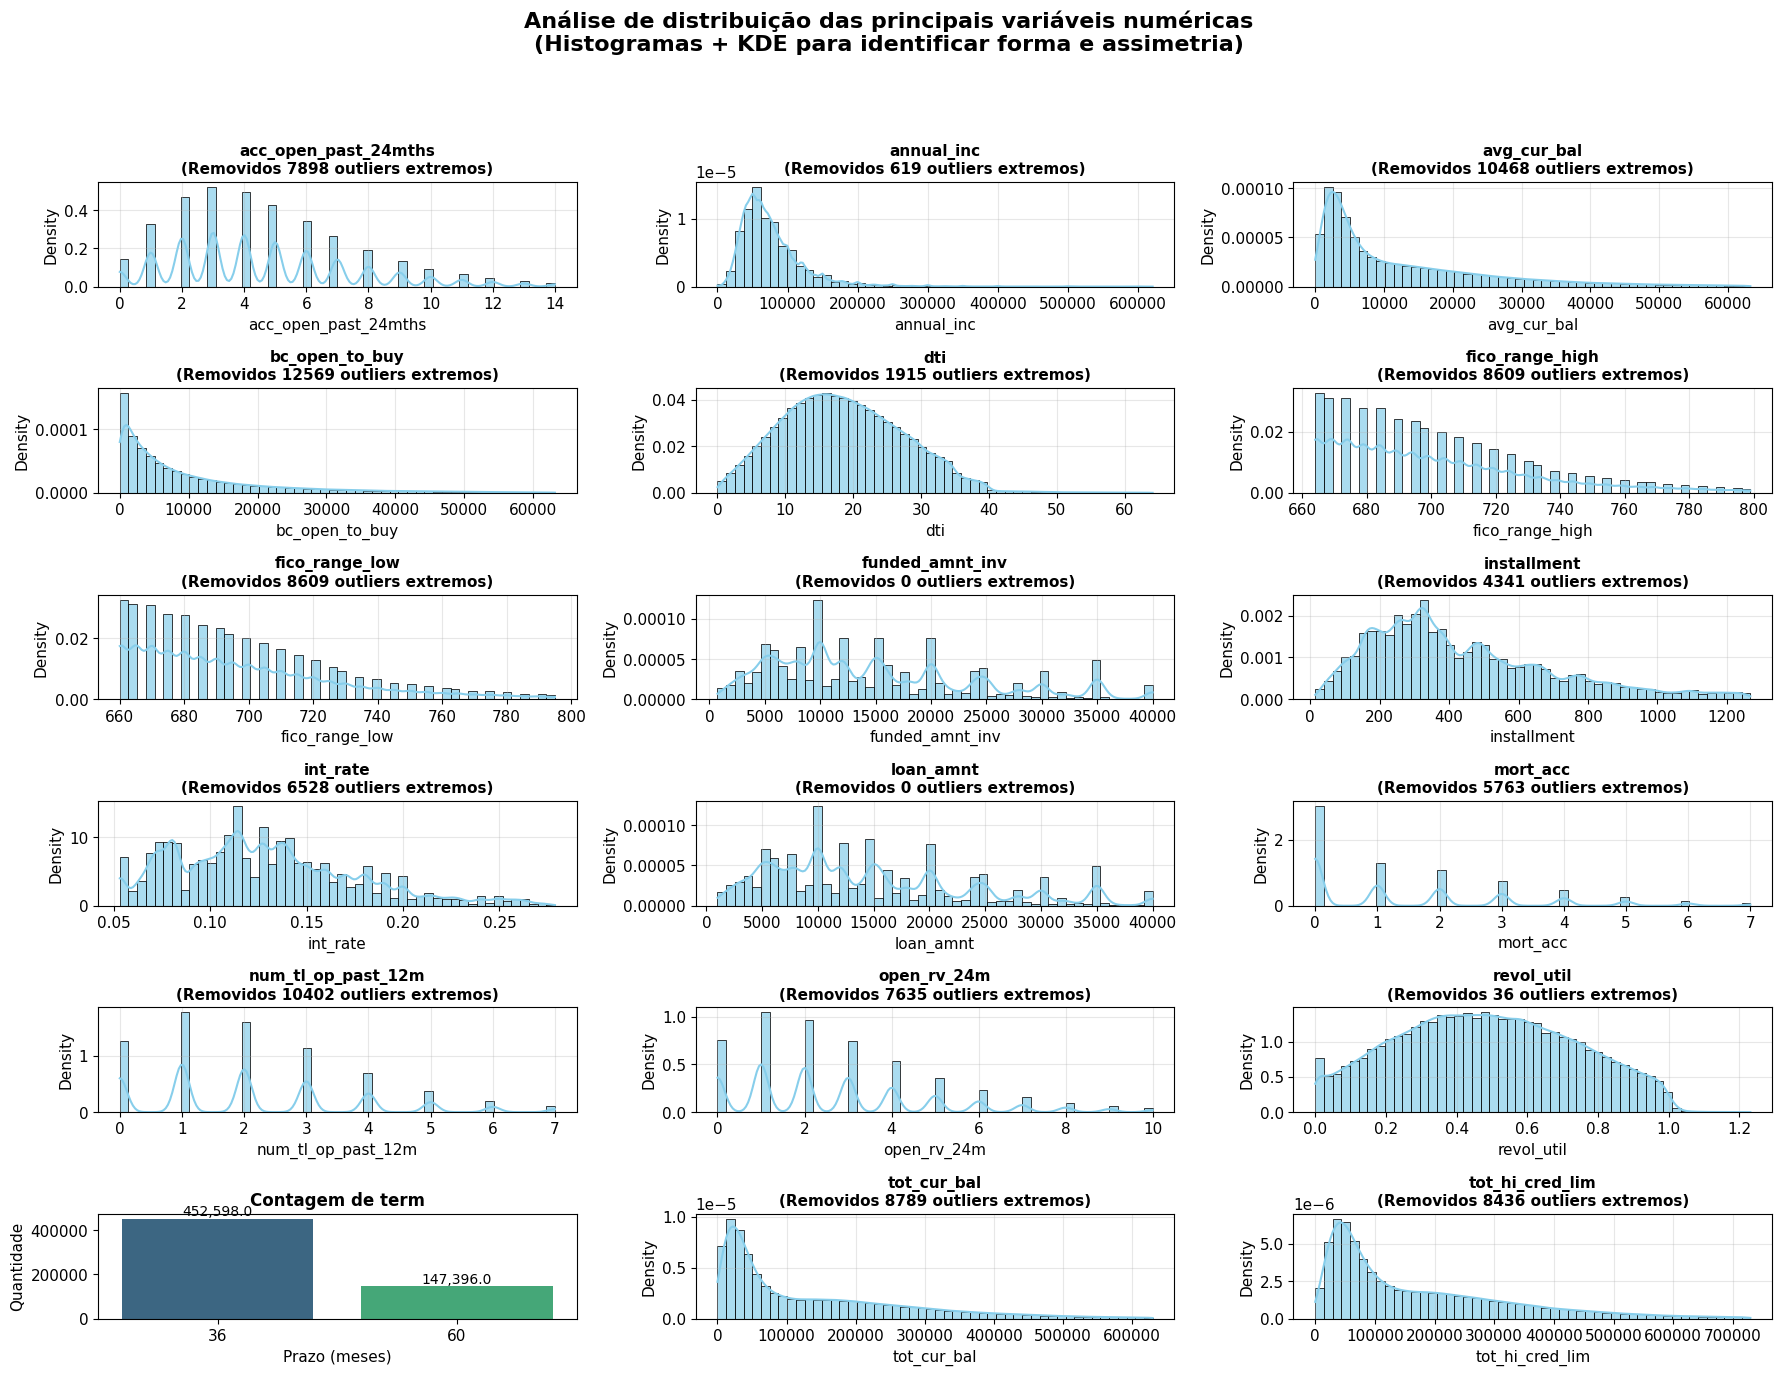

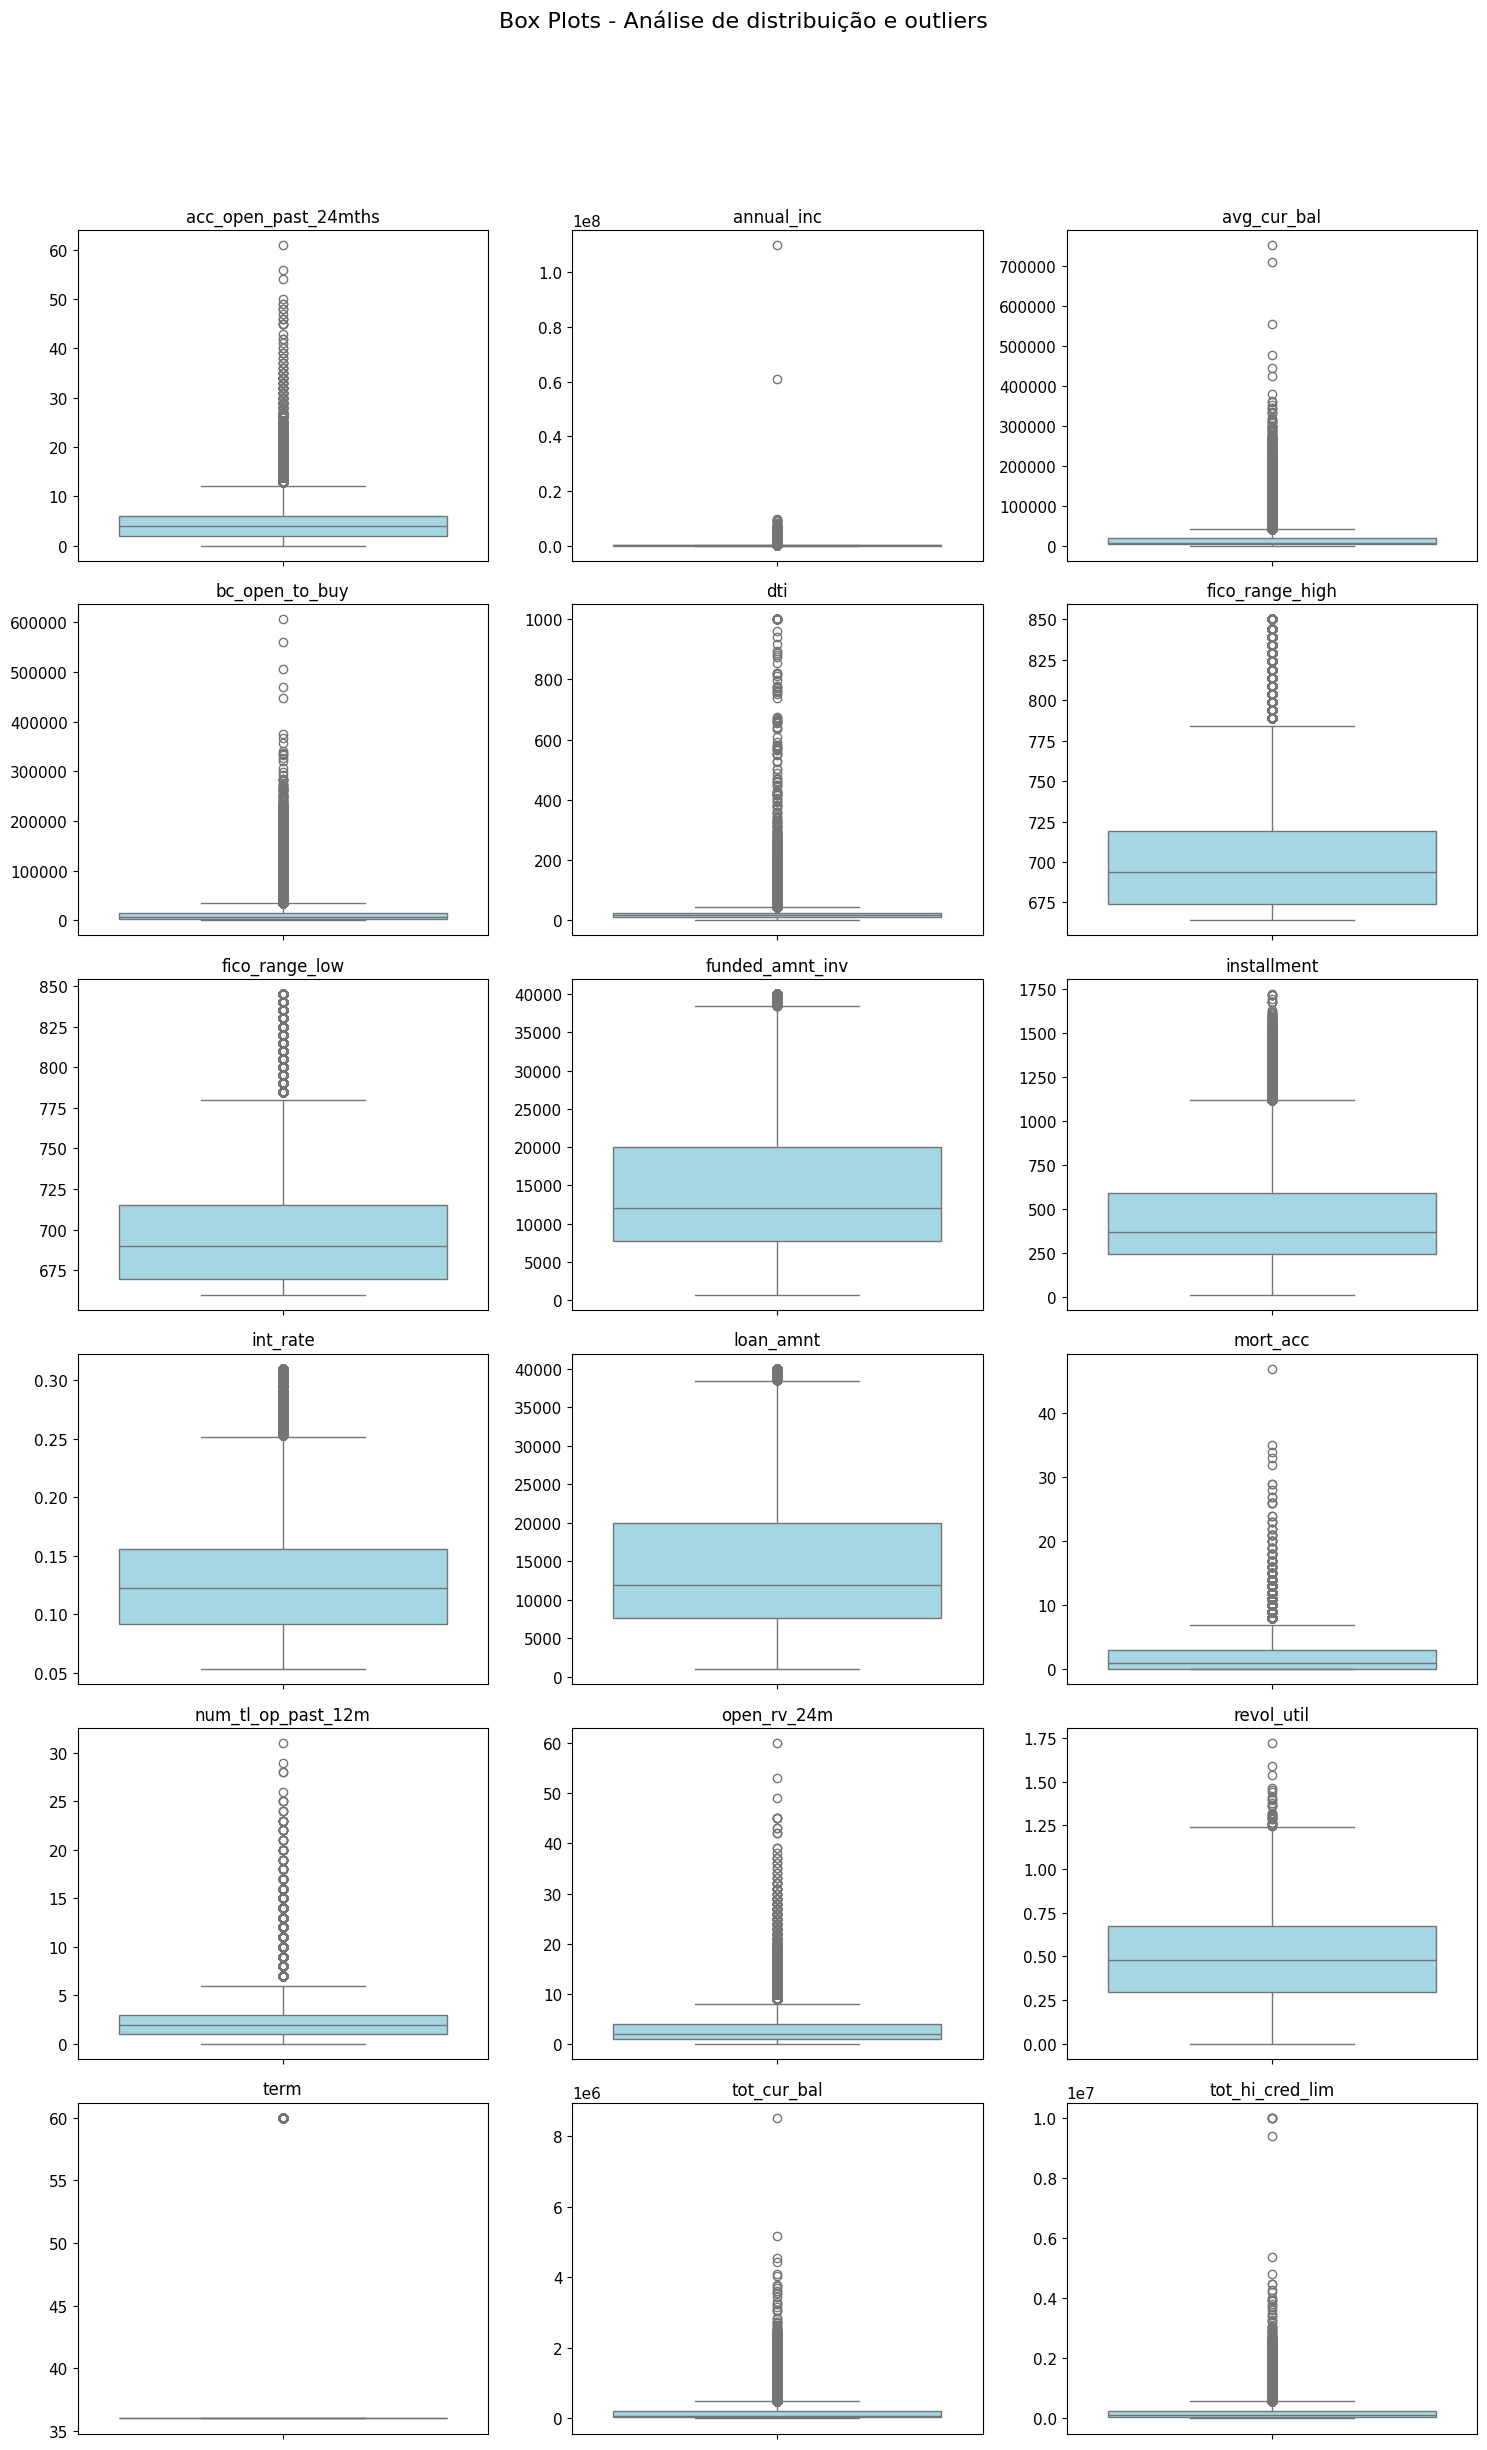

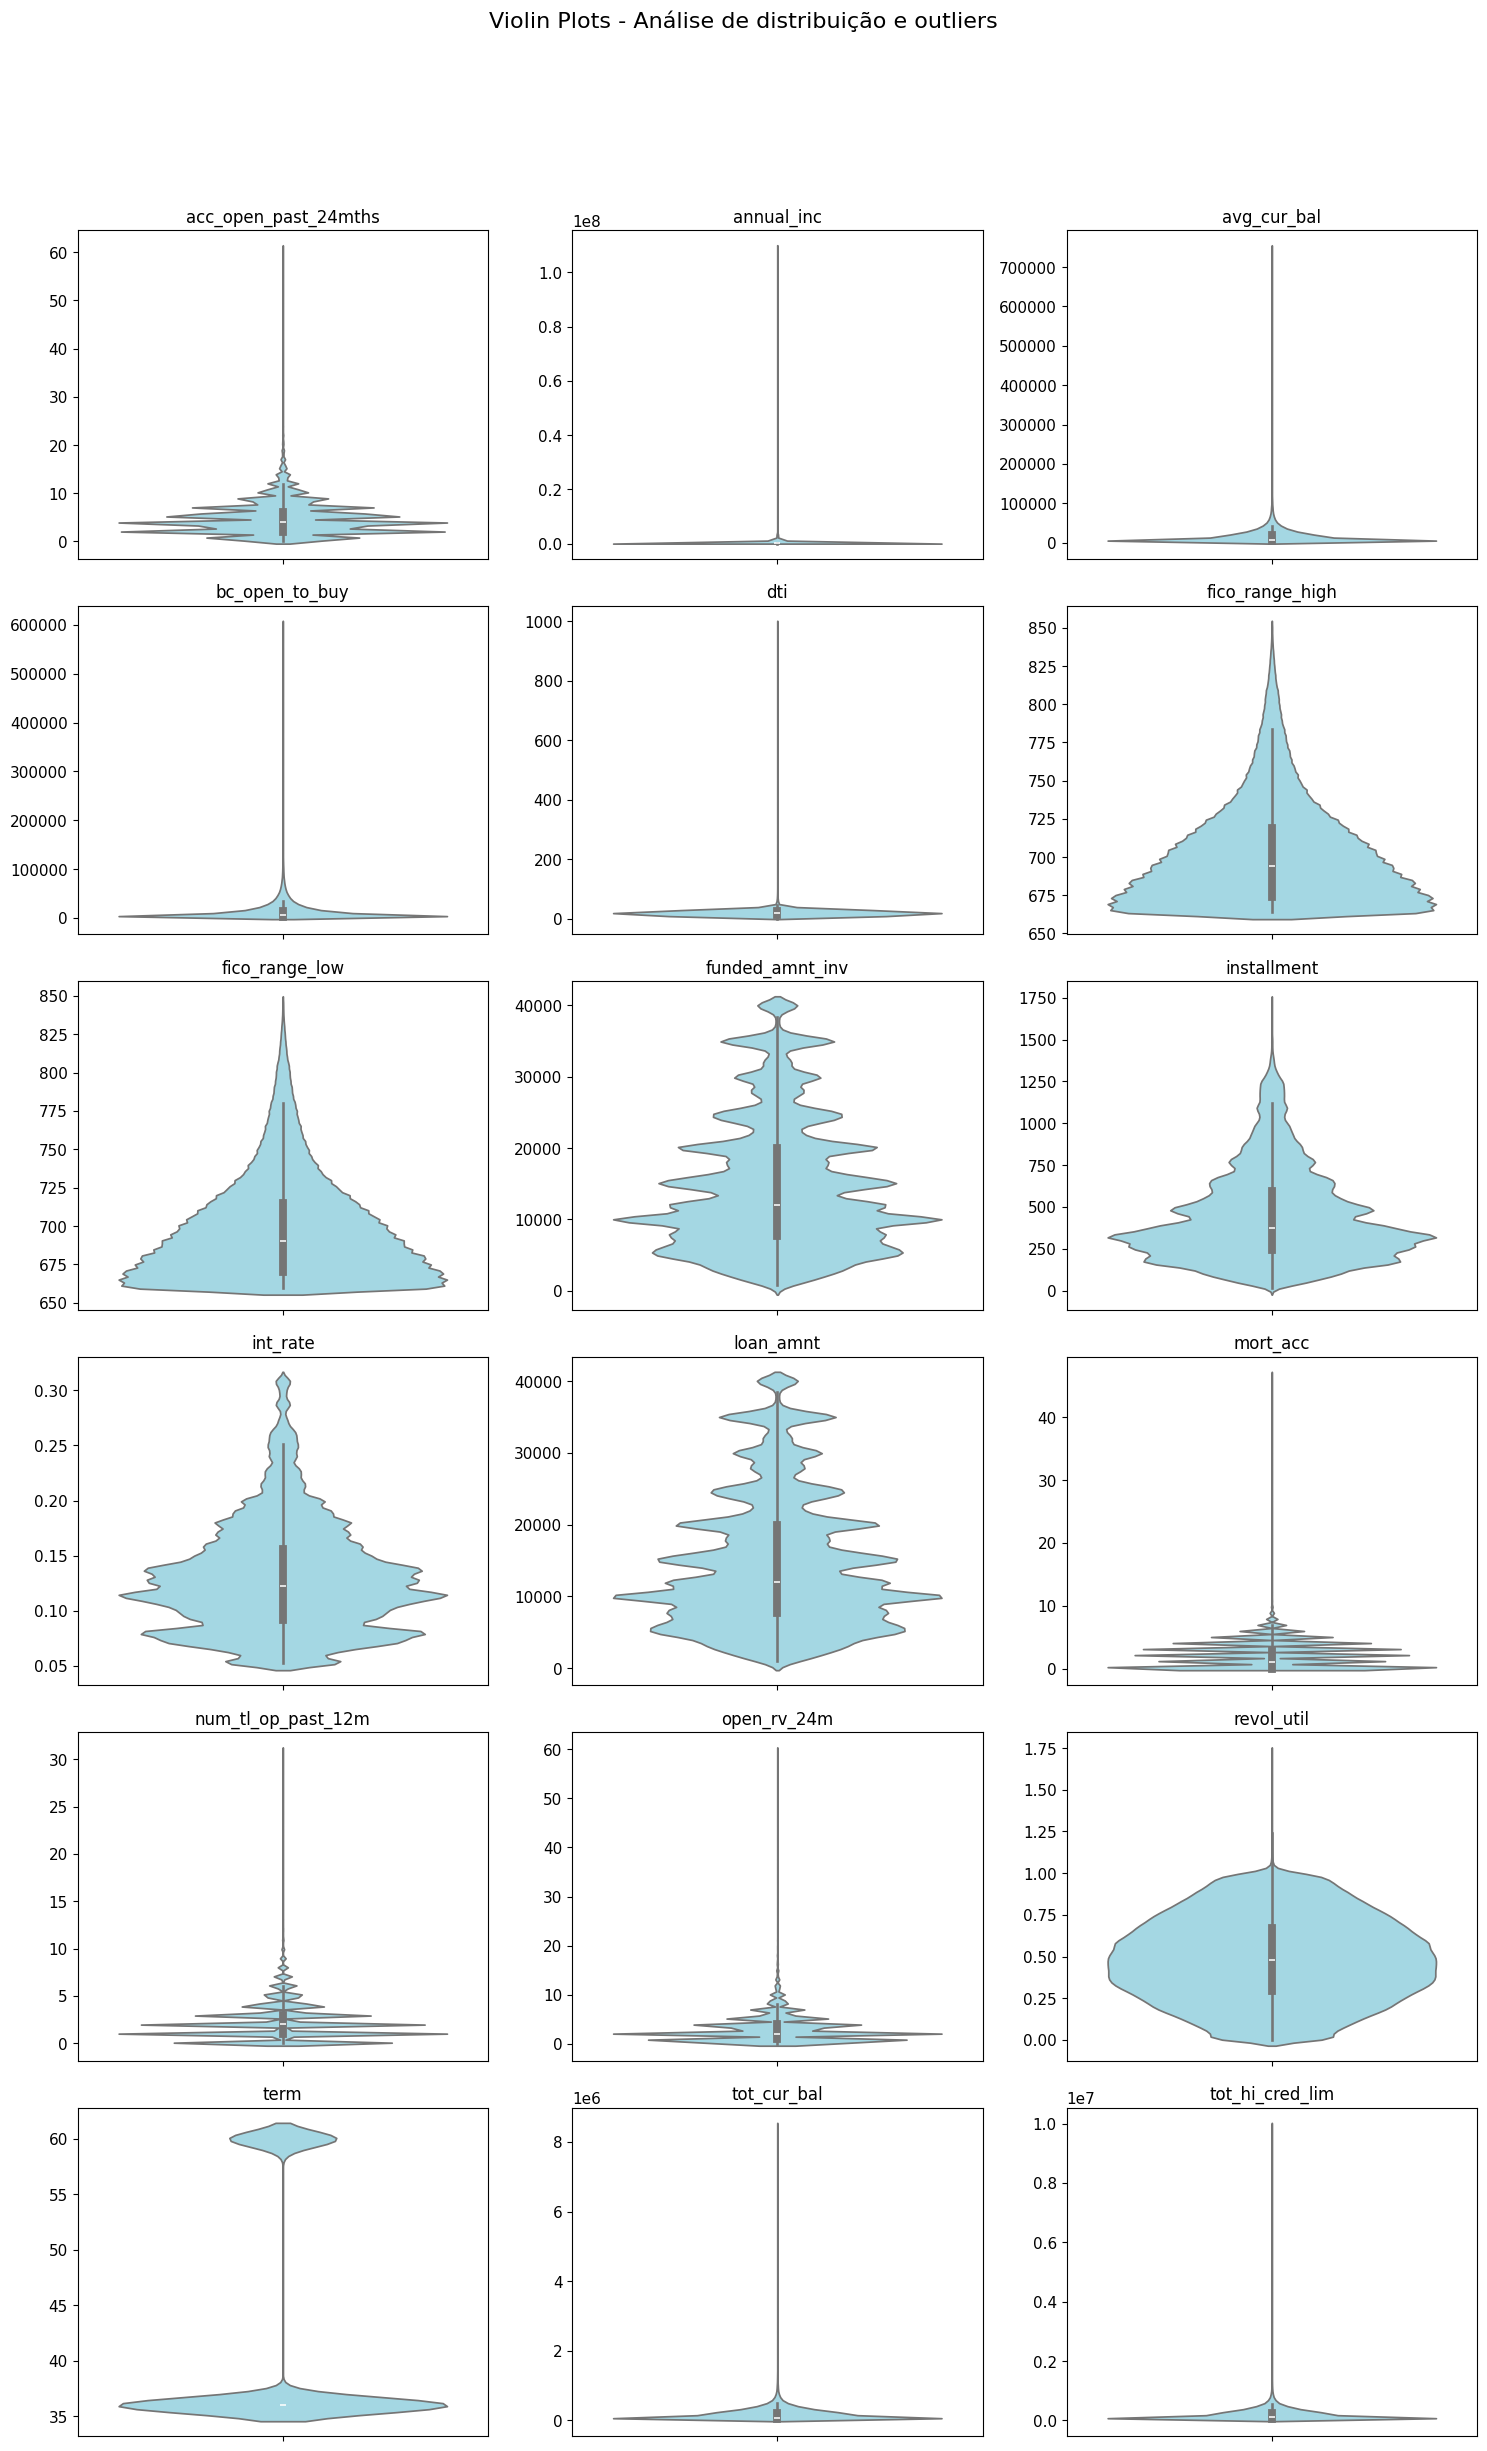

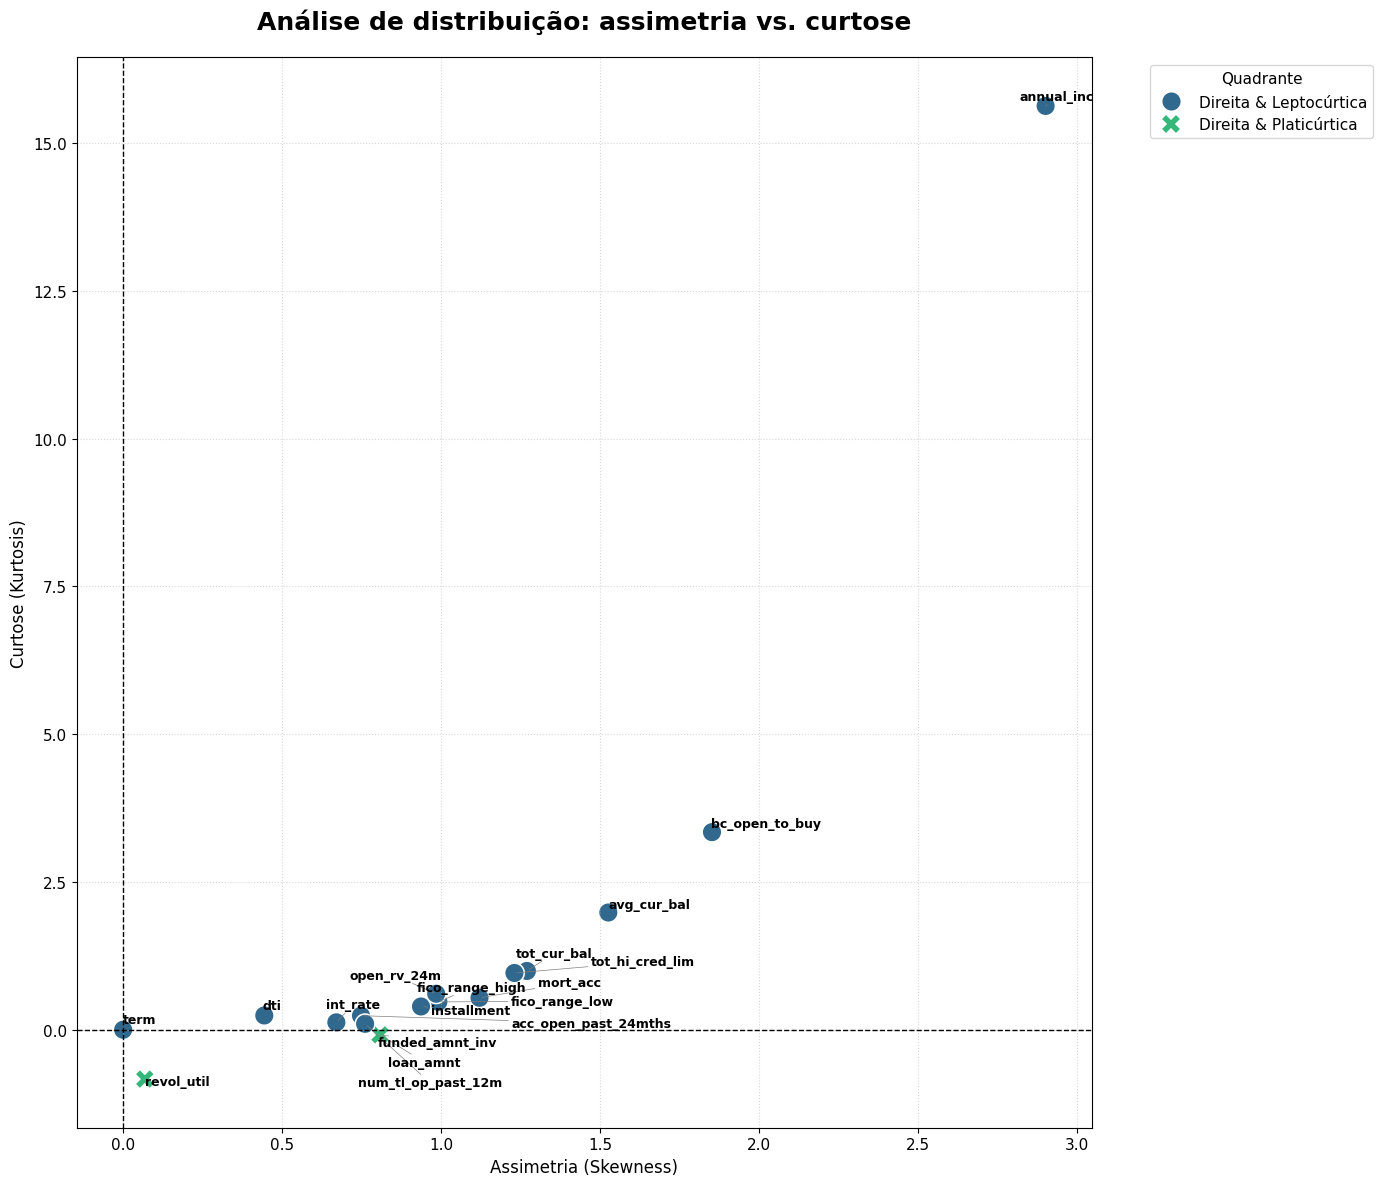

In [9]:
# ==============================================================================
# 4. RESUMO ESTATÍSTICO - VARIÁVEIS NUMÉRICAS
# ==============================================================================

print("\n" + "="*60)
print("4. RESUMO ESTATÍSTICO - VARIÁVEIS NUMÉRICAS")
print("="*60)

# Remoção do funded_amnt, pois é sempre igual ao loan_amnt
extended_key_columns = [col for col in extended_key_columns if col != 'funded_amnt']

def plotar_graficos_agrupados(df, colunas, tipo_plot):
    if tipo_plot not in ['box', 'violin']:
        print("Erro: tipo_plot deve ser 'box' ou 'violin'")
        return

    num_plots = len(colunas)
    # Ajusta o número de colunas do subplot para no máximo 3 para não ficar muito pequeno
    ncols = min(num_plots, 3)
    nrows = (num_plots - 1) // ncols + 1

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))

    # Se houver apenas um gráfico, axes não será um array, então o colocamos em uma lista
    if num_plots == 1:
        axes = [axes]
    else:
        # Achata o array de eixos para facilitar a iteração
        axes = axes.flatten()

    titulo_figura = f'{tipo_plot.capitalize()} Plots - Análise de distribuição e outliers'
    fig.suptitle(titulo_figura, fontsize=16, y=1.02)

    plot_func = sns.boxplot if tipo_plot == 'box' else sns.violinplot

    for i, coluna in enumerate(colunas):
        ax = axes[i]
        plot_func(y=df[coluna], ax=ax, color='#99ddee')
        ax.set_title(coluna, fontsize=12)
        ax.set_ylabel('')
        ax.set_xlabel('')

    # Oculta eixos não utilizados se o número de plots não preencher a grade
    for i in range(num_plots, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Converte colunas de texto para numéricas para incluí-las na análise
if df['term'].dtype == 'object':
    df['term'] = df['term'].str.extract('(\d+)').astype(int)
# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remover a variável target das estatísticas descritivas
if 'target_default' in numeric_cols:
    numeric_cols.remove('target_default')

# Estatísticas básicas
stats_df = df[numeric_cols].describe()

# Adicionar estatísticas extras
extra_stats = pd.DataFrame({
    'missing_count': df[numeric_cols].isnull().sum(),
    'missing_pct': (df[numeric_cols].isnull().sum() / len(df) * 100).round(2),
    'zeros': (df[numeric_cols] == 0).sum(),
    'unique_values': df[numeric_cols].nunique(),
    'skewness': df[numeric_cols].skew().round(3),
    'kurtosis': df[numeric_cols].kurtosis().round(3)
})

# Combinar estatísticas
combined_stats = pd.concat([stats_df, extra_stats.T])

# Principais variáveis para análise detalhada
# Removemos 'funded_amnt' pois é sempre igual a 'loan_amnt' (verificado na análise de inconsistências)
# Selecionar para a análise todas as variáveis de 'extended_key_columns' que são numéricas
key_numeric_vars = [
    col for col in extended_key_columns
    if col in numeric_cols and col != 'target_default'
]

existing_key_numeric = [col for col in key_numeric_vars if col in numeric_cols]

print("\nPrincipais variáveis numéricas:")
print(combined_stats[existing_key_numeric].round(2).to_string())

n_vars = len(existing_key_numeric)
n_cols = 3  # Define 3 colunas para um layout agradável
n_rows = (n_vars + n_cols - 1) // n_cols  # Calcula as linhas necessárias


# Gráficos de histogramas + KDE para análise de distribuição
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 14))
axes = axes.flatten()

print("ANÁLISE DE DISTRIBUIÇÃO - Histogramas + KDE")
print("=" * 60)

distribution_insights = []

for i, var in enumerate(existing_key_numeric):
    ax = axes[i]
    if var == 'term':
        sns.countplot(x=df[var], ax=ax, palette='viridis')
        ax.set_title(f'Contagem de {var}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Prazo (meses)')
        ax.set_ylabel('Quantidade')
        for p in ax.patches:
            ax.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black',
                        xytext=(0, 5), textcoords='offset points')
        print("- Variável discreta. Análise de skew/kurtosis não aplicável.")

    else:
        data_original = df[var].dropna()
        data_clean = data_original[np.abs(stats.zscore(data_original)) < 3]

        if len(data_clean) > 1: # Precisa de pelo menos 2 pontos para calcular IQR
            # Cálculo dinâmico de bins (Regra de Freedman-Diaconis)
            q25, q75 = np.percentile(data_clean, [25, 75])
            iqr = q75 - q25
            bin_width = 2 * iqr * (len(data_clean) ** (-1/3))

            # Evitar divisão por zero se a largura do bin for 0
            if bin_width > 0:
                bins = int(np.ceil((data_clean.max() - data_clean.min()) / bin_width))
                # Limitar a um máximo razoável para não sobrecarregar
                bins = min(bins, 50)
            else:
                # Fallback para dados com variância muito baixa
                bins = 20

            # Histograma + KDE com bins dinâmicos
            sns.histplot(data_clean, kde=True, ax=axes[i], alpha=0.7, color='skyblue', stat='density', bins=bins)
            ax.set_title(f'{var}\n(Removidos {len(data_original) - len(data_clean)} outliers extremos)',
                            fontsize=11, fontweight='bold')
            ax.grid(True, alpha=0.3)

            
# Oculta eixos não utilizados
for j in range(n_vars, len(axes)):
    axes[j].set_visible(False)
# Ajustar layout e título
plt.suptitle('Análise de distribuição das principais variáveis numéricas\n(Histogramas + KDE para identificar forma e assimetria)',
            fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

# Chamar a função para gerar os Box Plots
plotar_graficos_agrupados(df, existing_key_numeric, 'box')
plotar_graficos_agrupados(df, existing_key_numeric, 'violin')

# ==============================================================================
# ANÁLISE DE ASSIMETRIA E CURTOSE
# ==============================================================================

# Loop para analisar cada variável
for col in existing_key_numeric:
    data = df[col].dropna()
    
    if data.empty:
        # print(f"A variável {col} não possui dados.")
        continue

    # print(f"Análise de {col}:")
    
    # Verifica se a variável é discreta (poucos valores únicos)
    is_discrete = data.nunique() < 15

    if is_discrete:
        # print("- Variável discreta. Análise de skew/kurtosis não aplicável.")
        distribution_insights.append({
            'variavel': col,
            'assimetria': 0,  # Valor neutro para não poluir o gráfico
            'curtose': 0,
            'tipo': 'Discreta'
        })
    else:
        # Remove outliers para uma análise de forma mais robusta
        data_clean = data[np.abs(stats.zscore(data)) < 3]
        if data_clean.empty:
            # print("- Amostra insuficiente para análise após remoção de outliers.")
            continue
            
        skewness = stats.skew(data_clean)
        kurtosis_val = stats.kurtosis(data_clean)

        distribution_insights.append({
            'variavel': col,
            'assimetria': skewness,
            'curtose': kurtosis_val,
            'tipo': 'Contínua'
        })

# ==============================================================================
# GRÁFICO DE QUADRANTES: ASSIMETRIA VS. CURTOSE 
# ==============================================================================
from adjustText import adjust_text

df_insights = pd.DataFrame(distribution_insights)

# Função para definir o quadrante de cada variável
def assign_quadrant(row):
    if row['assimetria'] >= 0 and row['curtose'] >= 0:
        return 'Direita & Leptocúrtica'
    elif row['assimetria'] < 0 and row['curtose'] >= 0:
        return 'Esquerda & Leptocúrtica'
    elif row['assimetria'] < 0 and row['curtose'] < 0:
        return 'Esquerda & Platicúrtica'
    else:
        return 'Direita & Platicúrtica'

# Aplica a função para criar uma coluna de quadrante
df_insights['quadrante'] = df_insights.apply(assign_quadrant, axis=1)

if not df_insights.empty:
    fig, ax = plt.subplots(figsize=(14, 12))

    # Plotar os pontos, colorindo por quadrante
    sns.scatterplot(
        data=df_insights, 
        x='assimetria', 
        y='curtose', 
        s=200, 
        ax=ax, 
        hue='quadrante',
        palette='viridis', # Paleta de cores vibrante
        style='quadrante', # Estilos de marcador diferentes por quadrante
        legend='full'
    )

    # Usar adjust_text para evitar sobreposição de rótulos
    texts = []
    for _, row in df_insights.iterrows():
        texts.append(ax.text(row['assimetria'], row['curtose'], row['variavel'], fontsize=9, fontweight='bold'))
    
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

    # Linhas de referência
    ax.axhline(0, color='black', linestyle='--', lw=1)
    ax.axvline(0, color='black', linestyle='--', lw=1)

    # Títulos e labels
    ax.set_title('Análise de distribuição: assimetria vs. curtose', fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Assimetria (Skewness)', fontsize=12)
    ax.set_ylabel('Curtose (Kurtosis)', fontsize=12)
    ax.grid(True, linestyle=':', alpha=0.5)
    
    # Posicionar a legenda fora do gráfico
    ax.legend(title='Quadrante', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout() 
    plt.show()


### Resumo estatístico - variáveis categóricas

As variáveis categóricas entre as variáveis chave revelam estruturas distintas de cardinalidade. A moda de `application_type` é “Individual”, concentrando 94,8 % dos registros; em `purpose`, `debt_consolidation` responde por 56,6 % das solicitações, seguida à distância pelo refinanciamento de cartões de crédito. Já em `addr_state`, a dispersão regional é ampla, mas a Califórnia se destaca com 13,8 % dos casos.

Esses números mostram um mutuário com perfil de risco moderado: quase 60 % dos empréstimos enquadram-se nos grades B e C, e apenas pequenas fatias aparecem nos extremos do espectro. A composição patrimonial também sugere uma clientela em fase de consolidação: 48,9 % vivem sob hipoteca e 39,3 % em aluguel, ao passo que proprietários sem dívidas são minoria. A experiência profissional também demonstra que boa parte dos devedores possuem ampla experiência profissional — mais de um terço declara “10+ years” de emprego.

Completando o quadro, o status de verificação de renda distribui-se de forma equilibrada entre “Source Verified” (41 %), “Verified” (26 %) e “Not Verified” (32 %), sinalizando diferentes camadas de rigor na avaliação de crédito. 





5. RESUMO ESTATÍSTICO - VARIÁVEIS CATEGÓRICAS

5.1 SELEÇÃO DE VARIÁVEIS CATEGÓRICAS
----------------------------------------
Variáveis categóricas identificadas: 8
Lista: ['addr_state', 'application_type', 'emp_length', 'grade', 'home_ownership', 'purpose', 'sub_grade', 'verification_status']

5.2 TABELA DE RESUMO ESTATÍSTICO
----------------------------------------
           Variável  Nº Únicos Ausentes (%)               Moda  Freq. Moda Conc. Moda (%)
         addr_state         50         0.0%                 CA       82855          13.8%
   application_type          2         0.0%         Individual      568997          94.8%
         emp_length         11         6.9%          10+ years      198346          35.5%
              grade          7         0.0%                  B      175594          29.3%
     home_ownership          5         0.0%           MORTGAGE      293351          48.9%
            purpose         13         0.0% debt_consolidation      339488          56.6%


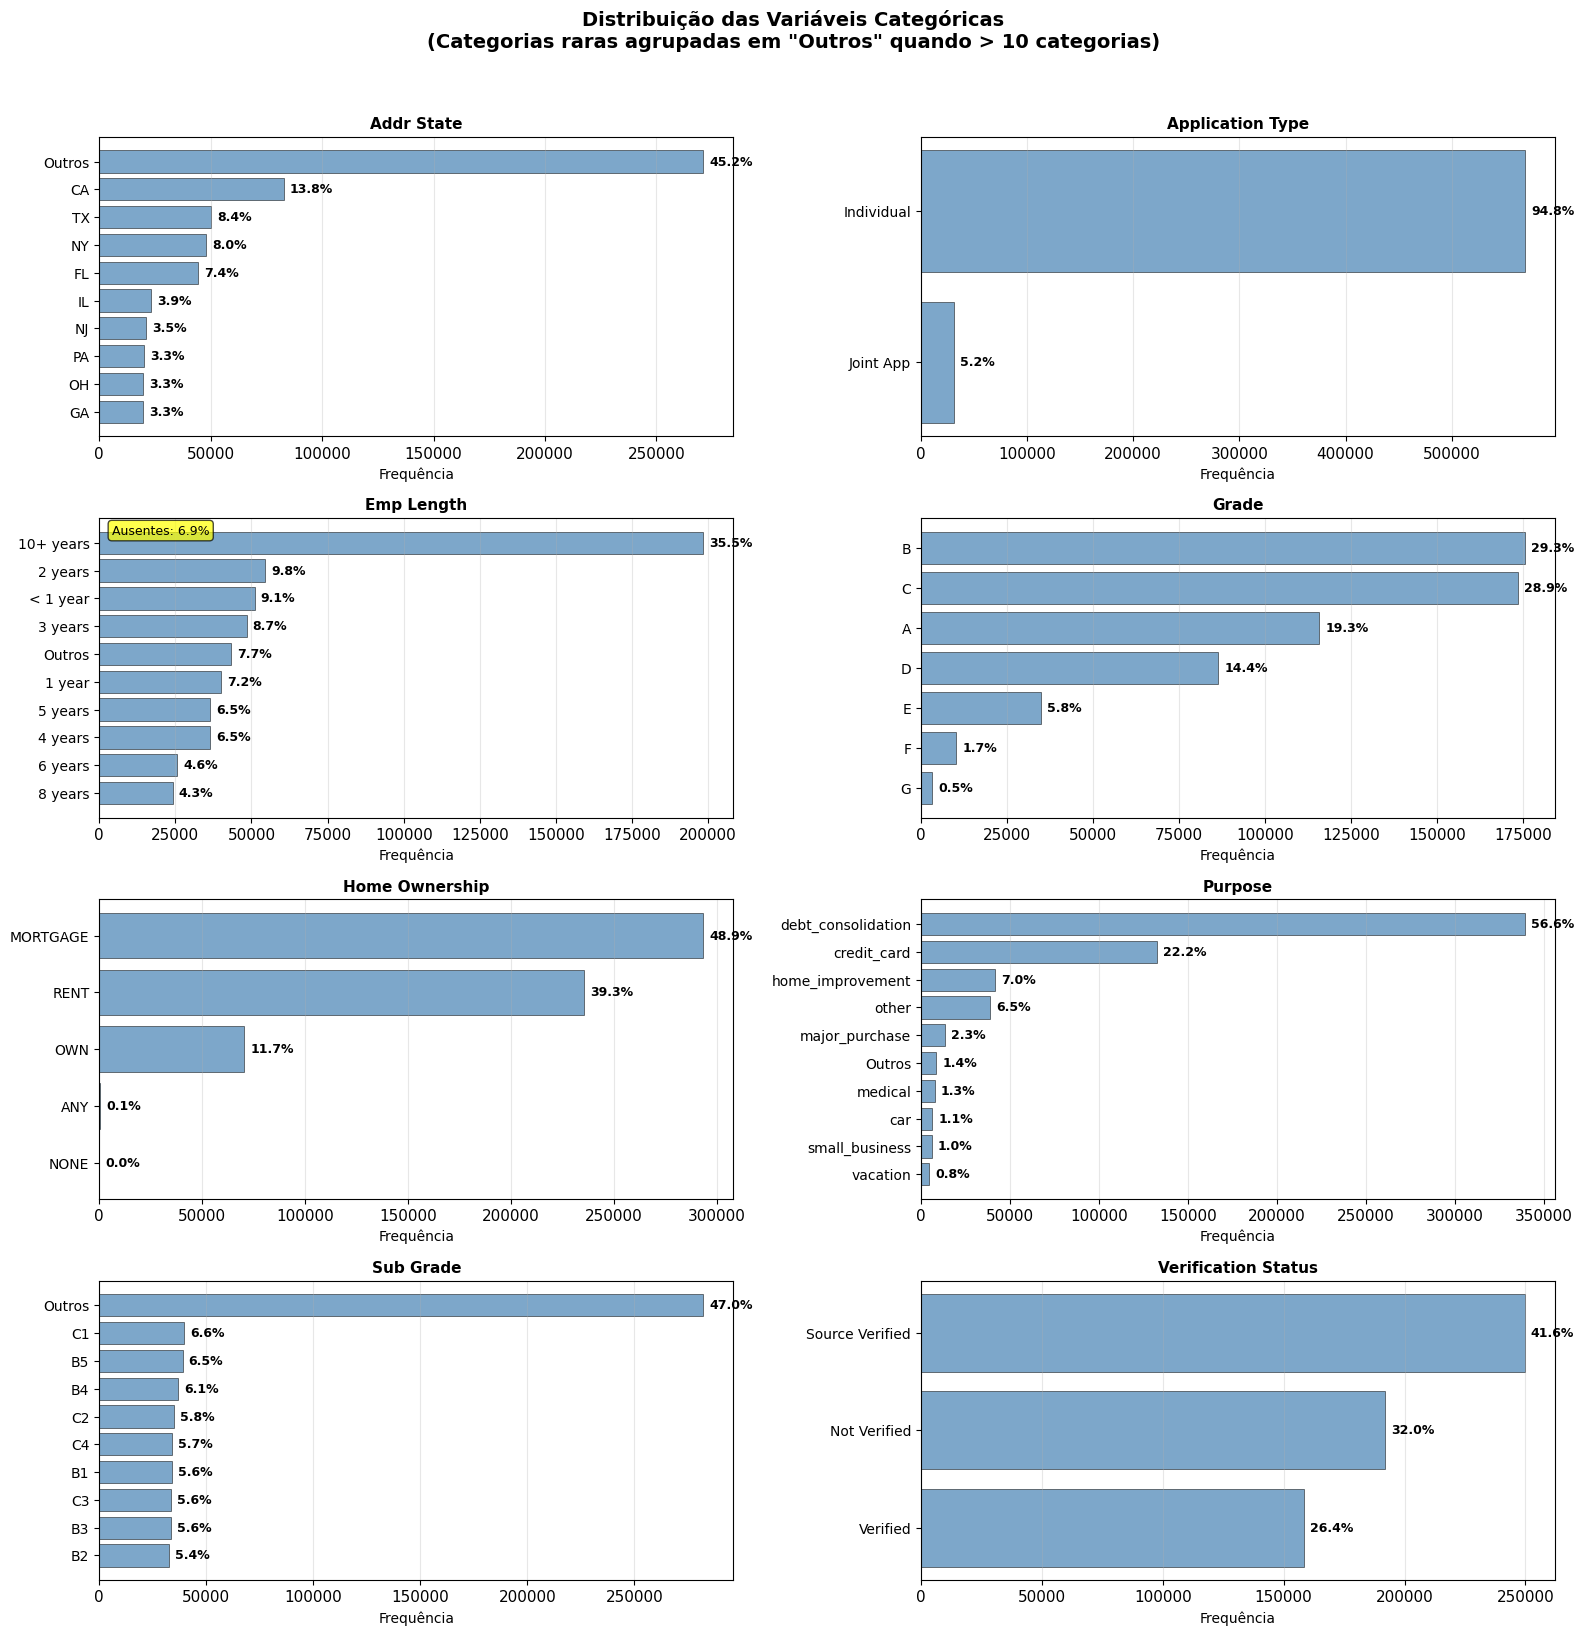

In [10]:
# ==============================================================================
# 5. RESUMO ESTATÍSTICO - VARIÁVEIS CATEGÓRICAS
# ==============================================================================

print("\n" + "="*60)
print("5. RESUMO ESTATÍSTICO - VARIÁVEIS CATEGÓRICAS")
print("="*60)

# a. Seleção dinâmica de variáveis categóricas
print("\n5.1 SELEÇÃO DE VARIÁVEIS CATEGÓRICAS")
print("-" * 40)

# Começar com as variáveis da extended_key_columns
categorical_vars = []

# Incluir variáveis de tipo object
for col in extended_key_columns:
    if col in df.columns:
        if df[col].dtype == 'object':
            categorical_vars.append(col)
        # Incluir variáveis numéricas com baixa cardinalidade (tratadas como categóricas)
        elif df[col].dtype in ['int64', 'float64'] and df[col].nunique() < 15:
            categorical_vars.append(col)

# Excluir colunas não adequadas para análise de frequência
cols_to_exclude = ['issue_d', 'earliest_cr_line', 'zip_code', 'term', 'target_default']
categorical_vars = [col for col in categorical_vars if col not in cols_to_exclude]

print(f"Variáveis categóricas identificadas: {len(categorical_vars)}")
print(f"Lista: {categorical_vars}")

# b. Geração de tabela de resumo
print("\n5.2 TABELA DE RESUMO ESTATÍSTICO")
print("-" * 40)

summary_data = []
for var in categorical_vars:
    if var in df.columns:
        # Estatísticas básicas
        total_count = len(df[var])
        unique_count = df[var].nunique()
        missing_count = df[var].isnull().sum()
        missing_pct = (missing_count / total_count) * 100

        # Moda e sua frequência
        if not df[var].dropna().empty:
            mode_value = df[var].mode().iloc[0] if len(df[var].mode()) > 0 else 'N/A'
            mode_freq = df[var].value_counts().iloc[0] if len(df[var].value_counts()) > 0 else 0
            mode_concentration = (mode_freq / (total_count - missing_count)) * 100 if (total_count - missing_count) > 0 else 0
        else:
            mode_value = 'N/A'
            mode_freq = 0
            mode_concentration = 0

        summary_data.append({
            'Variável': var,
            'Nº Únicos': unique_count,
            'Ausentes (%)': f"{missing_pct:.1f}%",
            'Moda': str(mode_value),
            'Freq. Moda': mode_freq,
            'Conc. Moda (%)': f"{mode_concentration:.1f}%"
        })

# Criar DataFrame de resumo
summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# c. Geração de gráficos de distribuição
print("\n5.3 VISUALIZAÇÕES DE DISTRIBUIÇÃO")
print("-" * 40)

def prepare_categorical_data(series, max_categories=10):
    """Agrupa categorias menos frequentes em 'Outros'"""
    value_counts = series.value_counts()

    if len(value_counts) <= max_categories:
        return series

    # Manter as top (max_categories - 1) categorias
    top_categories = value_counts.head(max_categories - 1).index

    # Criar nova série com agrupamento
    new_series = series.copy()
    new_series[~series.isin(top_categories)] = 'Outros'

    return new_series

def add_percentage_annotations(ax, total_count):
    """Adiciona anotações de percentual nas barras"""
    for container in ax.containers:
        labels = [f'{v/total_count*100:.1f}%' if v > 0 else '' for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='edge', fontsize=9, ha='left')

# Configurar grid de subplots
n_vars = len(categorical_vars)
n_cols = 2
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    ax = axes[i]

    # Preparar dados com agrupamento se necessário
    series_clean = df[var].dropna()
    if len(series_clean) == 0:
        ax.text(0.5, 0.5, f'Sem dados válidos\npara {var}',
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{var}', fontweight='bold')
        continue

    prepared_data = prepare_categorical_data(series_clean, max_categories=10)
    value_counts = prepared_data.value_counts()

    # Criar gráfico de barras horizontais
    bars = ax.barh(range(len(value_counts)), value_counts.values,
                   color='steelblue', alpha=0.7, edgecolor='black', linewidth=0.5)

    # Configurar eixos
    ax.set_yticks(range(len(value_counts)))
    ax.set_yticklabels(value_counts.index, fontsize=10)
    ax.set_xlabel('Frequência', fontsize=10)
    ax.set_title(f'{var.replace("_", " ").title()}', fontweight='bold', fontsize=11)

    # Adicionar anotações de percentual
    total_valid = len(series_clean)
    for j, (bar, count) in enumerate(zip(bars, value_counts.values)):
        percentage = (count / total_valid) * 100
        ax.text(bar.get_width() + max(value_counts.values) * 0.01,
                bar.get_y() + bar.get_height()/2,
                f'{percentage:.1f}%',
                va='center', ha='left', fontsize=9, fontweight='bold')

    # Adicionar informações de dados ausentes se relevante
    missing_count = df[var].isnull().sum()
    if missing_count > 0:
        missing_pct = (missing_count / len(df)) * 100
        ax.text(0.02, 0.98, f'Ausentes: {missing_pct:.1f}%',
                transform=ax.transAxes, fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                verticalalignment='top')

    ax.grid(axis='x', alpha=0.3)
    ax.invert_yaxis()  # Maior frequência no topo

# Ocultar subplots não utilizados
for j in range(n_vars, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribuição das Variáveis Categóricas\n(Categorias raras agrupadas em "Outros" quando > 10 categorias)',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


### Análise de valores extremos (outliers)

Ao se deparar com valores destoantes (outliers), é necessário avaliar se eles são erros de entrada ou se são valores legítimos que devem ser mantidos. Normalmente, no contexto de crédito, os outliers são legítimos, pois refletem a realidade de alguns tomadores que possuem características financeiras atípicas entre si. 

O motivo da análise é que existem duas possibilidades de tratamento:

1. **Manter os outliers**: Se eles são legítimos, é importante preservá-los, pois podem conter informações valiosas sobre o comportamento dos tomadores de crédito.
2. **Remover os outliers**: Se eles são erros de entrada, é necessário removê-los para evitar distorções nas análises e modelos preditivos.

Potencialmente, a alta variância introduzida por outliers, mesmo que legítimos, pode prejudicar a performance de modelos de machine learning, especialmente aqueles sensíveis à escala. Nesse caso, se são outliers legítimos, uma abordagem comum é aplicar transformações como logaritmo ou raiz quadrada para reduzir a influência desses valores extremos.

Foi realizada uma análise nas variáveis numéricas mais relevantes, identificando outliers com base no método do intervalo interquartil (IQR). Valores acima de 1,5 vezes o IQR acima do terceiro quartil foram considerados outliers. Na análise sistemática a seguir, opta-se por por manter os outliers da variáveis quando são poucos (< 5 % dos registros) ou quando sua retirada não altera a correlação com a variável-alvo `target_default` em mais de 0,02 (*). 

A análise sugere que devemos manter os outliers para todas as variáveis analisadas e, em caso de necessidade, optar por transformações que reduzam a variância, como logaritmo ou raiz quadrada.

(*) significa que os outliers seguem o mesmo padrão de risco do restante dos dados. Exemplo: uma pessoa com renda muito alta (outlier) ainda mantém baixo risco de default, coerente com o padrão geral.

In [11]:
# 6. Análise de valores extremos
print("="*60)
print("6. ANÁLISE DE VALORES EXTREMOS")
print("="*60)

# Incluir todas as variáveis numéricas importantes para análise de outliers, menos a fico_range_high e a term
focus_vars = [
    col for col in key_numeric_vars 
    if col not in ['fico_range_high', 'term']  
]
def analyze_outliers(df, variables):
    
    results = []
    
    for var in variables:
        if var not in df.columns:
            continue
            
        data = df[var].dropna()
        if len(data) < 100:  # Dados insuficientes
            continue
            
        # Métodos de detecção
        Q1, Q3 = data.quantile([0.25, 0.75])
        IQR = Q3 - Q1
        
        # Outliers pelo método IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = data[(data < lower_bound) | (data > upper_bound)]
        
        # Outliers pelo método Z-score (>3)
        z_scores = np.abs((data - data.mean()) / data.std())
        outliers_zscore = data[z_scores > 3]
        
        # Correlação com target (com e sem outliers)
        full_corr = data.corr(df.loc[data.index, 'target_default'])
        
        # Correlação sem outliers IQR
        clean_indices = data[(data >= lower_bound) & (data <= upper_bound)].index
        if len(clean_indices) > 10:
            clean_corr = data.loc[clean_indices].corr(df.loc[clean_indices, 'target_default'])
        else:
            clean_corr = full_corr
            
        results.append({
            'variavel': var,
            'outliers_iqr_pct': len(outliers_iqr) / len(data) * 100,
            'outliers_zscore_pct': len(outliers_zscore) / len(data) * 100,
            'corr_completa': full_corr,
            'corr_sem_outliers': clean_corr,
            'perda_correlacao': abs(full_corr - clean_corr),
            'recomendacao': 'MANTER' if (
                len(outliers_iqr) / len(data) < 0.05 or  # Poucos outliers
                abs(full_corr - clean_corr) < 0.02       # Pouco impacto na correlação
            ) else 'TRANSFORMAR'
        })
    
    return pd.DataFrame(results)

outlier_analysis = analyze_outliers(df, focus_vars)

# Exibir resultados
print(f"{'Variável':<15} {'Out.IQR%':<8} {'Out.Z%':<8} {'Corr.Full':<10} {'Corr.Clean':<10} {'Δ Corr':<8} {'Ação':<12}")
print("-" * 80)

for _, row in outlier_analysis.iterrows():
    print(f"{row['variavel']:<15} {row['outliers_iqr_pct']:<8.1f} {row['outliers_zscore_pct']:<8.1f} "
          f"{row['corr_completa']:<10.3f} {row['corr_sem_outliers']:<10.3f} {row['perda_correlacao']:<8.3f} "
          f"{row['recomendacao']:<12}")


# Mostrar que outliers seguem padrões econômicos esperados
def analyze_financial_patterns():
    """Analisa se outliers seguem lógica financeira"""
    
    # Outliers de renda vs. comportamento de crédito
    high_income = df[df['annual_inc'] > df['annual_inc'].quantile(0.95)]
    low_income = df[df['annual_inc'] < df['annual_inc'].quantile(0.50)]
    
    print("\nPADRÕES FINANCEIROS DOS OUTLIERS DE RENDA:")
    print(f"{'Métrica':<20} {'Renda Alta':<15} {'Renda Média-Baixa':<15}")
    print("-" * 50)
    print(f"{'Taxa Default':<20} {high_income['target_default'].mean():<15.1%} {low_income['target_default'].mean():<15.1%}")
    print(f"{'FICO Médio':<20} {high_income['fico_range_low'].mean():<15.0f} {low_income['fico_range_low'].mean():<15.0f}")
    print(f"{'DTI Médio':<20} {high_income['dti'].mean():<15.1f} {low_income['dti'].mean():<15.1f}")
    
    print("\nOutliers de renda alta = Menor risco (padrão esperado)")
   
analyze_financial_patterns()

6. ANÁLISE DE VALORES EXTREMOS
Variável        Out.IQR% Out.Z%   Corr.Full  Corr.Clean Δ Corr   Ação        
--------------------------------------------------------------------------------
acc_open_past_24mths 2.7      1.3      0.087      0.082      0.005    MANTER      
annual_inc      4.7      0.1      -0.013     -0.051     0.038    MANTER      
avg_cur_bal     5.5      1.7      -0.075     -0.073     0.003    MANTER      
bc_open_to_buy  8.1      2.1      -0.076     -0.063     0.012    MANTER      
dti             0.9      0.3      0.058      0.085      0.027    MANTER      
fico_range_low  2.8      1.4      -0.120     -0.110     0.010    MANTER      
funded_amnt_inv 1.4      0.0      0.082      0.083      0.001    MANTER      
installment     3.0      0.7      0.071      0.074      0.003    MANTER      
int_rate        2.6      1.1      0.271      0.258      0.013    MANTER      
loan_amnt       1.4      0.0      0.082      0.083      0.001    MANTER      
mort_acc        1.0      

### Análise comparativa das variáveis numéricas por status de pagamento

Foram analisadas as variáveis numéricas mais relevantes, comparando as distribuições entre os grupos de empréstimos **adimplentes** (0) e **inadimplentes** (1). As métricas utilizadas foram a mediana e effect size (correlação rank-biserial) para mensurar a magnitude da diferença entre os grupos.
Os dois grupos diferem **significativamente em todas as 17 variáveis avaliadas** (teste de **Mann-Whitney U**, *p* < 0,001). Todas as relações parecem coerentes com a expectativa de que empréstimos inadimplentes apresentam características mais arriscadas, como maiores valores de empréstimo, taxas de juros mais altas e maior comprometimento de renda.

Definição do effect size (magnitude da diferença entre grupos):

$$
r \;=\; 1-\frac{2U}{n_1\,n_2}
$$

|r| < 0,10 = pequeno | 0,10 ≤ |r| < 0,30 = médio | |r| ≥ 0,30 = grande
r > 0 (aumenta inadimplentes) ↑ | r < 0 (diminui inadimplentes)

---

Variáveis com **grande** magnitude

| Variável                       | Δ Mediana   | *r*       | Interpretação                                                                                                          |
| ------------------------------ | ----------- | --------- | ---------------------------------------------------------------------------------------------------------------- |
| **Taxa de juros (`int_rate`)** | **+27,5 %** | **+0,38** | Empréstimos inadimplentes pagam taxas bem maiores ⇒ preço de risco funciona e exibe maior poder discriminatório. |

---

Variáveis com **magnitude pequena ou média** (|r| 0,10 – 0,30)

| Variável                                                                      | Δ Mediana     | *r*           | Interpretação                                                                                                                                                          |
| ----------------------------------------------------------------------------- | ------------- | ------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Valor do empréstimo (`loan_amnt`)                                             | +25,0 %       | +0,13         | Empréstimos maiores tendem a inadimplir com mais frequência.                                                                                                           |
| Valor efetivamente financiado (`funded_amnt_inv`)                             | +25,0 %       | +0,12         | Alinha-se ao risco intrínseco do ticket.                                                                                                                               |
| Relação dívida / renda (`dti`)                                                | +12,6 %       | +0,12         | Maior comprometimento de renda reduz folga de pagamento.                                                                                                               |
| Aberturas de crédito rotativo 24 m (`open_rv_24m`)                            | +50,0 %       | +0,11         | Histórico de novas contas rotativas sugere maior apetite a crédito (e risco).                                                                                          |
| Contas abertas 24 m (`acc_open_past_24mths`)                                  | +25,0 %       | +0,12         | Expansão recente de crédito correlaciona-se a inadimplência.                                                                                                           |
| Limite disponível no cartão (`bc_open_to_buy`)                                | –25,8 %       | –0,11         | Menor folga de limite em inadimplentes.                                                                                                                                |
| Scores FICO (`fico_range_low` / `high`)                                       | –0,7 %        | –0,16         | Diferença absoluta pequena, mas perfil completo diverge: mais inadimplentes nos percentis baixos. (*) |
| Prestação mensal (`installment`)                                              | +13,6 %       | +0,11         | Encargos mais altos elevam pressão de caixa.                                                                                                                           |
| Outros saldos e limites (`avg_cur_bal`, `tot_cur_bal`, `tot_hi_cred_lim`)     | –28 % a –31 % | –0,10 ↔ –0,12 | Inadimplentes mantêm saldos/límites médios menores – possível redução de capacidade de crédito.                                                                        |
| Conta hipotecária (`mort_acc`) e número de linhas 12 m (`num_tl_op_past_12m`) | Δ 0 %         |               | Avaliar tratar como categóricas, se notado que pode prejudicar o modelo utilizado                                                                                                           |
| Utilização do crédito rotativo (`revol_util`)                                 | +8,1 %        | +0,07         | Pequena porém consistente.                                                                                                                                             |
| Renda anual (`annual_inc`)                                                    | –7,5 %        | –0,08         | Menor poder explicativo isolado; influencia indiretamente via *dti*.                                                                                                   |

(*)  A **mediana** compara apenas o ponto central das distribuições (690 vs 685 = diferença mínima). O **effect size** mede a separação entre **distribuições completas**. Mesmo com medianas próximas, há diferenças sistemáticas nas **caudas**: mais inadimplentes concentrados nos percentis baixos (600-680) e mais pagos nos percentis altos (720+). Com 600k observações, essas diferenças pequenas mas **consistentes** se tornam estatisticamente detectáveis. Além disso, como a Lending Club exigia FICO ≥ 600, a distribuição fica comprimida numa faixa estreita onde pequenas diferenças importam proporcionalmente mais. Dessa maneira, o effect size captura poder discriminatório real que a simples comparação de medianas não revela. Isso é algo que se torna mais evidente quando olhamos para os gráficos de densidade (KDE) das distribuições.

Algumas variáveis inteiras como `open_rv_24m`, `acc_open_past_24mths` e `num_tl_op_past_12m` apresentam concentrações em alguns valores específicos, sugerindo que podem ser mais bem tratadas como categóricas. Porém, alguns modelos de machine learning conseguem lidar com variáveis discretas sem problemas. Então, a depender do modelo, podemos continuar a tratá-las como numéricas, mas é importante estar ciente dessa característica.

##### Referências

* FRITZ, C. O.; MORRIS, P. E.; RICHLER, J. J. *Effect size estimates: current use, calculations, and interpretation.* J. Exp. Psychol.: General, 141(1), 2-18, 2012.
* MANN, H. B.; WHITNEY, D. R. *On a test of whether one of two random variables is stochastically larger than the other.* Ann. Math. Statistics, 18(1), 50-60, 1947.



7. ANÁLISE COMPARATIVA DAS VARIÁVEIS NUMÉRICAS: DISTRIBUIÇÕES POR ADIMPLÊNCIA
Objetivo: Visualizar como a distribuição de cada variável numérica chave
se comporta para os dois grupos: empréstimos pagos vs inadimplentes
Variáveis analisadas: ['acc_open_past_24mths', 'annual_inc', 'avg_cur_bal', 'bc_open_to_buy', 'dti', 'fico_range_high', 'fico_range_low', 'funded_amnt_inv', 'installment', 'int_rate', 'loan_amnt', 'mort_acc', 'num_tl_op_past_12m', 'open_rv_24m', 'revol_util', 'tot_cur_bal', 'tot_hi_cred_lim']
Tamanho dos grupos:
- Empréstimos pagos (target_default = 0): 467,554
- Empréstimos inadimplentes (target_default = 1): 132,440
- Taxa de inadimplência: 22.1%


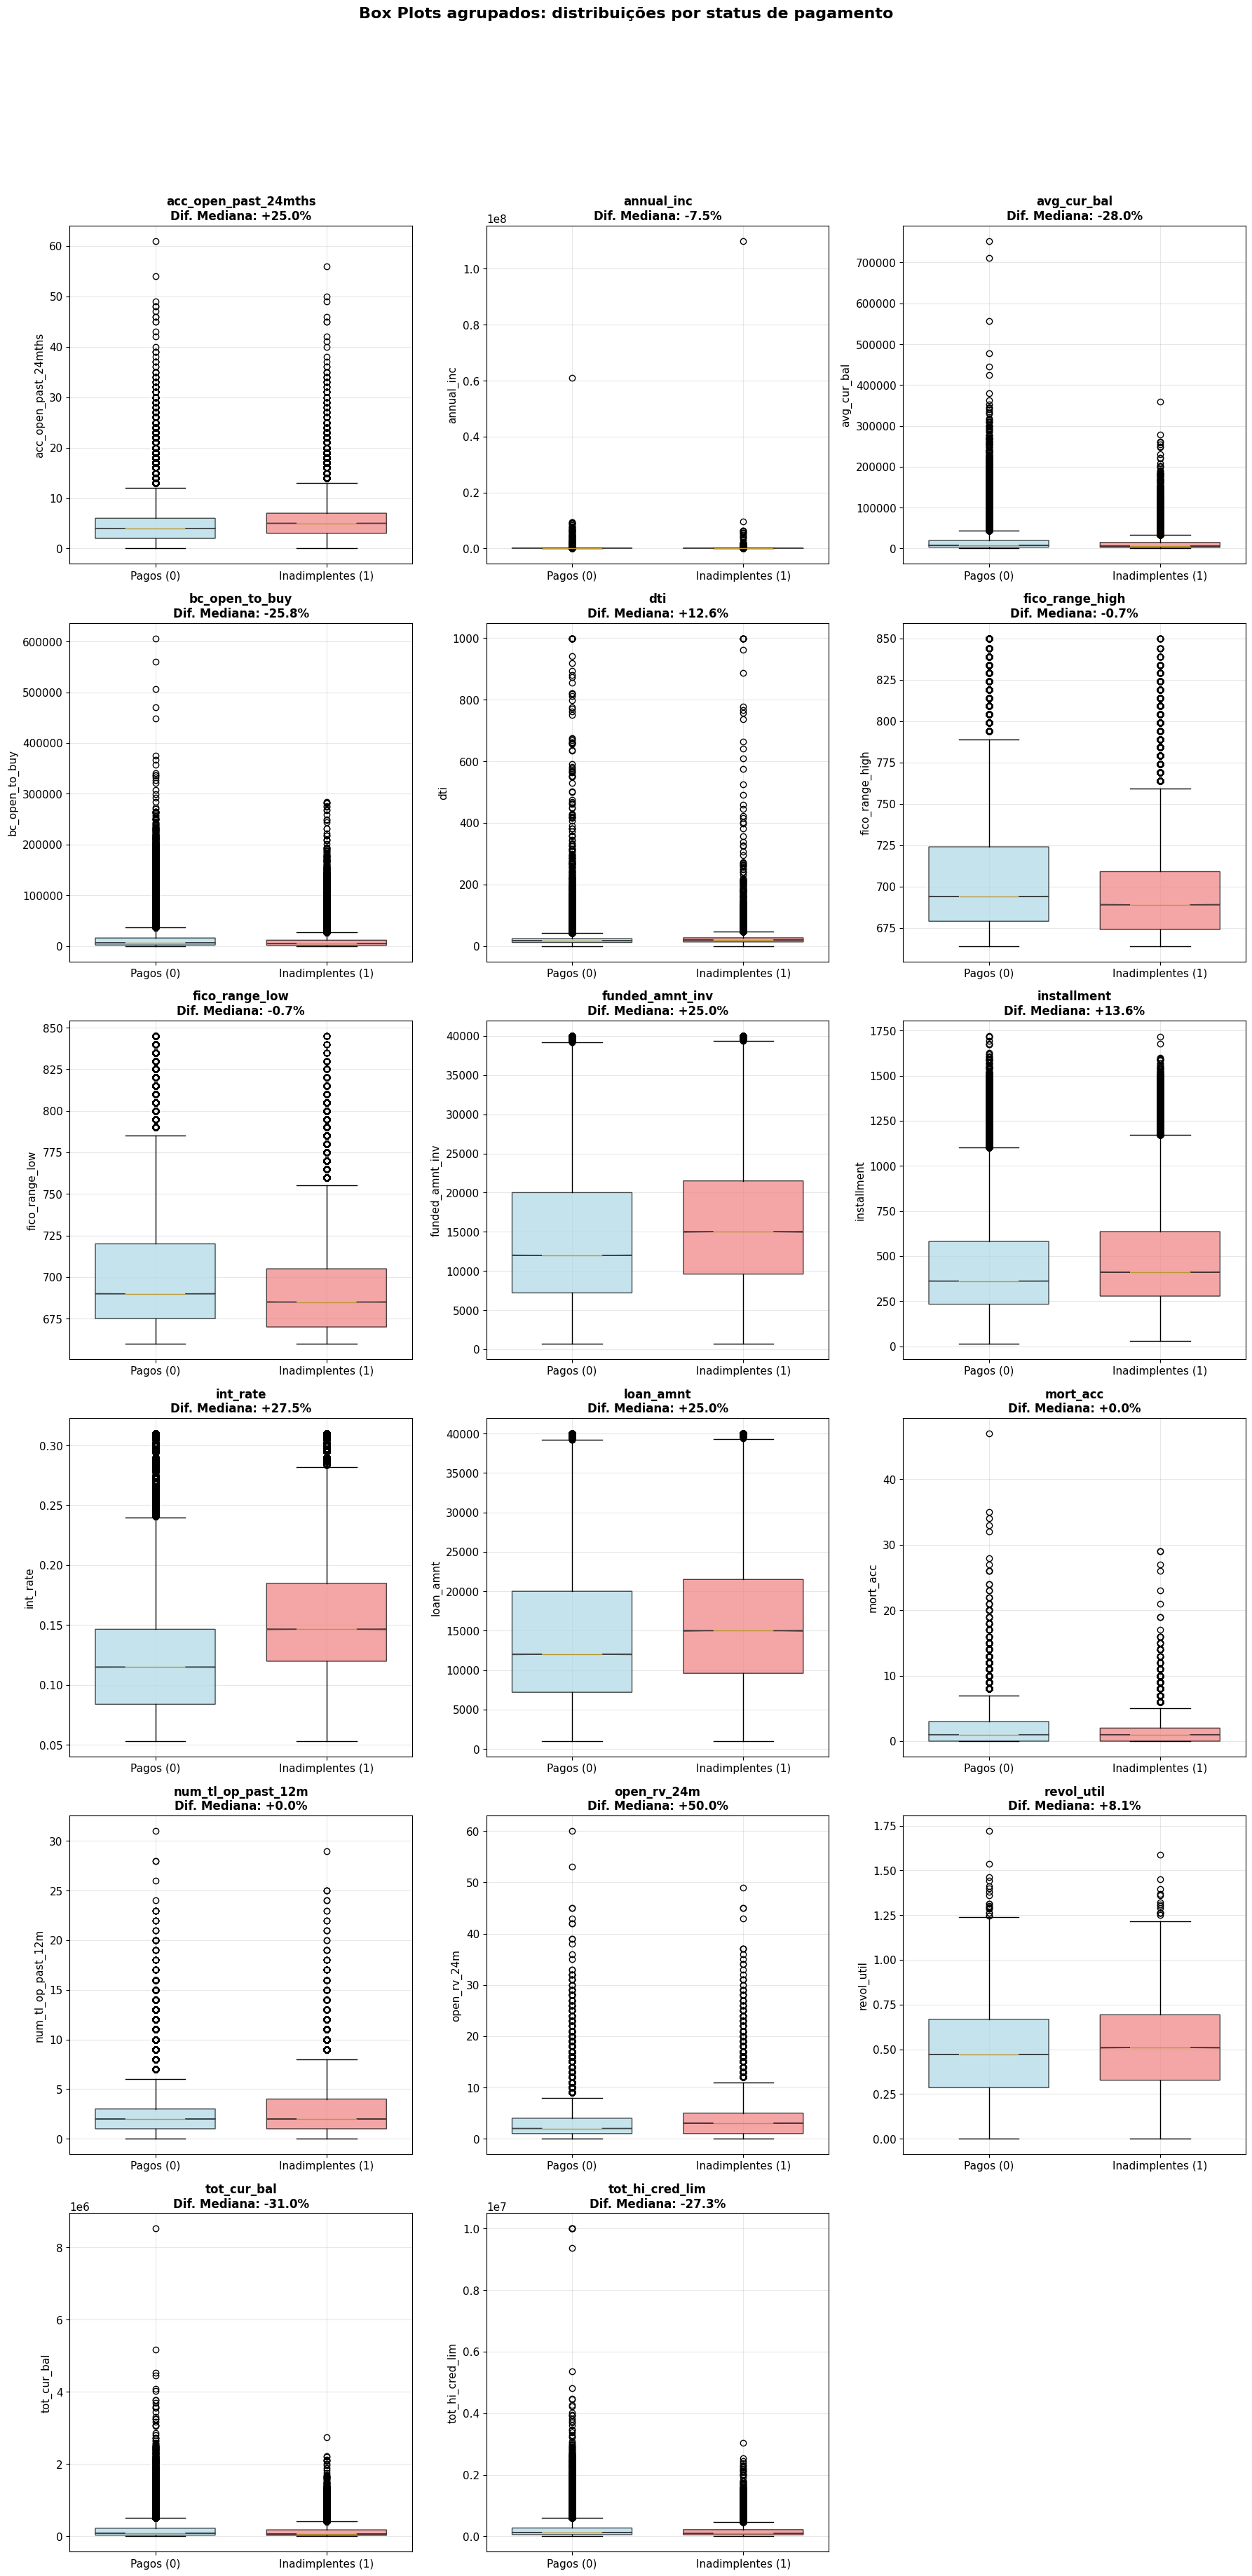

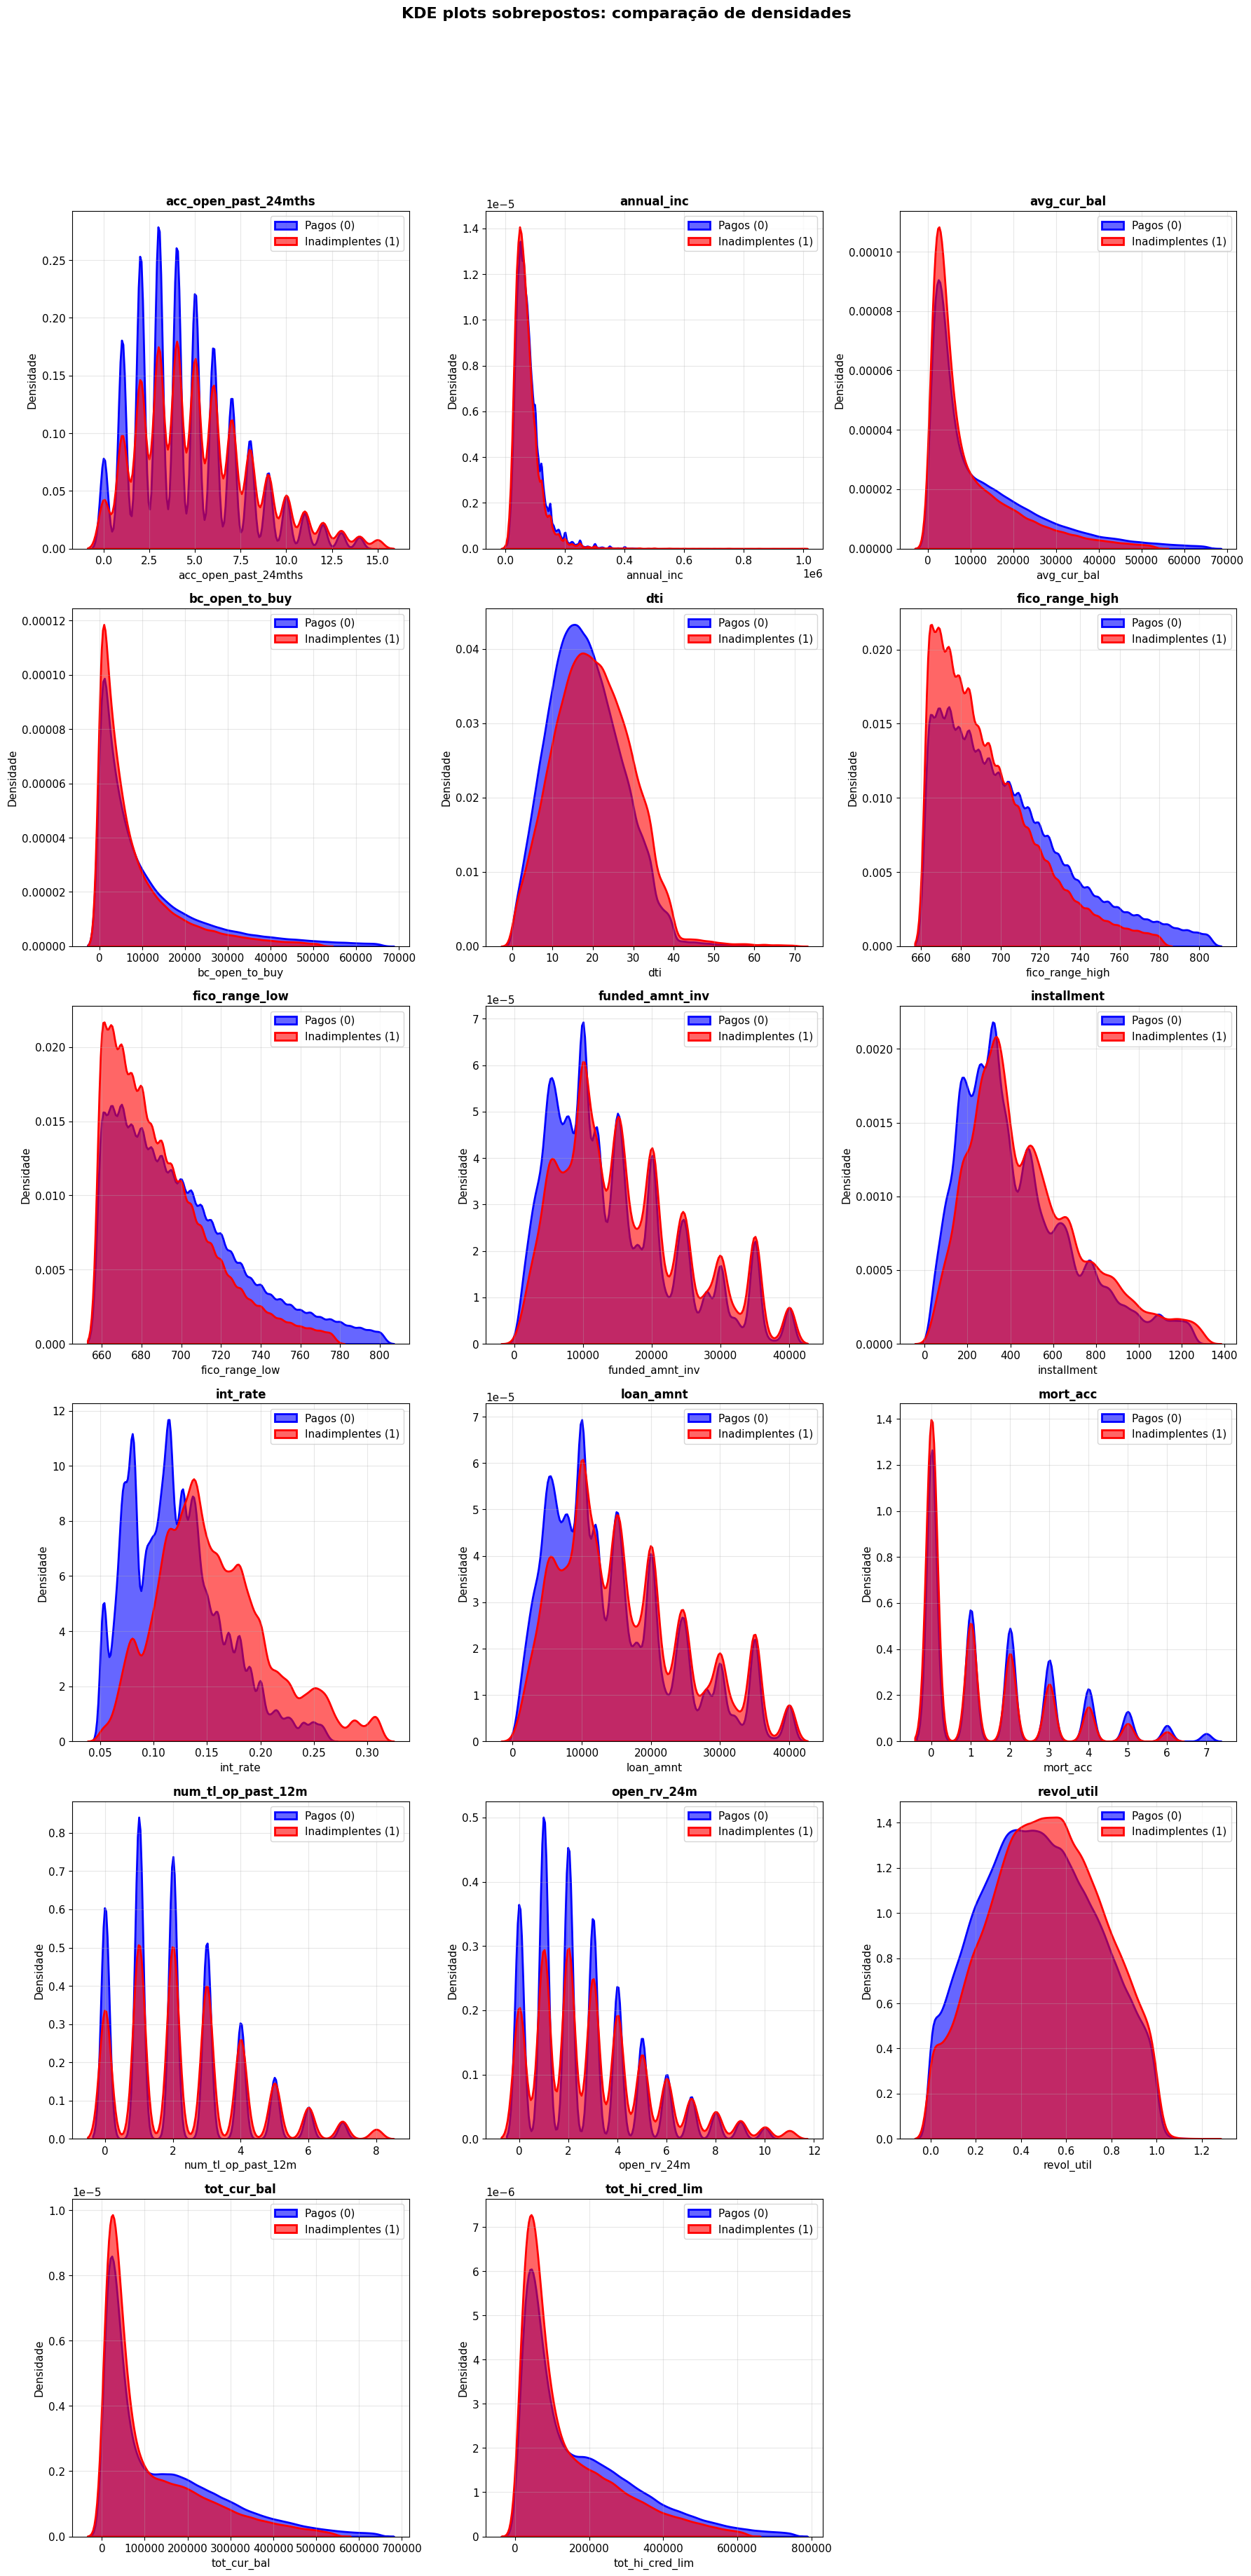


ESTATÍSTICAS COMPARATIVAS POR GRUPO
Variável        Med.Pagos    Med.Inadimp  Dif.%    p-value    Signif.  Effect Size 
----------------------------------------------------------------------------------------------------
acc_open_past_24mths 4.00         5.00         25.0     0.000e+00  Sim      0.120       
annual_inc      67000.00     62000.00     -7.5     0.000e+00  Sim      -0.080      
avg_cur_bal     7974.00      5739.00      -28.0    0.000e+00  Sim      -0.112      
bc_open_to_buy  6223.00      4618.00      -25.8    0.000e+00  Sim      -0.111      
dti             17.58        19.79        12.6     0.000e+00  Sim      0.120       
fico_range_high 694.00       689.00       -0.7     0.000e+00  Sim      -0.163      
fico_range_low  690.00       685.00       -0.7     0.000e+00  Sim      -0.163      
funded_amnt_inv 12000.00     15000.00     25.0     0.000e+00  Sim      0.124       
installment     361.48       410.60       13.6     0.000e+00  Sim      0.114       
int_rate        0

In [12]:
# ==============================================================================
# 7. ANÁLISE COMPARATIVA: DISTRIBUIÇÕES POR GRUPO DE PAGAMENTO
# ==============================================================================

print("\n" + "="*60)
print("7. ANÁLISE COMPARATIVA DAS VARIÁVEIS NUMÉRICAS: DISTRIBUIÇÕES POR ADIMPLÊNCIA")
print("="*60)

print("Objetivo: Visualizar como a distribuição de cada variável numérica chave")
print("se comporta para os dois grupos: empréstimos pagos vs inadimplentes")

def analyze_distributions_by_target(df, variables):
    """
    Analisa como a distribuição de cada variável numérica se comporta
    para os dois grupos: empréstimos pagos (target_default = 0) e
    inadimplentes (target_default = 1).
    """

    # Separar os grupos
    paid_group = df[df['target_default'] == 0]
    default_group = df[df['target_default'] == 1]

    print(f"Tamanho dos grupos:")
    print(f"- Empréstimos pagos (target_default = 0): {len(paid_group):,}")
    print(f"- Empréstimos inadimplentes (target_default = 1): {len(default_group):,}")
    print(f"- Taxa de inadimplência: {len(default_group)/len(df)*100:.1f}%")

    # 1. BOX PLOTS AGRUPADOS
    n_vars = len(variables)
    n_cols = 3
    n_rows = (n_vars + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
    if n_vars == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    fig.suptitle('Box Plots agrupados: distribuições por status de pagamento',
                 fontsize=16, fontweight='bold', y=1.02)

    for i, var in enumerate(variables):
        ax = axes[i]

        # Preparar dados para o box plot
        data_to_plot = [paid_group[var].dropna(), default_group[var].dropna()]
        labels = ['Pagos (0)', 'Inadimplentes (1)']

        bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True,
                       notch=True, widths=0.7)

        # Colorir as caixas
        bp['boxes'][0].set_facecolor('lightblue')
        bp['boxes'][0].set_alpha(0.7)
        bp['boxes'][1].set_facecolor('lightcoral')
        bp['boxes'][1].set_alpha(0.7)

        # Calcular diferença nas medianas
        median_paid = paid_group[var].median()
        median_default = default_group[var].median()
        diff_pct = ((median_default - median_paid) / median_paid) * 100

        ax.set_title(f'{var}\nDif. Mediana: {diff_pct:+.1f}%',
                    fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.set_ylabel(var)

    # Ocultar eixos não utilizados
    for j in range(n_vars, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # 2. KDE PLOTS SOBREPOSTOS
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
    if n_vars == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    fig.suptitle('KDE plots sobrepostos: comparação de densidades',
                 fontsize=16, fontweight='bold', y=1.02)

    for i, var in enumerate(variables):
        ax = axes[i]

        paid_clean = paid_group[var].dropna()
        default_clean = default_group[var].dropna()

        # Remover apenas outliers extremos para visualização (3 sigma)
        paid_clean = paid_clean[np.abs(stats.zscore(paid_clean)) < 3]
        default_clean = default_clean[np.abs(stats.zscore(default_clean)) < 3]

        # Plot KDE com preenchimento
        sns.kdeplot(data=paid_clean, ax=ax, label='Pagos (0)',
                   color='blue', alpha=0.6, linewidth=2, fill=True)
        sns.kdeplot(data=default_clean, ax=ax, label='Inadimplentes (1)',
                   color='red', alpha=0.6, linewidth=2, fill=True)

        ax.set_title(f'{var}', fontsize=12, fontweight='bold')
        ax.set_xlabel(var)
        ax.set_ylabel('Densidade')
        ax.legend()
        ax.grid(True, alpha=0.3)

    # Ocultar eixos não utilizados
    for j in range(n_vars, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # 4. TABELA DE ESTATÍSTICAS COMPARATIVAS
    print("\n" + "="*100)
    print("ESTATÍSTICAS COMPARATIVAS POR GRUPO")
    print("="*100)

    stats_comparison = []

    for var in variables:
        paid_data = paid_group[var].dropna()
        default_data = default_group[var].dropna()

        # Estatísticas descritivas
        paid_stats = {
            'mediana': paid_data.median(),
            'media': paid_data.mean(),
            'desvio_padrao': paid_data.std()
        }

        default_stats = {
            'mediana': default_data.median(),
            'media': default_data.mean(),
            'desvio_padrao': default_data.std()
        }

        # Teste Mann-Whitney U (não-paramétrico)
        try:
            statistic, p_value = stats.mannwhitneyu(paid_data, default_data,
                                                   alternative='two-sided')

            # Effect size (rank-biserial correlation)
            n1, n2 = len(paid_data), len(default_data)
            effect_size = 1 - (2 * statistic) / (n1 * n2)

        except Exception as e:
            p_value = np.nan
            effect_size = np.nan

        # Diferença percentual nas medianas
        mediana_diff_pct = ((default_stats['mediana'] - paid_stats['mediana']) /
                           paid_stats['mediana'] * 100)

        stats_comparison.append({
            'variavel': var,
            'mediana_pagos': paid_stats['mediana'],
            'mediana_inadimplentes': default_stats['mediana'],
            'diferenca_mediana_pct': mediana_diff_pct,
            'p_value_mannwhitney': p_value,
            'effect_size': effect_size,
            'significativo': 'Sim' if p_value < 0.05 else 'Não'
        })

    # Criar DataFrame com os resultados
    comparison_df = pd.DataFrame(stats_comparison)

    # Exibir tabela formatada
    print(f"{'Variável':<15} {'Med.Pagos':<12} {'Med.Inadimp':<12} {'Dif.%':<8} {'p-value':<10} {'Signif.':<8} {'Effect Size':<12}")
    print("-" * 100)

    for _, row in comparison_df.iterrows():
        print(f"{row['variavel']:<15} {row['mediana_pagos']:<12.2f} "
              f"{row['mediana_inadimplentes']:<12.2f} {row['diferenca_mediana_pct']:<8.1f} "
              f"{row['p_value_mannwhitney']:<10.3e} {row['significativo']:<8} "
              f"{row['effect_size']:<12.3f}")

    return comparison_df

# Executar a análise comparativa
key_numeric_for_comparison = [col for col in existing_key_numeric if col in df.columns and col != 'term']
print(f"Variáveis analisadas: {key_numeric_for_comparison}")

comparison_results = analyze_distributions_by_target(df, key_numeric_for_comparison)




### Análise de variáveis categóricas

Nesta seção, investigamos como as variáveis categóricas se relacionam com a inadimplência (`target_default`). A análise busca identificar quais categorias de tomadores apresentam maior ou menor risco, fornecendo insights valiosos para a segmentação de clientes e para a construção do modelo preditivo.

A leitura simultânea das barras (volume de empréstimos) e da linha vermelha (taxa de default) mostra um retrato bastante consistente: **`Grade`** é o grande marcador de crédito entre as variáveis categóricas. A inadimplência sai de algo em torno de 8 % nos tomadores nota A e sobe em degraus firmes até ultrapassar 50 % nos casos-limite da série G, validando a escala de rating da Lending Club.

Já para o **prazo do contrato**, em financiamentos de 36 meses a frequência de não pagamento fica perto de 18 %; estender o débito para 60 meses praticamente dobra o risco, chegando à casa dos 34 %. Como esperado, quanto mais longo o horizonte, maior a probabilidade de o mutuário sofrer choques de renda que prejudiquem o pagamento.

Entre as variáveis de perfil, **`Application_Type`** aponta que pedidos conjuntos (“Joint App”) carregam default perto de 29 %, bem acima dos 22 % observados em solicitações individuais. O efeito é menos dramático que o de `Grade`, mas contribui para a segmentação.

Os resultados de **`Verification_Status`** chamam a atenção porque caminham na direção oposta ao senso comum: contas “Verified” concentram quase 27 % de inadimplência, enquanto perfis sem verificação ficam em torno de 18 %. Isso sugere que o processo de checagem tende a ser acionado justamente quando já há suspeita de maior risco — uma seleção adversa produzida pelo próprio fluxo de crédito.

Quanto à **propriedade do imóvel**, mutuários com casa financiada apresentam cerca de 19 % de default, frente a quase 26 % dos locatários. A hipótese de maior “ancoragem” financeira entre quem paga hipoteca — e, portanto, mantém relação estável com o sistema — ganha força aqui.

O campo **`Purpose`** ilustra como a destinação do dinheiro faz diferença: compras de veículo se mantêm abaixo de 16 % de não pagamento, ao passo que empréstimos para pequenos negócios sobem para a faixa de 31 %. Finalidades associadas a fluxo de caixa incerto — consolidação de dívidas, capital de giro — tendem naturalmente a maior estresse.

Por fim, **`Emp_Length`** exibe apenas um leve gradiente: de cerca de 20 % para trabalhadores com menos de um ano de emprego até 24 % para aqueles com mais de dez anos. A variabilidade limitada sugere que a variável, isoladamente, carrega pouco poder preditivo quando comparada às demais.

Em linhas gerais, portanto, o modelo preditivo deverá ter como pilares `Grade` e `Term`, complementados por `Purpose`, `Application_Type` e `Home_Ownership` para captar nuances de risco.  

A análise complementar do sub_grade revelou progressão majoritariamente consistente de risco, com tendência média de 1,6% por nível. Embora a sequência seja robusta nos grades A-E, observam-se irregularidades específicas nos grades superiores: F3 apresenta risco menor que F2, e G1 mostra default rate anormalmente baixo (49,1%) comparado aos sub_grades F adjacentes.

Estas anomalias refletem tanto volumes amostrais decrescentes (F1: 3.348 vs G5: 437 empréstimos) quanto possível instabilidade estatística em categorias de alto risco com menor representatividade. Apesar das irregularidades pontuais, a diferença de 52,8 pontos percentuais entre extremos e a progressão geral validam que o sub_grade oferece granularidade superior ao grade simples, devendo ser prioritário na modelagem para a faixa A-E onde se concentra a maioria do portfólio.





8. ANÁLISE DE VARIÁVEIS CATEGÓRICAS
Variáveis categóricas identificadas para análise: 7
['application_type', 'emp_length', 'grade', 'home_ownership', 'purpose', 'term', 'verification_status']


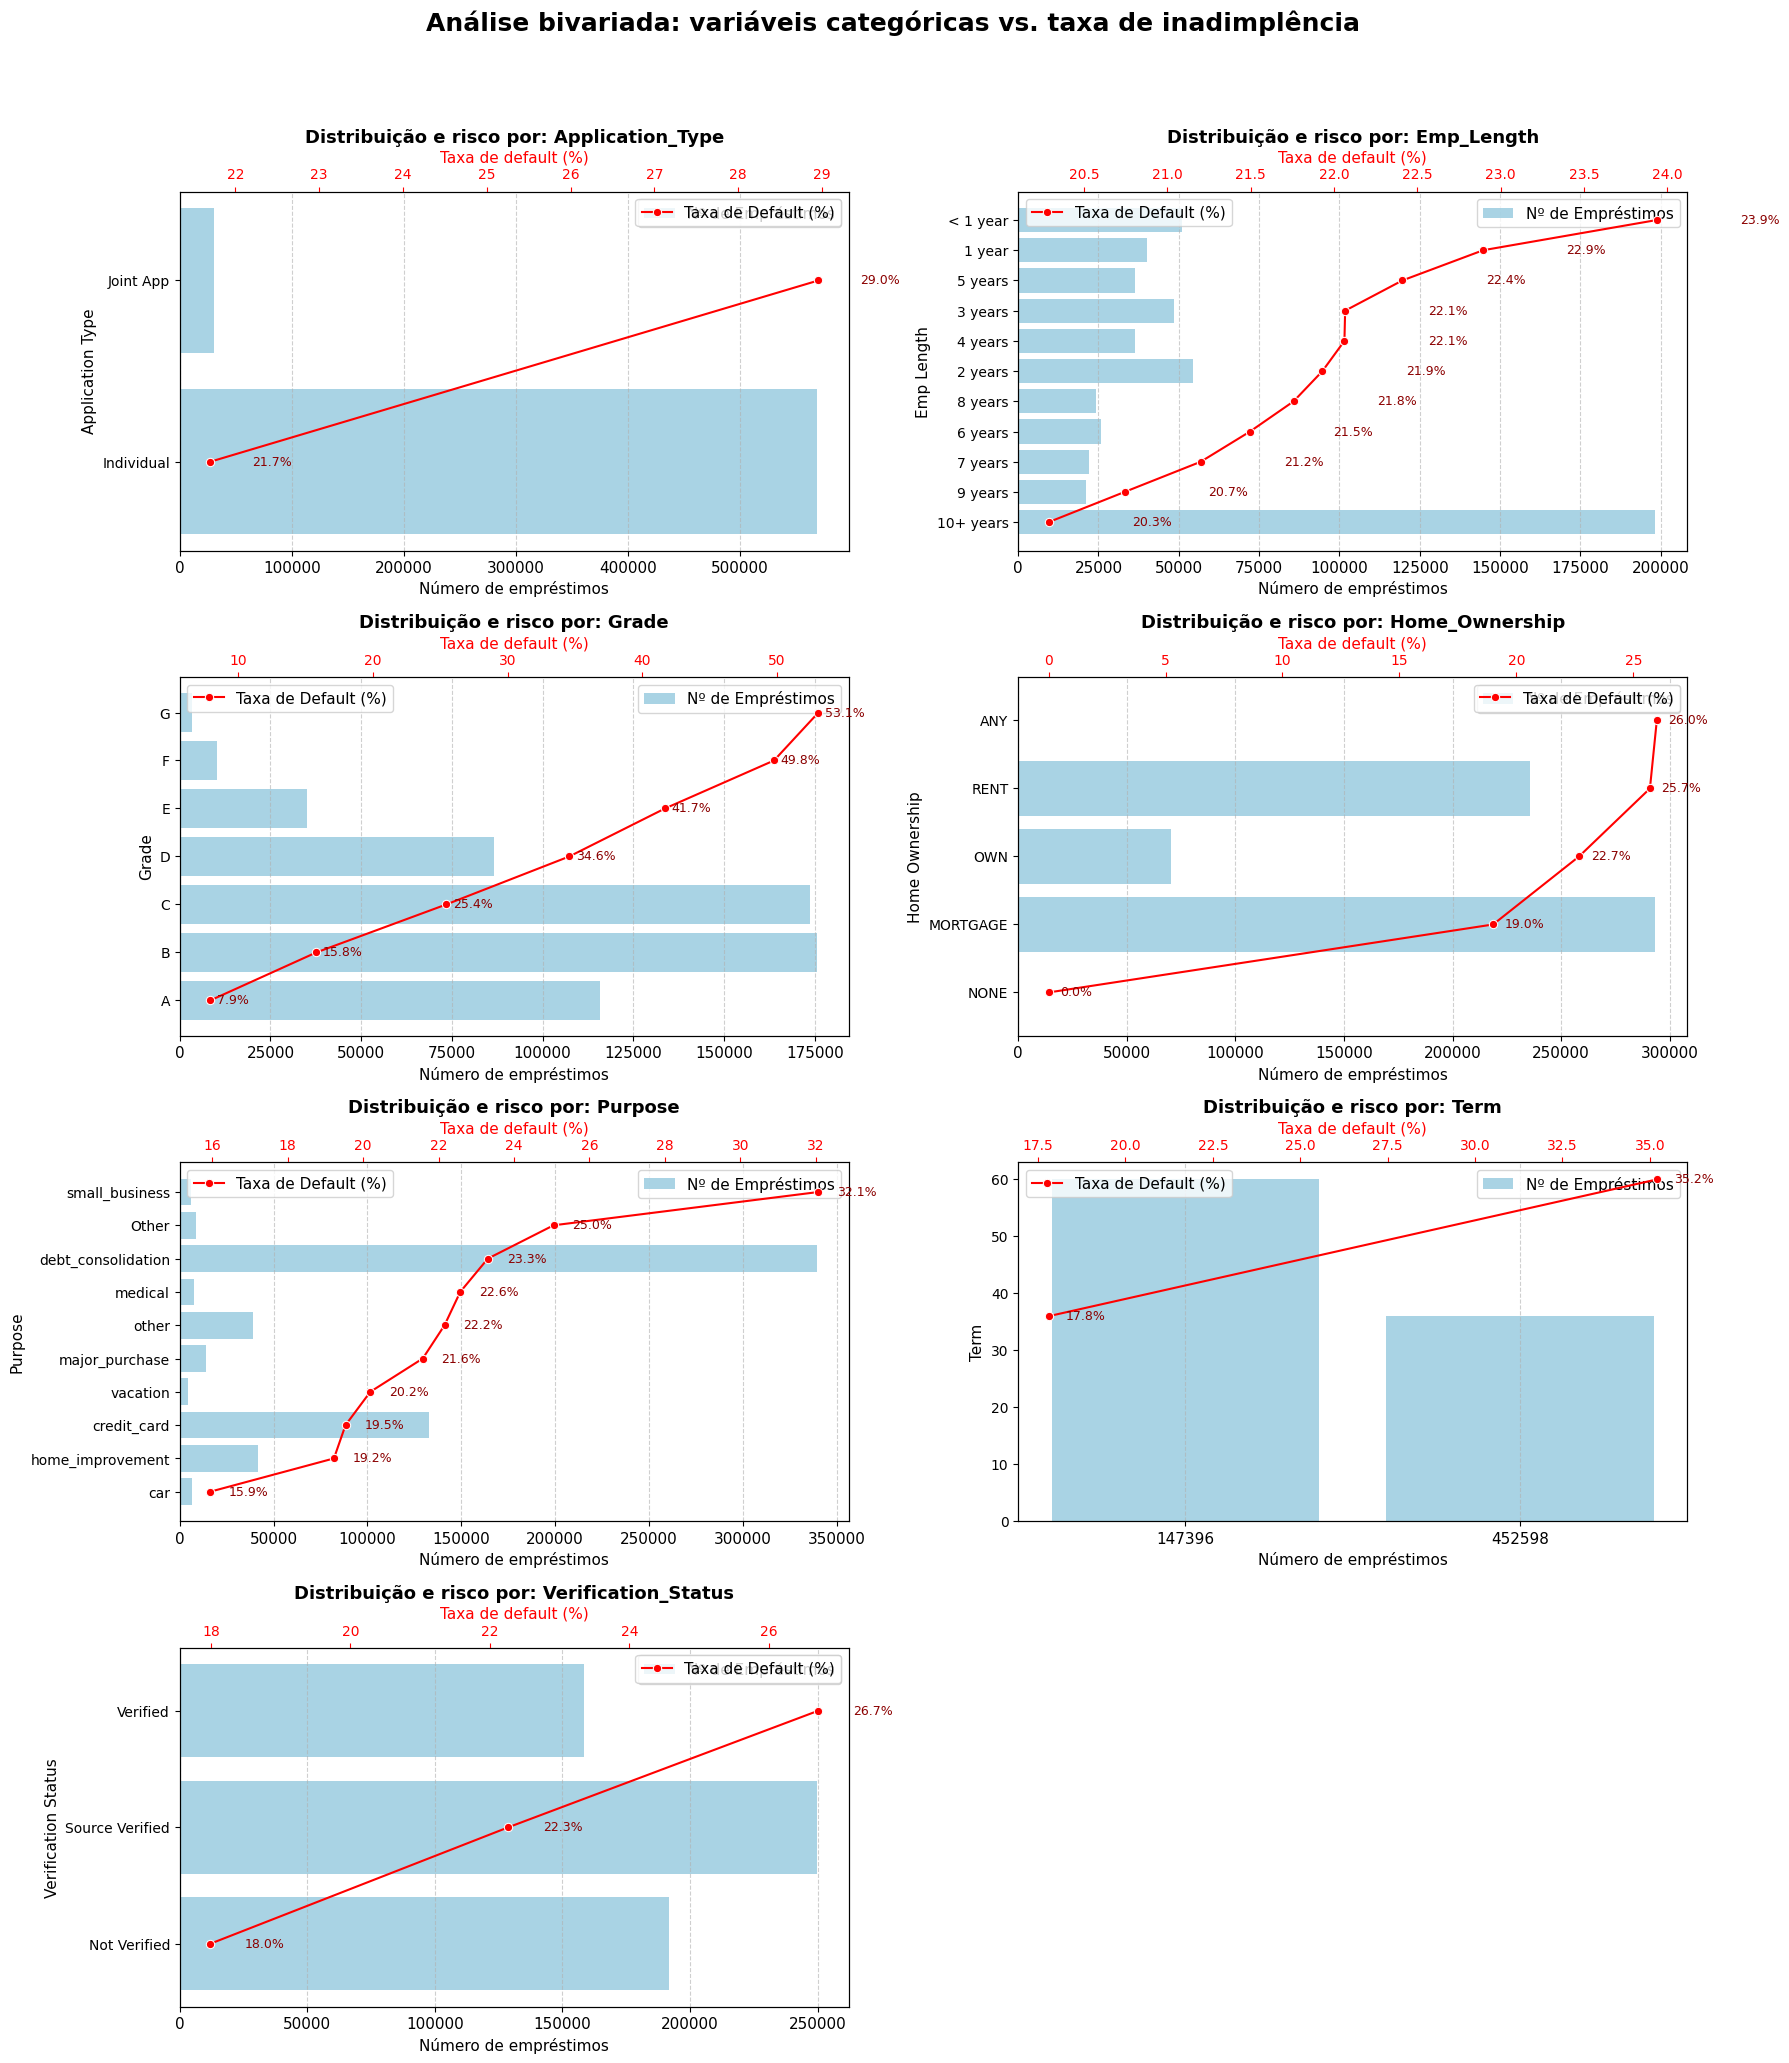

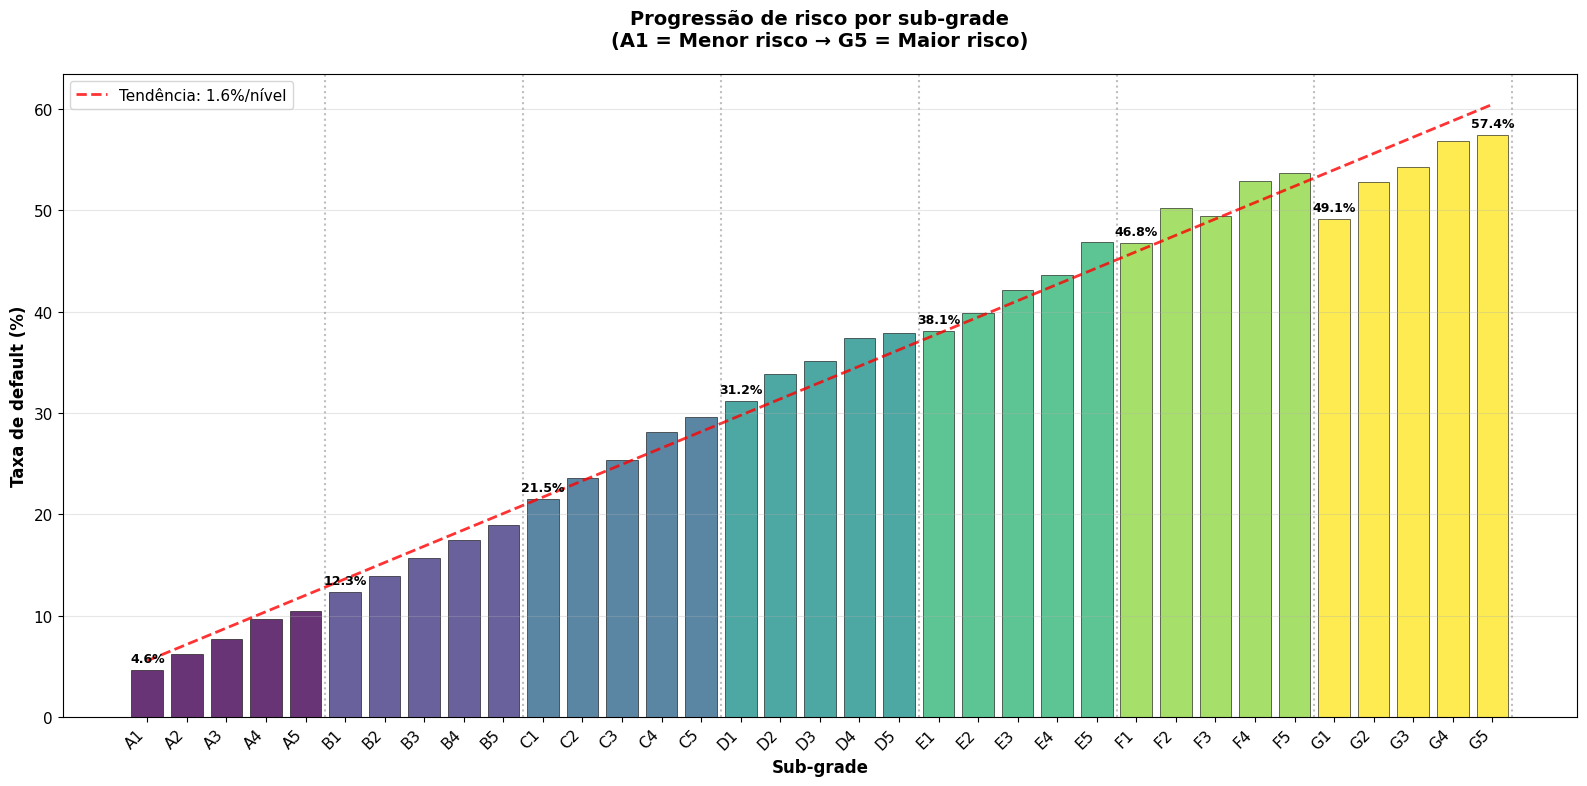


ESTATÍSTICAS DE PROGRESSÃO SUB-GRADE
Range total: 4.6% a 57.4%
Diferença A1 vs G5: 52.8 pontos percentuais
Tendência média: 1.6% de aumento por nível
Volumes nos grades F-G (onde ocorrem anomalias):
  sub_grade  count   mean
0        F1   3348 0.4677
1        F2   2256 0.5018
2        F3   1902 0.4947
3        F4   1473 0.5289
4        F5   1307 0.5371
5        G1   1063 0.4911
6        G2    708 0.5282
7        G3    547 0.5430
8        G4    482 0.5685
9        G5    437 0.5744


In [13]:
# ==============================================================================
# 8. ANÁLISE DE VARIÁVEIS CATEGÓRICAS
# ==============================================================================

print("\n" + "="*60)
print("8. ANÁLISE DE VARIÁVEIS CATEGÓRICAS")
print("="*60)

categorical_vars = []

for col in extended_key_columns:
    if col in df.columns and col != 'target_default':
        if df[col].dtype == 'object':
            categorical_vars.append(col)
        # Incluir variáveis numéricas com baixa cardinalidade (tratadas como categóricas)
        elif df[col].dtype in ['int64', 'float64'] and df[col].nunique() < 15:
            categorical_vars.append(col)

# Remover variáveis que não são úteis para esta análise específica
cols_to_exclude = ['issue_d', 'earliest_cr_line', 'sub_grade', 'addr_state']
analysis_cols = [col for col in categorical_vars if col not in cols_to_exclude]

print(f"Variáveis categóricas identificadas para análise: {len(analysis_cols)}")
print(analysis_cols)


def plot_categorical_analysis(df, col, ax):
    """
    Cria um gráfico combinado com a distribuição de empréstimos e a taxa de default por categoria.
    """
    # 1. Preparar os dados
    data = df.groupby(col)['target_default'].agg(['count', 'mean']).reset_index()
    data = data.rename(columns={'count': 'n_emprestimos', 'mean': 'taxa_default'})
    data['taxa_default'] *= 100
    data = data.sort_values('taxa_default', ascending=False)

    # 2. Gráfico de Barras (Distribuição)
    sns.barplot(x='n_emprestimos', y=col, data=data, ax=ax, color='skyblue', alpha=0.8, label='Nº de Empréstimos')
    ax.set_xlabel('Número de empréstimos', fontsize=11)
    ax.set_ylabel(col.replace('_', ' ').title(), fontsize=11)
    ax.tick_params(axis='y', labelsize=10)

    # 3. Gráfico de Linha (Taxa de Default)
    ax2 = ax.twiny()
    sns.lineplot(x='taxa_default', y=col, data=data, ax=ax2, color='red', marker='o', label='Taxa de Default (%)')
    ax2.set_xlabel('Taxa de default (%)', fontsize=11, color='red')
    ax2.tick_params(axis='x', colors='red', labelsize=10)
    ax2.grid(False) # Desativar grid do segundo eixo para não poluir

    # Adicionar valores da taxa de default no gráfico de linha
    for index, row in data.iterrows():
        ax2.text(row['taxa_default'] + 0.5, row[col], f"{row['taxa_default']:.1f}%",
                 color='darkred', ha="left", va="center", fontsize=9)

    ax.set_title(f'Distribuição e risco por: {col.title()}', fontsize=13, fontweight='bold')
    ax.grid(axis='x', linestyle='--', alpha=0.6)


# Definir as variáveis mais importantes para visualizar
key_categorical_vars = analysis_cols

# Criar a figura e os eixos para os plots
# Ajustar o número de linhas conforme a quantidade de variáveis
n_vars = len(key_categorical_vars)
n_cols = 2
n_rows = (n_vars + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, var in enumerate(key_categorical_vars):
    # A variável 'purpose' tem muitas categorias, vamos agrupar as menores
    if var == 'purpose' and df[var].nunique() > 10:
        top_categories = df[var].value_counts().nlargest(9).index
        df_plot = df.copy()
        df_plot[var] = df_plot[var].apply(lambda x: x if x in top_categories else 'Other')
        plot_categorical_analysis(df_plot, var, axes[i])
    else:
        plot_categorical_analysis(df, var, axes[i])

# Ocultar eixos não utilizados
for j in range(n_vars, len(axes)):
    axes[j].set_visible(False)

fig.suptitle('Análise bivariada: variáveis categóricas vs. taxa de inadimplência', fontsize=18, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()

def analyze_subgrade_progression(df):
    """
    Análise visual da progressão de risco através de todos os sub_grades
    em um único gráfico limpo e informativo
    """

    # Preparar dados
    sub_analysis = df.groupby('sub_grade')['target_default'].agg(['count', 'mean']).reset_index()
    sub_analysis['taxa_default'] = sub_analysis['mean'] * 100

    # Ordenar sub_grades corretamente (A1, A2, ..., G5)
    grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    sub_analysis['grade'] = sub_analysis['sub_grade'].str[0]
    sub_analysis['sub_num'] = sub_analysis['sub_grade'].str[1].astype(int)
    sub_analysis['order'] = sub_analysis['grade'].map({g: i for i, g in enumerate(grade_order)}) * 5 + sub_analysis['sub_num']
    sub_analysis = sub_analysis.sort_values('order')

    # Criar gráfico
    fig, ax = plt.subplots(figsize=(16, 8))

    # Cores diferentes para cada grade
    colors = plt.cm.viridis(np.linspace(0, 1, 7))
    bar_colors = [colors[grade_order.index(row['grade'])] for _, row in sub_analysis.iterrows()]

    bars = ax.bar(range(len(sub_analysis)), sub_analysis['taxa_default'],
                  color=bar_colors, alpha=0.8, edgecolor='black', linewidth=0.5)

    # Customizar eixos
    ax.set_xticks(range(len(sub_analysis)))
    ax.set_xticklabels(sub_analysis['sub_grade'], rotation=45, ha='right')
    ax.set_ylabel('Taxa de default (%)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Sub-grade', fontsize=12, fontweight='bold')
    ax.set_title('Progressão de risco por sub-grade\n(A1 = Menor risco → G5 = Maior risco)',
                fontsize=14, fontweight='bold', pad=20)

    # Adicionar linha de tendência
    x_vals = range(len(sub_analysis))
    z = np.polyfit(x_vals, sub_analysis['taxa_default'], 1)
    p = np.poly1d(z)
    ax.plot(x_vals, p(x_vals), "r--", alpha=0.8, linewidth=2, label=f'Tendência: {z[0]:.1f}%/nível')

    # Adicionar valores nas barras (só para alguns pontos para não poluir)
    for i, (bar, row) in enumerate(zip(bars, sub_analysis.itertuples())):
        if i % 5 == 0 or i == len(bars) - 1:  # Mostrar só no primeiro de cada grade + último
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Separadores visuais entre grades
    for i in range(4, len(sub_analysis), 5):
        ax.axvline(x=i+0.5, color='gray', linestyle=':', alpha=0.5)

    # Adicionar legend e grid
    ax.legend(loc='upper left')
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Estatísticas resumo
    print("\n" + "="*60)
    print("ESTATÍSTICAS DE PROGRESSÃO SUB-GRADE")
    print("="*60)
    print(f"Range total: {sub_analysis['taxa_default'].min():.1f}% a {sub_analysis['taxa_default'].max():.1f}%")
    print(f"Diferença A1 vs G5: {sub_analysis['taxa_default'].iloc[-1] - sub_analysis['taxa_default'].iloc[0]:.1f} pontos percentuais")
    print(f"Tendência média: {z[0]:.1f}% de aumento por nível")

    return sub_analysis

# Executar análise
analyze_subgrade_progression(df)

# Focar nos grades problemáticos
fg_analysis = df[df['grade'].isin(['F', 'G'])].groupby('sub_grade')['target_default'].agg(['count', 'mean']).reset_index()
print("Volumes nos grades F-G (onde ocorrem anomalias):")
print(fg_analysis)



### Análise temporal por data de emissão

A análise temporal, levando em consideração o ano de emissão, revela uma distinção fundamental entre a eficácia da ordenação de risco e a estabilidade das taxas absolutas de default. O sistema de rating da Lending Club demonstra excelente capacidade de **ordenação relativa** do risco, mantendo consistentemente a hierarquia A < B < C < D < E < F < G em todos os anos analisados. Esta ordenação nunca se inverte, confirmando que o algoritmo de rating captura adequadamente os fatores intrínsecos de risco dos mutuários.

Contudo, as **taxas absolutas de default** evidenciam dependência de condições externas ao perfil individual dos tomadores. A Grade A, por exemplo, oscila entre 5,5% e 17,1% no período, uma variação de mais de 200% que não pode ser atribuída apenas às características dos mutuários classificados nesta categoria.

O período 2018-2019 exemplifica esta instabilidade, quando todas as grades simultaneamente deterioraram, seguido pela melhoria paradoxal de 2020 durante a pandemia, que pode ser atribuída a estímulos governamentais ou a critérios de seleção mais rigorosos. Estes movimentos síncronos indicam que fatores macroeconômicos, mudanças regulatórias, políticas monetárias e condições de mercado exercem importante influência sobre as taxas de inadimplência, independentemente da qualidade creditícia individual.

A análise da composição do portfólio entre 2015 e 2020 revela uma clara e deliberada mudança estratégica da Lending Club em direção a um perfil de menor risco. A mudança mais expressiva ocorreu na distribuição por grade, onde a participação de empréstimos de maior risco (grades D e E) diminuiu, enquanto a concentração nos grades mais seguros (A e B) aumentou significativamente. Em 2015, os grades A e B somavam cerca de 35% do portfólio; em 2020, essa fatia já ultrapassava 55%. Também é possível observar o aumento da mediana do FICO score, refletindo uma elevação na qualidade de crédito dos tomadores.




9. ANÁLISE TEMPORAL POR DATA DE EMISSÃO
Objetivo: Analisar como o risco de default por grade evoluiu no período 2015-2020
Dados preparados: 37 observações ano-grade
Período: 2015 - 2020
Matriz de dados temporais criada:
ano      2015    2016    2017    2018    2019    2020
grade                                                
A      5.5000  6.0000  7.4000 11.4000 14.5000 17.1000
B     12.8000 13.3000 16.1000 23.0000 24.9000 25.0000
C     21.9000 22.5000 26.4000 33.7000 35.5000 27.3000
D     31.0000 31.7000 34.8000 41.9000 41.7000 29.8000
E     39.9000 41.8000 41.5000 47.4000 40.9000     NaN
F     48.9000 50.9000 48.8000 51.9000     NaN     NaN
G     50.2000 55.9000 52.0000 60.6000     NaN     NaN


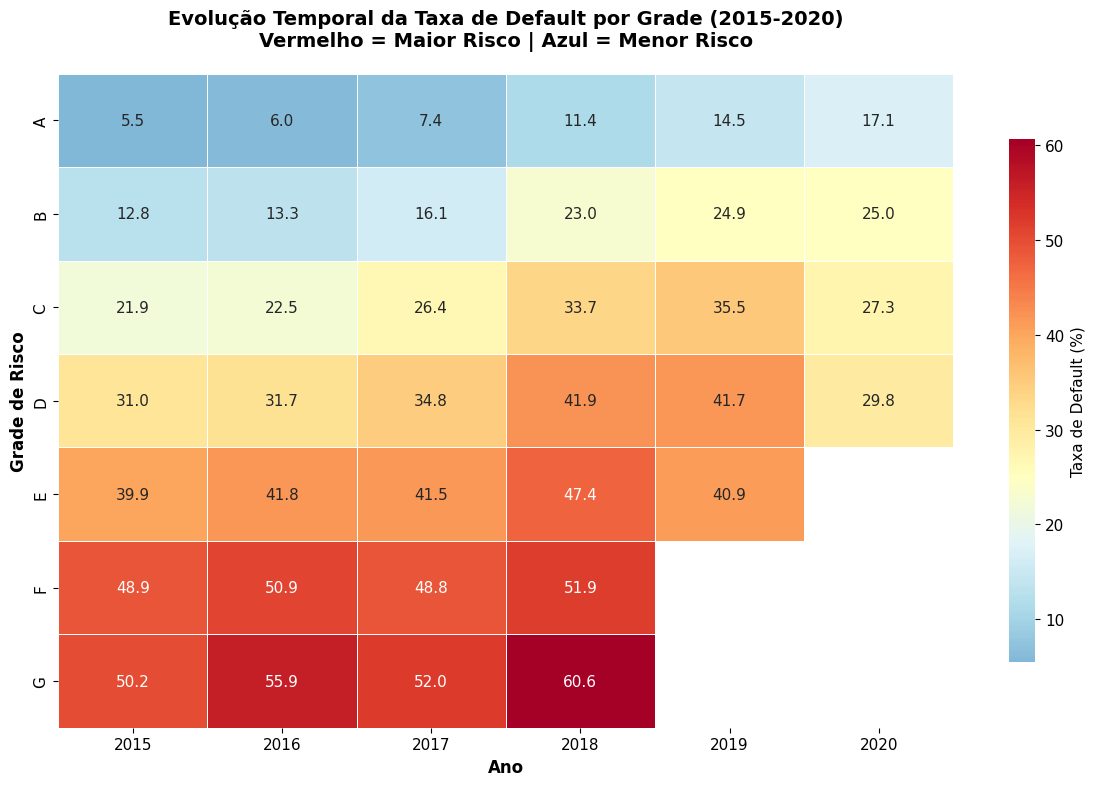


9.3 EVOLUÇÃO DAS CARACTERÍSTICAS DOS EMPRÉSTIMOS


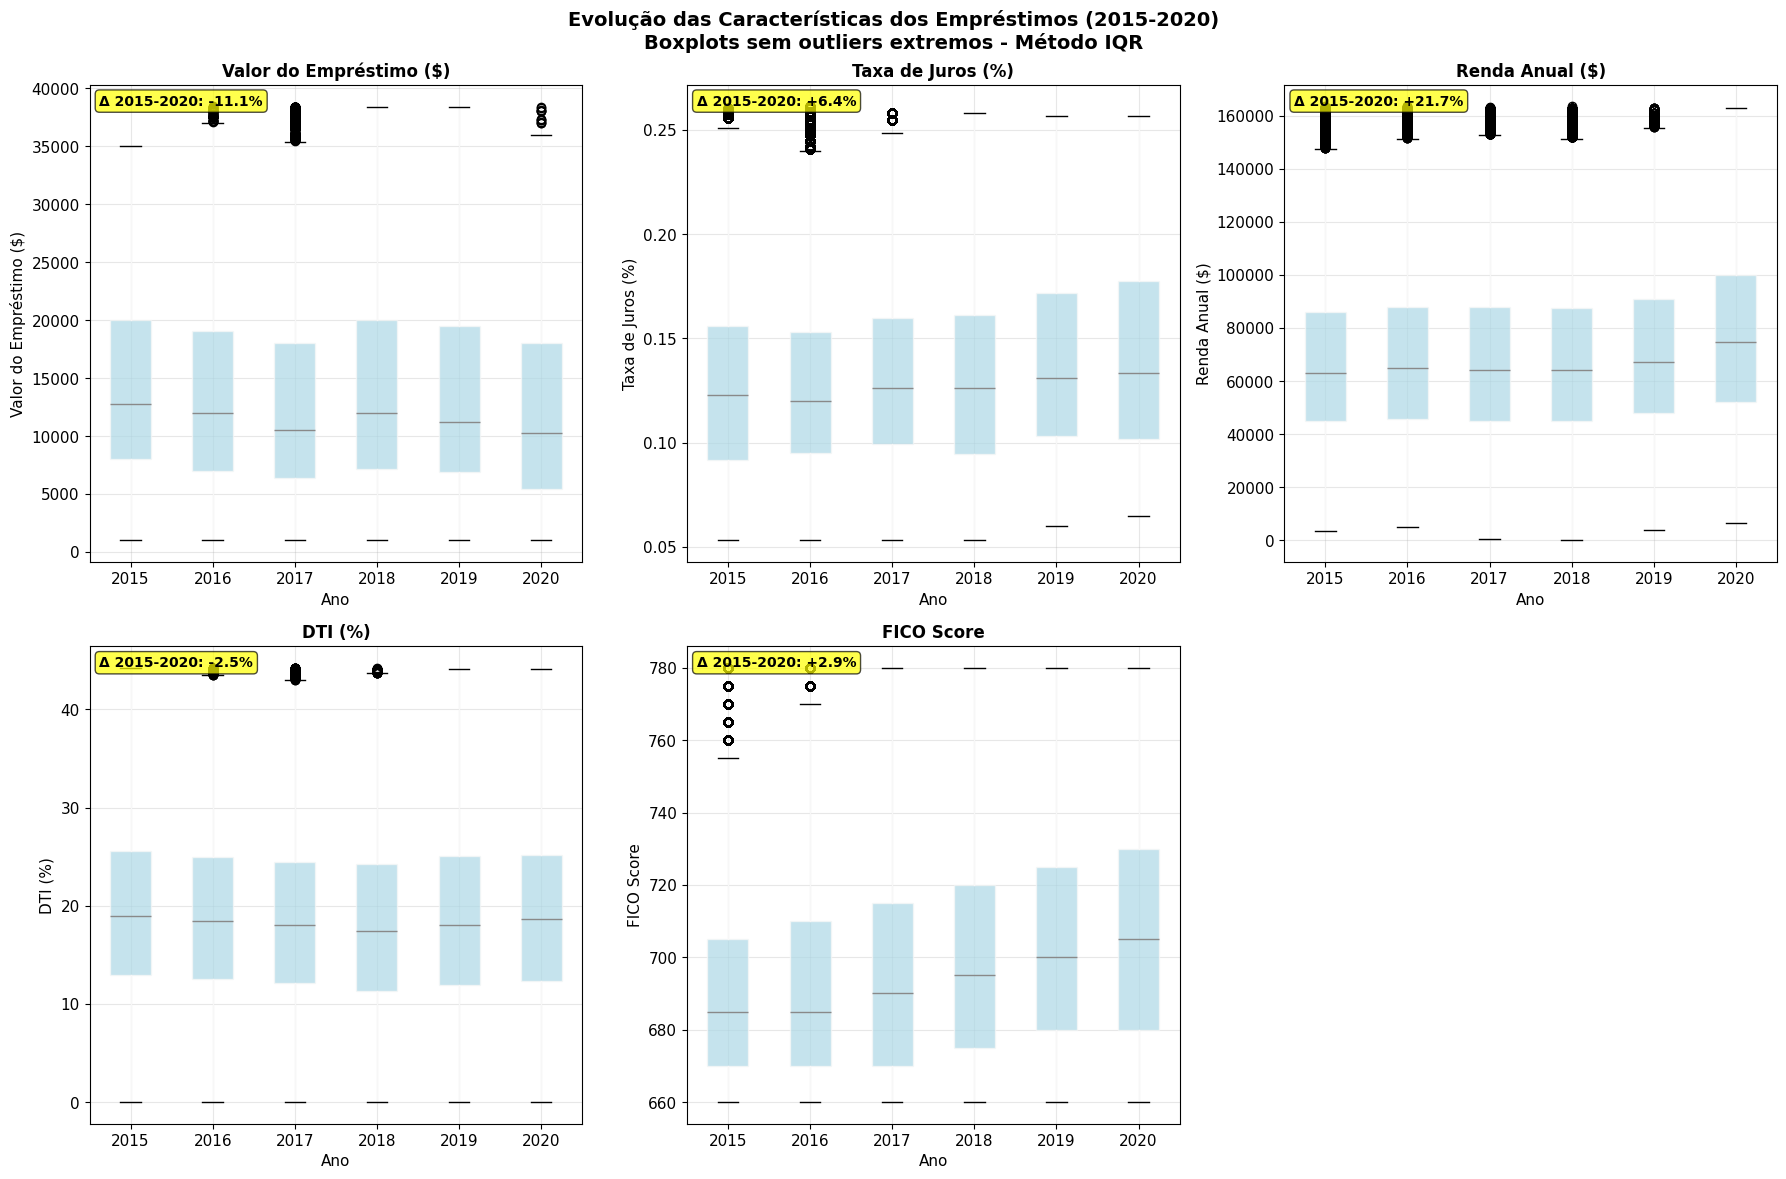


9.4 MUDANÇAS NA COMPOSIÇÃO DO PORTFÓLIO


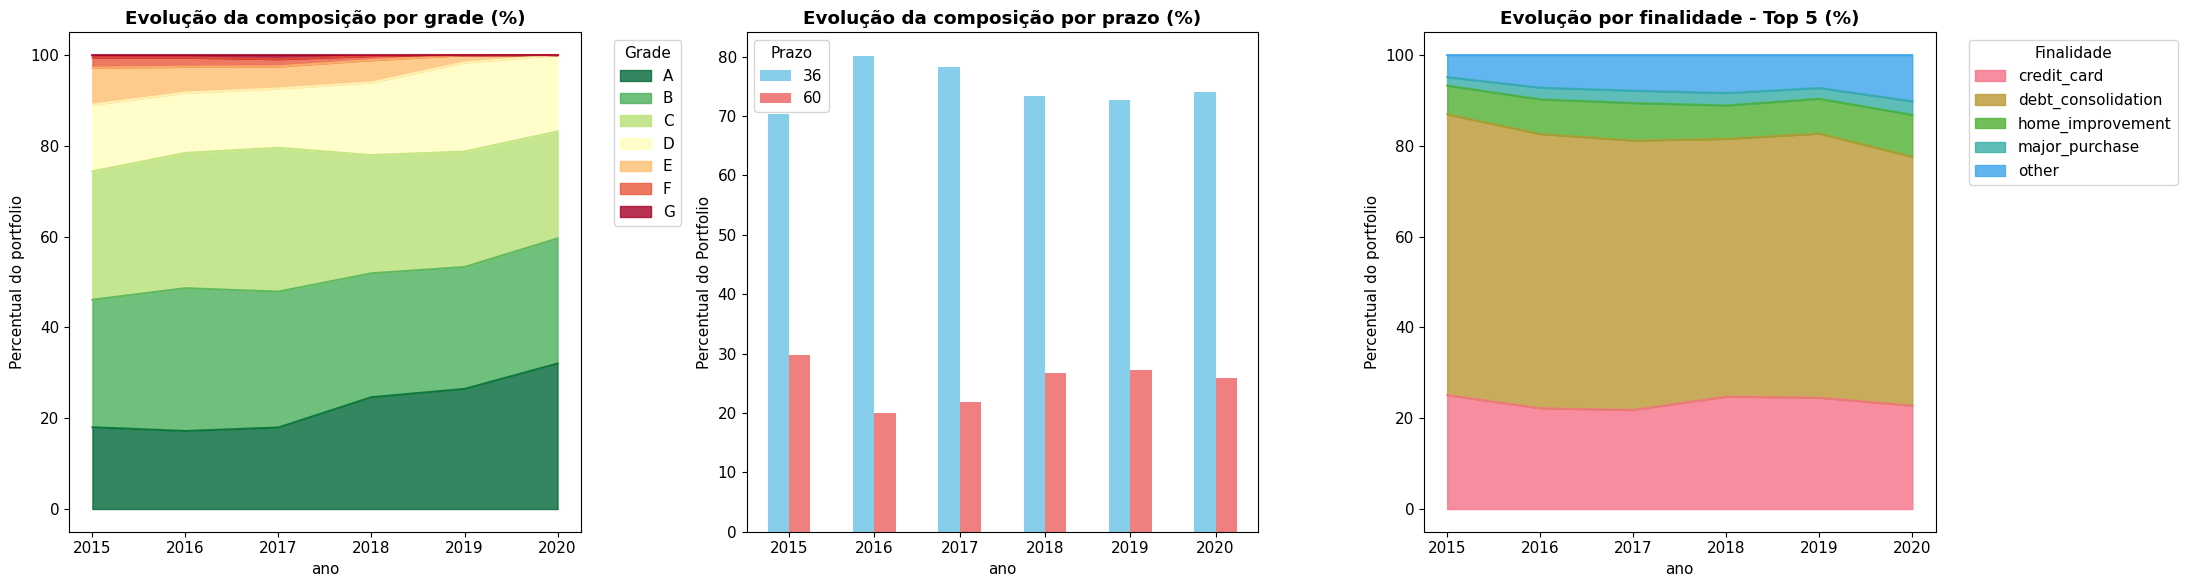

In [14]:
# ==============================================================================
# 9. ANÁLISE TEMPORAL POR DATA DE EMISSÃO
# ==============================================================================

print("\n" + "="*60)
print("9. ANÁLISE TEMPORAL POR DATA DE EMISSÃO")
print("="*60)

# Extrair ano da data de emissão
df['ano'] = pd.to_datetime(df['issue_d']).dt.year

print("Objetivo: Analisar como o risco de default por grade evoluiu no período 2015-2020")

# ==============================================================================
# 9.1 PREPARAÇÃO DOS DADOS TEMPORAIS
# ==============================================================================

# Calcular taxa de default por ano e grade
temporal_analysis = df.groupby(['ano', 'grade'])['target_default'].agg(['count', 'mean']).reset_index()
temporal_analysis['taxa_default'] = temporal_analysis['mean'] * 100

# Filtrar apenas grades com volume mínimo para evitar ruído estatístico
min_volume = 100
temporal_analysis = temporal_analysis[temporal_analysis['count'] >= min_volume]

print(f"Dados preparados: {len(temporal_analysis)} observações ano-grade")
print(f"Período: {temporal_analysis['ano'].min()} - {temporal_analysis['ano'].max()}")

# Criar pivot table para o heatmap
heatmap_data = temporal_analysis.pivot(index='grade', columns='ano', values='taxa_default')

# Garantir ordem correta das grades (A = menor risco → G = maior risco)
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
heatmap_data = heatmap_data.reindex([g for g in grade_order if g in heatmap_data.index])

print("Matriz de dados temporais criada:")
print(heatmap_data.round(1))

# ==============================================================================
# 9.2 VISUALIZAÇÃO: HEATMAP TEMPORAL
# ==============================================================================

plt.figure(figsize=(12, 8))

# Criar heatmap com anotações
sns.heatmap(heatmap_data,
            annot=True,
            fmt='.1f',
            cmap='RdYlBu_r',  # Vermelho = alto risco, Azul = baixo risco
            center=25,  # Centro da escala em 25%
            linewidths=0.5,
            cbar_kws={'label': 'Taxa de Default (%)', 'shrink': 0.8})

plt.title('Evolução Temporal da Taxa de Default por Grade (2015-2020)\n' +
          'Vermelho = Maior Risco | Azul = Menor Risco',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Grade de Risco', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ==============================================================================
# 9.3 EVOLUÇÃO DAS CARACTERÍSTICAS DOS EMPRÉSTIMOS AO LONGO DO TEMPO
# ==============================================================================

print("\n" + "="*60)
print("9.3 EVOLUÇÃO DAS CARACTERÍSTICAS DOS EMPRÉSTIMOS")
print("="*60)

def remove_outliers_iqr(series):
    """Remove outliers usando método IQR"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series >= lower_bound) & (series <= upper_bound)]

def analyze_loan_characteristics_evolution(df):
    """Analisa evolução temporal das características usando boxplots"""

    # Preparar dados temporais
    df['ano'] = pd.to_datetime(df['issue_d']).dt.year

    # Criar uma cópia do dataframe para trabalhar com dados limpos
    df_clean = df.copy()

    # Características chave para análise
    characteristics = {
        'loan_amnt': 'Valor do Empréstimo ($)',
        'int_rate': 'Taxa de Juros (%)',
        'annual_inc': 'Renda Anual ($)',
        'dti': 'DTI (%)',
        'fico_range_low': 'FICO Score'
    }

    # Remover outliers de cada variável usando IQR
    for var in characteristics.keys():
        if var in df_clean.columns:
            original_data = df_clean[var].dropna()
            clean_data = remove_outliers_iqr(original_data)
            # Manter apenas os índices dos dados limpos
            valid_indices = clean_data.index
            df_clean = df_clean.loc[df_clean.index.isin(valid_indices)]

    # Calcular estatísticas de mudança 2015 vs 2020
    change_stats = []
    for var in characteristics.keys():
        data_2015 = df[df['ano'] == 2015][var].median()
        data_2020 = df[df['ano'] == 2020][var].median()
        pct_change = ((data_2020 - data_2015) / data_2015) * 100
        change_stats.append({
            'variavel': var,
            'mediana_2015': data_2015,
            'mediana_2020': data_2020,
            'mudanca_pct': pct_change
        })

    # Visualização com boxplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    for i, (var, title) in enumerate(characteristics.items()):
        ax = axes[i]

        # Boxplot usando dados limpos
        df_clean.boxplot(column=var, by='ano', ax=ax, patch_artist=True)

        # Customizar aparência
        ax.set_title(f'{title}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Ano')
        ax.set_ylabel(title)
        ax.grid(True, alpha=0.3)

        # Adicionar estatística de mudança
        change_info = next(item for item in change_stats if item['variavel'] == var)
        ax.text(0.02, 0.98, f"Δ 2015-2020: {change_info['mudanca_pct']:+.1f}%",
                transform=ax.transAxes, fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                verticalalignment='top')

        # Colorir boxes
        for patch in ax.findobj(plt.matplotlib.patches.PathPatch):
            patch.set_facecolor('lightblue')
            patch.set_alpha(0.7)

    # Remover subplot extra
    axes[5].set_visible(False)

    plt.suptitle('Evolução das Características dos Empréstimos (2015-2020)\nBoxplots sem outliers extremos - Método IQR',
                fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

def analyze_portfolio_composition_changes(df):
    """Analisa mudanças na composição do portfólio ao longo do tempo"""

    print("\n" + "="*60)
    print("9.4 MUDANÇAS NA COMPOSIÇÃO DO PORTFÓLIO")
    print("="*60)

    # 1. Evolução da distribuição por Grade
    grade_evolution = df.groupby(['ano', 'grade']).size().unstack(fill_value=0)
    grade_evolution_pct = grade_evolution.div(grade_evolution.sum(axis=1), axis=0) * 100

    # 2. Evolução da distribuição por Prazo
    term_evolution = df.groupby(['ano', 'term']).size().unstack(fill_value=0)
    term_evolution_pct = term_evolution.div(term_evolution.sum(axis=1), axis=0) * 100

    # 3. Evolução da distribuição por Finalidade (top 5)
    top_purposes = df['purpose'].value_counts().head(5).index
    df_purpose = df[df['purpose'].isin(top_purposes)]
    purpose_evolution = df_purpose.groupby(['ano', 'purpose']).size().unstack(fill_value=0)
    purpose_evolution_pct = purpose_evolution.div(purpose_evolution.sum(axis=1), axis=0) * 100

    # Visualização da evolução da composição
    fig, axes = plt.subplots(1, 3, figsize=(22, 6))

    # Grade evolution
    grade_evolution_pct.plot(kind='area', stacked=True, ax=axes[0],
                            colormap='RdYlGn_r', alpha=0.8)
    axes[0].set_title('Evolução da composição por grade (%)', fontweight='bold')
    axes[0].set_ylabel('Percentual do portfolio')
    axes[0].legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Term evolution
    term_evolution_pct.plot(kind='bar', ax=axes[1], color=['skyblue', 'lightcoral'])
    axes[1].set_title('Evolução da composição por prazo (%)', fontweight='bold')
    axes[1].set_ylabel('Percentual do Portfolio')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
    axes[1].legend(title='Prazo')

    # Purpose evolution
    purpose_evolution_pct.plot(kind='area', stacked=True, ax=axes[2], alpha=0.8)
    axes[2].set_title('Evolução por finalidade - Top 5 (%)', fontweight='bold')
    axes[2].set_ylabel('Percentual do portfolio')
    axes[2].legend(title='Finalidade', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()


# Executar análises
change_results = analyze_loan_characteristics_evolution(df)
analyze_portfolio_composition_changes(df)



### Análise de correlação entre variáveis explicativas

A análise de correlação complementa as análises bivariadas realizadas anteriormente, revelando como as variáveis preditoras se relacionam entre si. Esta investigação é utilizada para identificar **multicolinearidade**, que não necessariamente é um problema para alguns modelos de machine learning como árvores de decisão, mas pode afetar modelos lineares e de regressão logística.

Para incluir variáveis categóricas ordinais como `grade` nesta análise, utilizamos mapeamento numérico que preserva a ordem natural de risco (A=0, B=1, ..., G=6), permitindo calcular correlações de Pearson significativas.

Com base na matriz de correlação obtida, a análise revela padrões críticos para a modelagem preditiva. A multicolinearidade mais severa ocorre entre int_rate e grade_numeric (r=0.950), confirmando que a Lending Club define taxas diretamente baseadas no rating de risco. As variáveis fico_range_low e fico_range_high apresentam correlação perfeita (r=1.000), sendo redundantes.

As correlações moderadas validam a lógica de precificação: grades piores correlacionam negativamente com FICO scores (r=-0.399) e positivamente com taxas de juros. As variáveis annual_inc e dti mostram baixa correlação entre si e com outras variáveis, agregando informação única.

Para modelagem, recomenda-se então: manter apenas uma das variáveis redundantes (int_rate OU grade_numeric, fico_range_low OU fico_range_high), preservar annual_inc e dti por sua independência, e considerar loan_amnt que apresenta correlações fracas mas relevantes.



10. ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS EXPLICATIVAS
Variáveis disponíveis para análise: ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'target_default', 'acc_open_past_24mths', 'mort_acc']
Grade convertido para escala numérica: A=0, B=1, ..., G=6

MATRIZ DE CORRELAÇÃO DE PEARSON:


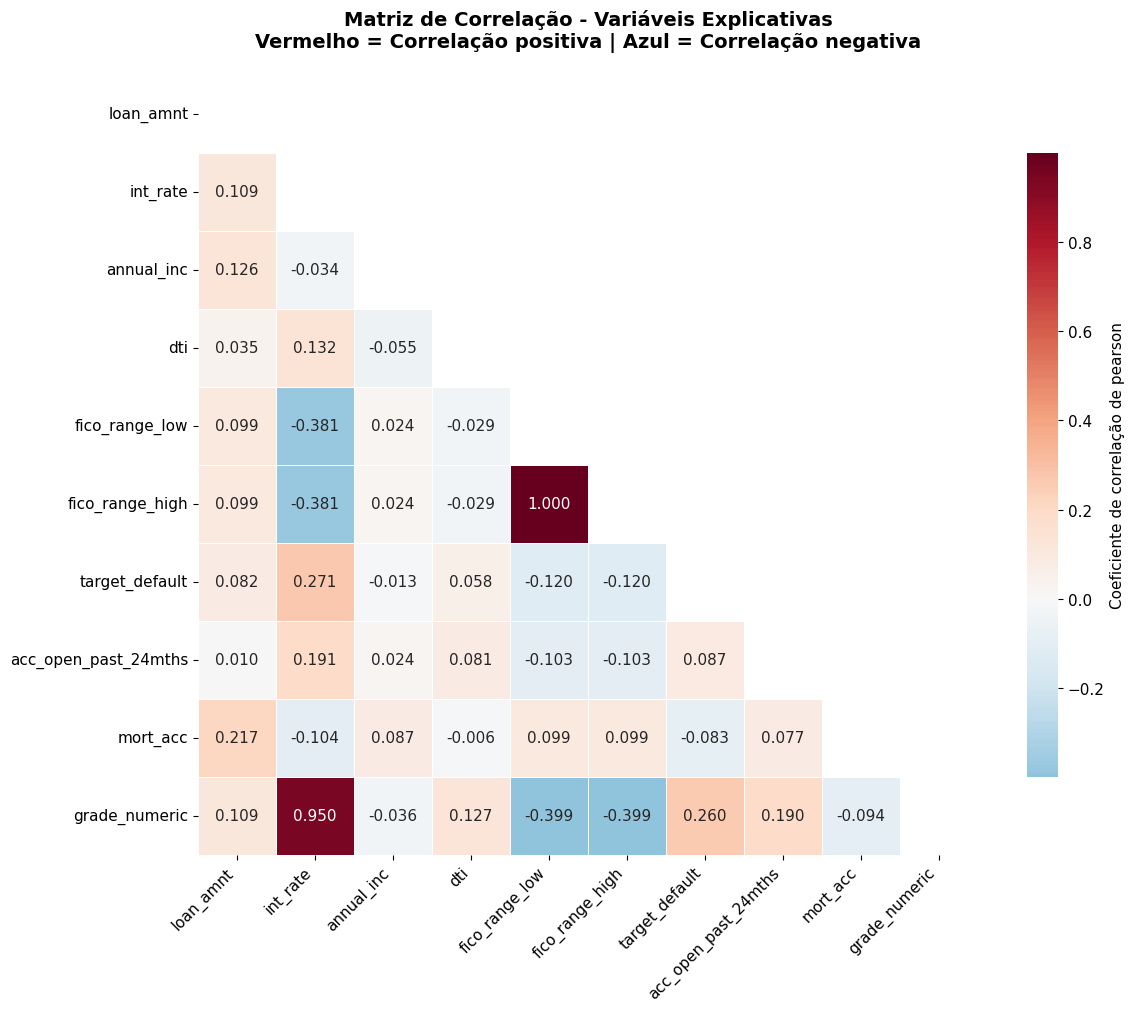

In [15]:
# ==============================================================================
# 10. ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS EXPLICATIVAS
# ==============================================================================

print("\n" + "="*60)
print("10. ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS EXPLICATIVAS")
print("="*60)

def analyze_variable_correlations(df):
    """Analisa correlações entre variáveis explicativas"""

    # Selecionar variáveis numéricas chave e variável alvo
    correlation_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti',
                       'fico_range_low', 'fico_range_high', 'target_default',
                       'acc_open_past_24mths', 'mort_acc']

    # Verificar se todas as variáveis existem no dataset
    available_vars = [var for var in correlation_vars if var in df.columns]
    print(f"Variáveis disponíveis para análise: {available_vars}")

    # Criar dataframe para correlação
    df_corr = df[available_vars].copy()

    # Adicionar grade como variável numérica ordinal
    if 'grade' in df.columns:
        grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
        df_corr['grade_numeric'] = df['grade'].map(grade_mapping)
        print("Grade convertido para escala numérica: A=0, B=1, ..., G=6")

    # Calcular matriz de correlação
    correlation_matrix = df_corr.corr()

    print("\nMATRIZ DE CORRELAÇÃO DE PEARSON:")
    print("="*50)

    # ==============================================================================
    # 10.1 VISUALIZAÇÃO: HEATMAP DE CORRELAÇÃO
    # ==============================================================================

    # Criar máscara para triângulo superior (evitar redundância)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Configurar visualização
    plt.figure(figsize=(12, 10))

    # Criar heatmap
    sns.heatmap(correlation_matrix,
                mask=mask,
                annot=True,
                fmt='.3f',
                cmap='RdBu_r',  # Vermelho = correlação positiva, Azul = negativa
                center=0,
                square=True,
                linewidths=0.5,
                cbar_kws={'label': 'Coeficiente de correlação de pearson', 'shrink': 0.8})

    plt.title('Matriz de Correlação - Variáveis Explicativas\n' +
              'Vermelho = Correlação positiva | Azul = Correlação negativa',
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.show()

    return correlation_matrix

# Executar análise de correlação
correlation_results = analyze_variable_correlations(df)

### Análise geoespacial da inadimplência por estado

O mapa de inadimplência abaixo deixa claro que o risco não se distribui de forma homogênea entre os estados; surgem manchas coerentes no Sul profundo, porções do Centro-Sul e no litoral Sudeste, enquanto o Upper Midwest, a Nova Inglaterra e parte das Montanhas Rochosas exibem taxas notavelmente menores. Para descobrir se o perfil de crédito dos tomadores explica esses contrastes, correlacionamos a taxa de default estadual com a parcela de empréstimos concedidos a pessoas com FICO abaixo de 670. A regressão simples confirma uma relação positiva, mas só modesta: a inclinação aponta acréscimo médio de cerca de um ponto de inadimplência para cada ponto percentual adicional de tomadores “subprime”, porém o coeficiente de determinação mostra que boa parte da variância não pode ser explicada pelo FICO score.

Uma possível explicação para os resíduos: observa-se que Arkansas, Mississippi e Louisiana aparecem bem acima da curva esperada porque, além de perfis de crédito fracos, sofreram choque simultâneo: o colapso do preço do petróleo entre 2014 e 2016 cortou empregos e salários, e esses estados permitem juros altíssimos em crédito emergencial, o que cria espiral de dívida. Vermont, Distrito de Columbia e Oregon, por sua vez, caem abaixo da linha de tendência; nesses lugares, tetos rigorosos para juros, renda média mais alta e menor exposição a setores voláteis protegem contra o default, mesmo com fração relevante de tomadores subprime.

Portanto, incluir `addr_state` no modelo parece ser uma boa ideia, pois ele capta efeitos agregados difíceis de medir individualmente. Contudo, o poder preditivo seria melhorado se combinássemos variáveis macroeconômicas (desemprego, renda, choques setoriais), intensidade de crédito caro e regras locais de falência.



In [16]:

# ==============================================================================
# 11 ANÁLISE GEOESPACIAL DA INADIMPLÊNCIA POR ESTADO
# ==============================================================================
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

print("\n" + "="*60)
print("11.1 ANÁLISE GEOESPACIAL DA INADIMPLÊNCIA POR ESTADO")
print("="*60)

# --- Usar uma URL direta e estável para um GeoJSON de estados dos EUA ---
url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
print(f"Carregando dados geoespaciais de: {url}")
states_gdf = gpd.read_file(url)
print("Dados geoespaciais carregados com sucesso.")

# --- PASSO DE DIAGNÓSTICO CRÍTICO ---
# Vamos imprimir o cabeçalho do GeoDataFrame para ver a estrutura exata.
print("\n--- Diagnóstico: Cabeçalho do GeoDataFrame ---")
print(states_gdf.head())
print("\nColunas disponíveis:", states_gdf.columns)
print("--------------------------------------------\n")

# Com base na inspeção do `head()`, a coluna com o nome do estado é 'name'.

# --- Mapear nome do estado para abreviação ---
us_state_to_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO",
    "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID",
    "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD",
    "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA",
    "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY", "District of Columbia": "DC", "Puerto Rico": "PR"
}

states_gdf['addr_state'] = states_gdf['name'].map(us_state_to_abbrev)

# --- Preparar os dados de inadimplência ---
state_analysis = df.groupby('addr_state')['target_default'].agg(['count', 'mean']).reset_index()
state_analysis = state_analysis.rename(columns={'count': 'n_emprestimos', 'mean': 'taxa_default'})
state_analysis['taxa_default'] *= 100

# --- Juntar os dados geoespaciais com os dados de inadimplência ---
merged_map = states_gdf.set_index('addr_state').join(state_analysis.set_index('addr_state'))

# Remover Alasca e Havaí para melhor visualização do mapa continental
merged_map = merged_map[~merged_map['name'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

# --- Criar o mapa Choropleth ---
fig, ax = plt.subplots(1, 1, figsize=(20, 12))

merged_map.plot(column='taxa_default',
                cmap='Blues',
                linewidth=0.8,
                ax=ax,
                edgecolor='0.8',
                legend=True,
                missing_kwds={
                    "color": "lightgrey",
                    "label": "Dados ausentes",
                })

# Iterar sobre cada estado no GeoDataFrame para adicionar a sigla
for idx, row in merged_map.iterrows():
    # A geometria pode ser nula para estados sem dados
    if not row.geometry.is_empty:
        # Usar representative_point() para garantir que o ponto esteja dentro do polígono
        point = row.geometry.representative_point()
        ax.text(point.x, point.y, idx,
                fontsize=8,
                fontweight='bold',
                ha='center',
                va='center',
                color='black')

ax.set_title('Taxa de inadimplência (default rate) por estado nos EUA', fontsize=20, fontweight='bold')
ax.set_axis_off()

legend = ax.get_legend()
if legend:
    legend.set_title('Taxa de Default (%)')

plt.show()

# ==============================================================================
# 11.2 ANÁLISE DE CORRELAÇÃO: PERFIL DE RISCO VS. INADIMPLÊNCIA POR ESTADO
# ==============================================================================
print("\n" + "="*60)
print("11.2 ANÁLISE DE CORRELAÇÃO: PERFIL DE RISCO VS. INADIMPLÊNCIA POR ESTADO")
print("="*60)

# Definir o limiar para "alto risco"
FICO_RISK_THRESHOLD = 670

# Calcular a proporção de tomadores de alto risco por estado
def calculate_high_risk_proportion(df, threshold):
    # Contar quantos empréstimos estão abaixo do limiar
    high_risk_counts = df[df['fico_range_low'] < threshold].groupby('addr_state').size()
    # Contar o total de empréstimos por estado
    total_counts = df.groupby('addr_state').size()
    # Calcular a proporção e converter para porcentagem
    risk_proportion = (high_risk_counts / total_counts * 100).fillna(0)
    return risk_proportion.reset_index(name='prop_alto_risco_pct')

# Preparar os dados para o plot
risk_profile_by_state = calculate_high_risk_proportion(df, FICO_RISK_THRESHOLD)
state_plot_data = pd.merge(state_analysis, risk_profile_by_state, on='addr_state')

# Criar o scatter plot
fig, ax = plt.subplots(figsize=(18, 10))

# Plotar os pontos
sns.scatterplot(x='prop_alto_risco_pct', y='taxa_default', data=state_plot_data, s=100, ax=ax, alpha=0.7, label='Estado')

# Adicionar a linha de tendência
sns.regplot(x='prop_alto_risco_pct', y='taxa_default', data=state_plot_data, scatter=False, color='red', ax=ax, line_kws={'linestyle':'--'}, label='Linha de Tendência')

# Adicionar as siglas dos estados
for i, row in state_plot_data.iterrows():
    ax.text(row['prop_alto_risco_pct'] + 0.1,  # Pequeno deslocamento
            row['taxa_default'],
            row['addr_state'],
            fontsize=9,
            fontweight='bold',
            ha='left',
            va='center')

# Configurar títulos e rótulos
ax.set_title(f'Taxa de inadimplência vs. proporção de tomadores com FICO < {FICO_RISK_THRESHOLD}', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel(f'Proporção de empréstimos com FICO < {FICO_RISK_THRESHOLD} (%)', fontsize=12)
ax.set_ylabel('Taxa de inadimplência (%)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()

plt.show()





11.1 ANÁLISE GEOESPACIAL DA INADIMPLÊNCIA POR ESTADO
Carregando dados geoespaciais de: https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json
Dados geoespaciais carregados com sucesso.

--- Diagnóstico: Cabeçalho do GeoDataFrame ---
   id        name  density                                           geometry
0  01     Alabama  94.6500  POLYGON ((-87.3593 35.00118, -85.60668 34.9847...
1  02      Alaska   1.2640  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  04     Arizona  57.0500  POLYGON ((-109.0425 37.00026, -109.04798 31.33...
3  05    Arkansas  56.4300  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  06  California 241.7000  POLYGON ((-123.23326 42.00619, -122.37885 42.0...

Colunas disponíveis: Index(['id', 'name', 'density', 'geometry'], dtype='object')
--------------------------------------------




11.2 ANÁLISE DE CORRELAÇÃO: PERFIL DE RISCO VS. INADIMPLÊNCIA POR ESTADO


### Conclusão da análise exploratória de dados

A análise exploratória de dados revelou os principais vetores de risco de inadimplência. As variáveis proprietárias de risco, como `int_rate` e `sub_grade`, foram identificadas como os preditores mais potentes. A taxa de juros (`int_rate`) exibiu o maior poder discriminatório entre adimplentes e inadimplentes (effect size de +0,38), validando a eficácia do sistema de rating da plataforma. A análise de correlação confirmou a forte multicolinearidade entre `int_rate` e `grade` (r=0,95).

O prazo do empréstimo (`term`) foi identificado como um fator de risco primário, com contratos de 60 meses apresentando uma taxa de inadimplência (34,2%) quase duas vezes maior que a de 36 meses (17,8%). A finalidade (`purpose`) também se mostrou um forte indicador, com empréstimos para "pequenos negócios" atingindo 31% de default, em contraste com "compra de carro", com menos de 16%. Métricas financeiras do tomador, como o score `FICO` e a `dti`, também se mostraram relevantes, embora com menor poder discriminatório. Fatores externos, como a data de emissão e o estado de residência, demonstraram influenciar as taxas de inadimplência, sugerindo que o contexto macroeconômico e geográfico agrega informações valiosas.

Um bom tratamento é eliminar algumas colunas redundantes como `funded_amnt` e `fico_range_high`, que são duplicatas funcionais de `loan_amnt` e `fico_range_low`. A variável `grade` pode ser preterida em favor da `sub_grade` por sua maior granularidade, apesar de irregularidades pontuais nos grades de maior risco (F e G).

Para o tratamento dos dados, é recomendada a imputação de valores faltantes pela mediana entre outras técnicas. Também é sugerida a aplicação de transformações logarítmicas para variáveis que apresentem outliers em detrimento da exclusão dos outliers. As demais variáveis numéricas podem ser padronizadas.



## Pré-processamento dos dados

Após a análise exploratória de dados anterior, torna-se trivial as etapas de pré-processamento no que se refere ao tratamento das categóricas, tratamento de outliers, imputação de valores faltantes e transformação de variáveis numéricas. A seguir, apresentamos o pré-processamento necessário para preparar os dados para algoritmos de machine learning, com foco na validação cruzada k-fold (k=10) e evitando vazamento de dados.


### Recarregamento dos dados

Recarregamos o dataset original para garantir que iniciamos o pré-processamento com dados limpos, sem modificações da análise exploratória.

In [17]:
# Recarregamento dos dados originais
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Carregamento do dataset original
df_original = pd.read_csv(github_url, compression='gzip', low_memory=False)

print(f"Dataset recarregado com sucesso!")
print(f"Dimensões: {df_original.shape}")
print(f"Período: {df_original['issue_d'].min()} a {df_original['issue_d'].max()}")

## Visualizar as primeiras linhas
df_original.head()

Dataset recarregado com sucesso!
Dimensões: (599994, 128)
Período: 2015-01-01 a 2020-09-01


Unnamed: 0        id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0       68619  77481190 10000.0000   10000.0000       10000.0000   36 months   
1       31941  88514571 28000.0000   28000.0000       28000.0000   60 months   
2       53611  78309085 35000.0000   35000.0000       35000.0000   60 months   
3       11289  95149836  2750.0000    2750.0000        2750.0000   36 months   
4       31928  94158449 10000.0000   10000.0000       10000.0000   36 months   

  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc  \
0   17.27%     357.8800     D        D2    7 years       MORTGAGE 150000.0000   
1    9.49%     587.9200     B        B2  10+ years       MORTGAGE 114500.0000   
2   16.29%     856.5400     D        D1  10+ years       MORTGAGE 122000.0000   
3    8.24%      86.4800     B        B1     1 year           RENT  55000.0000   
4   10.49%     324.9800     B        B2    6 years           RENT 115000.0000   

  verification_status     issue_d loan_status pymnt_plan             purpose  \
0     Source Verified  2016-05-01  Fully Paid          n             medical   
1            Verified  2016-08-01  Fully Paid          n  debt_consolidation   
2     Source Verified  2016-05-01  Fully Paid          n  debt_consolidation   
3        Not Verified  2016-12-01  Fully Paid          n      major_purchase   
4        Not Verified  2016-12-01  Fully Paid          n  debt_consolidation   

  zip_code addr_state     dti  delinq_2yrs earliest_cr_line  fico_range_low  \
0    328xx         FL 30.7800       1.0000         Sep-1998        660.0000   
1    220xx         VA 15.2600       0.0000         Oct-1982        705.0000   
2    300xx         GA 14.6300       0.0000         Aug-2005        710.0000   
3    294xx         SC 24.4600       1.0000         Nov-1993        700.0000   
4    750xx         TX  7.4200       0.0000         Oct-2004        670.0000   

   fico_range_high  inq_last_6mths  mths_since_last_delinq  \
0         664.0000          2.0000                  1.0000   
1         709.0000          2.0000                 49.0000   
2         714.0000          0.0000                 68.0000   
3         704.0000          1.0000                 12.0000   
4         674.0000          0.0000                 74.0000   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN   25.0000   0.0000 14349.0000      57.4%    67.0000   
1                     NaN   19.0000   0.0000 35463.0000        38%    34.0000   
2                     NaN    8.0000   0.0000 41782.0000      75.8%    14.0000   
3                     NaN   14.0000   0.0000  3448.0000      10.2%    15.0000   
4                103.0000    8.0000   1.0000  7628.0000      44.1%    20.0000   

  initial_list_status  last_pymnt_amnt next_pymnt_d  last_fico_range_high  \
0                   w         357.5300          NaN              714.0000   
1                   w       27167.4000          NaN              574.0000   
2                   w       11613.2600          NaN              714.0000   
3                   w           0.4000          NaN              689.0000   
4                   w        6302.3800          NaN              759.0000   

   last_fico_range_low  collections_12_mths_ex_med  \
0             710.0000                      0.0000   
1             570.0000                      0.0000   
2             710.0000                      0.0000   
3             685.0000                      0.0000   
4             755.0000                      0.0000   

   mths_since_last_major_derog  policy_code application_type  \
0                       1.0000       1.0000       Individual   
1                          NaN       1.0000       Individual   
2                      68.0000       1.0000       Individual   
3                          NaN       1.0000       Individual   
4                      74.0000       1.0000       Individual   

   annual_inc_joint  dti_joint verification_st

### Preparação do dataset para modelagem

Com base nas conclusões da análise exploratória, vamos preparar o dataset para a modelagem.

Nossa tarefa aqui é refinar o conjunto de features, removendo colunas que se mostraram redundantes, com alta proporção de valores ausentes, ou que serão substituídas por versões mais granulares.

In [18]:
# 1. Definir X e y limitando-se as  extended_key_columns e target_default

df = df_original[extended_key_columns + ['target_default']].copy()

# Converter todas as colunas com strings percentuais para float
for col in [c for c in df.select_dtypes('object')
            if df[c].dropna().str.endswith('%').all()]:
    df[col] = df[col].str.rstrip('%').astype(float) / 100

y = df['target_default']
X = df.drop(columns=['target_default'])

# 2. Seleção final de features com base na EDA
# Lista de colunas a serem removidas com base nas conclusões da EDA.
cols_to_drop = [
    # Redundância identificada na análise de correlação
    'funded_amnt',          # Duplicata de 'loan_amnt' na amostra
    'fico_range_high',      # Correlação perfeita com 'fico_range_low'
    'grade',                # 'sub_grade' oferece mais granularidade

    # Vamos fazer uma análise Through-the-Cycle (TTC) e não focar em datas específicas
    'issue_d',
]

# Filtrar apenas colunas que existem no dataframe para evitar erros
final_cols_to_drop = [col for col in cols_to_drop if col in X.columns]

X_final = X.drop(columns=final_cols_to_drop)

print("Dataset preparado para modelagem.")
print(f"Dimensões das features (X): {X_final.shape}")
print(f"Dimensões do target (y): {y.shape}")

# Exibir as primeiras linhas do conjunto de dados final
X_final.head()

Dataset preparado para modelagem.
Dimensões das features (X): (599994, 24)
Dimensões do target (y): (599994,)


acc_open_past_24mths addr_state  annual_inc application_type  avg_cur_bal  \
0                6.0000         FL 150000.0000       Individual   18743.0000   
1                3.0000         VA 114500.0000       Individual   22395.0000   
2                2.0000         GA 122000.0000       Individual   23611.0000   
3                1.0000         SC  55000.0000       Individual   15763.0000   
4                6.0000         TX 115000.0000       Individual    2378.0000   

   bc_open_to_buy     dti emp_length  fico_range_low  funded_amnt_inv  \
0       3995.0000 30.7800    7 years        660.0000       10000.0000   
1       6135.0000 15.2600  10+ years        705.0000       28000.0000   
2      12818.0000 14.6300  10+ years        710.0000       35000.0000   
3      30352.0000 24.4600     1 year        700.0000        2750.0000   
4       2129.0000  7.4200    6 years        670.0000       10000.0000   

  home_ownership  installment  int_rate  loan_amnt  mort_acc  \
0       MORTGAGE     357.8800    0.1727 10000.0000    4.0000   
1       MORTGAGE     587.9200    0.0949 28000.0000    3.0000   
2       MORTGAGE     856.5400    0.1629 35000.0000    2.0000   
3           RENT      86.4800    0.0824  2750.0000    0.0000   
4           RENT     324.9800    0.1049 10000.0000    1.0000   

   num_tl_op_past_12m  open_rv_24m             purpose  revol_util sub_grade  \
0              2.0000       4.0000             medical      0.5740        D2   
1              2.0000       1.0000  debt_consolidation      0.3800        B2   
2              1.0000       2.0000  debt_consolidation      0.7580        D1   
3              0.0000       1.0000      major_purchase      0.1020        B1   
4              3.0000       4.0000  debt_consolidation      0.4410        B2   

         term  tot_cur_bal  tot_hi_cred_lim verification_status  
0   36 months  449831.0000      552647.0000     Source Verified  
1   60 months  425523.0000      508656.0000            Verified  
2   60 months  188891.0000      248319.0000     Source Verified  
3   36 months  220682.0000      229908.0000        Not Verified  
4   36 months   16645.0000       34884.0000        Not Verified

### Escolha das transformações das variáveis categóricas (encoding)

Para as variáveis categóricas, serão aplicadas três estratégias principais:
- **One-hot encoding**: Para variáveis com baixa cardinalidade, que possuem categorias bem definidas e não ordenadas.
- **Ordinal encoding**: Para variáveis ordinais, como `sub_grade`, que possuem uma ordem natural de risco.
- **Target encoding**: Para variáveis categóricas com média cardinalidade, como `addr_state`, onde o número de categorias é grande demais para o one-hot encoding ser viável. O target encoding irá substituir cada categoria pelo valor médio da variável target (`target_default`) para aquela categoria, preservando a informação de risco.
- **Frequency encoding**: Para variáveis categóricas com alta cardinalidade. O frequency encoding substitui cada categoria pela frequência relativa daquela categoria no dataset, preservando a informação de risco. Porém, nenhuma variável restante se enquadra nesse caso.

In [19]:
# A lista 'extended_key_columns' foi definida na EDA.
# Vamos filtrar para usar apenas as colunas categóricas que existem no nosso dataframe final.
categorical_cols = [
    col for col in extended_key_columns
    if col in X_final.columns and X_final[col].dtype in ['object', 'category']
]

# Para as células seguintes, ainda precisamos da lista completa de colunas numéricas.
numeric_cols = X_final.select_dtypes(include=['number']).columns.tolist()

print(f"São consideradas {len(categorical_cols)} variáveis categóricas e {len(numeric_cols)} variáveis numéricas.")

# Análise da cardinalidade das variáveis categóricas
print("=== ANÁLISE DE CARDINALIDADE ===")

df_filtered = X_final[categorical_cols].copy()

cardinality_info = {}
for col in categorical_cols:
    n_unique = df_filtered[col].nunique()
    cardinality_info[col] = n_unique
    missing_pct = (df_filtered[col].isnull().sum() / len(df_filtered)) * 100

    print(f"{col}: {n_unique} categorias únicas (Missing: {missing_pct:.1f}%)")

    # Mostrar as categorias mais frequentes
    if n_unique <= 20:  # Se baixa cardinalidade, mostrar todas
        top_cats = df_filtered[col].value_counts().head(10)
        print(f"  Top categorias: {list(top_cats.index[:5])}")
    else:  # Se alta cardinalidade, mostrar apenas as top
        top_cats = df_filtered[col].value_counts().head(10)
        print(f"  Top 5: {list(top_cats.index[:5])} (...e mais {n_unique-5})")

# Estratégias de encoding baseadas na cardinalidade e importância
encoding_strategy = {}

for col, n_unique in cardinality_info.items():
    if col in ['sub_grade']:
        # Ordinal encoding para grades (A < B < C < D < E < F < G)
        encoding_strategy[col] = 'ordinal'
    elif n_unique <= 10:
        # One-hot encoding para baixa cardinalidade
        encoding_strategy[col] = 'onehot'
    elif n_unique <= 50:
        # Target encoding para cardinalidade moderada
        encoding_strategy[col] = 'target'
    else:
        # Frequency encoding para alta cardinalidade
        encoding_strategy[col] = 'frequency'

print(f"\n=== ESTRATÉGIAS DE ENCODING ===")
for col, strategy in encoding_strategy.items():
    print(f"{col}: {strategy}")

# Definir ordens específicas para encoding ordinal
ordinal_mappings = {
    'sub_grade': ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
                 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
                 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
                 'G1', 'G2', 'G3', 'G4', 'G5']
    }


São consideradas 8 variáveis categóricas e 16 variáveis numéricas.
=== ANÁLISE DE CARDINALIDADE ===
addr_state: 50 categorias únicas (Missing: 0.0%)
  Top 5: ['CA', 'TX', 'NY', 'FL', 'IL'] (...e mais 45)
application_type: 2 categorias únicas (Missing: 0.0%)
  Top categorias: ['Individual', 'Joint App']
emp_length: 11 categorias únicas (Missing: 6.9%)
  Top categorias: ['10+ years', '2 years', '< 1 year', '3 years', '1 year']
home_ownership: 5 categorias únicas (Missing: 0.0%)
  Top categorias: ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE']
purpose: 13 categorias únicas (Missing: 0.0%)
  Top categorias: ['debt_consolidation', 'credit_card', 'home_improvement', 'other', 'major_purchase']
sub_grade: 35 categorias únicas (Missing: 0.0%)
  Top 5: ['C1', 'B5', 'B4', 'C2', 'C4'] (...e mais 30)
term: 2 categorias únicas (Missing: 0.0%)
  Top categorias: [' 36 months', ' 60 months']
verification_status: 3 categorias únicas (Missing: 0.0%)
  Top categorias: ['Source Verified', 'Not Verified', 'Verif

### Transformações personalizadas

Criamos duas classes de transformação personalizadas para lidar com as variáveis. Uma é a transformação de log e a outra é a transformação de target encoding. Essas classes serão utilizadas no pré-processamento seguinte para aplicar as transformações necessárias às variáveis numéricas e categóricas, respectivamente.



In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        # Nenhuma ação de fit é necessária
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.columns is None:
            self.columns = X.columns

        # Garante que não haja valores negativos antes do log
        X_copy[self.columns] = X_copy[self.columns].clip(lower=0)

        # Aplica a transformação log1p (log(1+x))
        X_copy[self.columns] = np.log1p(X_copy[self.columns])

        return X_copy

    def get_feature_names_out(self, input_features=None):
        """Returns the feature names."""
        if input_features is None:
            return self.columns
        return input_features

class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, smoothing=10.0):
        self.smoothing = smoothing
        self.mappings = []
        self.global_mean = 0

    def fit(self, X, y):
        # Garante que y seja uma Series do pandas
        if not isinstance(y, pd.Series):
            y = pd.Series(y, index=X.index if isinstance(X, pd.DataFrame) else None)

        self.global_mean = y.mean()

        # Converte X para DataFrame se for um array NumPy
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)

        self.mappings = []
        for col in X.columns:
            # Concatena a feature atual com o target
            temp = pd.concat([X[col], y], axis=1)
            temp.columns = ['feature', 'target']

            # Calcula a média e a contagem por categoria
            agg = temp.groupby('feature')['target'].agg(['count', 'mean'])
            counts = agg['count']
            means = agg['mean']

            # Calcula o encoding com suavização
            smooth = (counts * means + self.smoothing * self.global_mean) / (counts + self.smoothing)
            self.mappings.append(smooth)

        return self

    def transform(self, X):
        # Converte X para DataFrame se for um array NumPy
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)

        X_transformed = X.copy()
        for i, col in enumerate(X.columns):
            # Aplica o mapeamento para a i-ésima coluna
            X_transformed[col] = X_transformed[col].map(self.mappings[i])
            # Preenche categorias não vistas no treino com a média global
            X_transformed[col].fillna(self.global_mean, inplace=True)

        # Retorna um array NumPy, como esperado em um pipeline
        return X_transformed.values

    def get_feature_names_out(self, input_features=None):
        """Returns the feature names."""
        # The number of output features is the same as input features
        if input_features is None:
            # This case might be tricky if X was a numpy array in fit
            # Let's assume we can get the number of features from the mappings
            return [f"target_encoded_{i}" for i in range(len(self.mappings))]
        return input_features

#### Tratamento específico para open_rv_24m e emp_length

Duas variáveis requerem tratamento especializado devido aos padrões específicos de valores faltantes. Para `open_rv_24m` (80% ausentes por não coleta antes de 01/12/2015), aplicamos imputação com 0 e criamos uma feature indicadora `pre_open_rv_collection` para capturar o período temporal. Para `emp_length` (6,93% ausentes), criamos a categoria "Unknown" e aplicamos target encoding devido à cardinalidade moderada. 

In [21]:
# Tratamento para open_rv_24m e emp_length
emp_length_missing = X_final['emp_length'].isna().sum()

# Preencher open_rv_24m com 0 
X_final['open_rv_24m'] = X_final['open_rv_24m'].fillna(0)

# Criar feature indicadora do período de coleta
df_temp = df.loc[X_final.index].copy()
df_temp['issue_d'] = pd.to_datetime(df_temp['issue_d'])
X_final['pre_open_rv_collection'] = (df_temp['issue_d'] < '2015-12-01').astype(int)

# Preencher emp_length com 'Unknown'
X_final['emp_length'] = X_final['emp_length'].fillna('Unknown')

# Atualizar configurações
if 'pre_open_rv_collection' not in numeric_cols:
    numeric_cols.append('pre_open_rv_collection')
encoding_strategy['emp_length'] = 'target'

print(f"Tratamento concluído: {emp_length_missing:,} emp_length missings + feature indicadora criada")

Tratamento concluído: 41,602 emp_length missings + feature indicadora criada


### Definição do pipeline de pré-processamento

Definimos um pipeline de pré-processamento que aplica as transformações necessárias às variáveis do dataset. O pipeline inclui as seguintes etapas:
- **Imputação de valores faltantes**: Imputação da variável `dti` pela mediana, dado que possui apenas 0,08% de valores faltantes.
- **Transformações numéricas**: Aplicação de transformações logarítmicas para
variáveis como `annual_inc` e `dti`, além de padronização das variáveis numéricas restantes.
- **Transformações categóricas**: Aplicação de one-hot encoding, ordinal encoding e target encoding conforme a estratégia definida anteriormente.
- **Normalização**: Padronização das variáveis numéricas para garantir que todas tenham a mesma escala de importância em algoritmos sensíveis a essa característica.



In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Separar as colunas por tipo de encoding
onehot_columns = [col for col, strategy in encoding_strategy.items()
                  if strategy == 'onehot' and col in df_filtered.columns]

ordinal_columns = [col for col, strategy in encoding_strategy.items()
                   if strategy == 'ordinal' and col in df_filtered.columns]

target_encode_columns = [col for col, strategy in encoding_strategy.items()
                         if strategy == 'target' and col in df_filtered.columns]

frequency_columns = [col for col, strategy in encoding_strategy.items()
                     if strategy == 'frequency' and col in df_filtered.columns]

# Segundo a EDA, as colunas abaixo seriam bem tratadas por imputação pela mediana
for_impute_columns = ['bc_open_to_buy', 'revol_util', 'dti','avg_cur_bal']

log_columns = [
    'dti',              # Assimetria moderada, beneficia-se do log
    'annual_inc',       # Forte assimetria (extrema), curtose elevada - caso mais crítico
    'loan_amnt',        # Assimetria moderada, concentrações em valores específicos
    'installment',      # Similar ao loan_amnt, assimetria moderada
    'avg_cur_bal',      # Cauda longa à direita, curtose moderada
    'tot_cur_bal',      # Cauda longa à direita, curtose moderada
    'tot_hi_cred_lim',  # Cauda longa à direita, curtose moderada
    'bc_open_to_buy'    # Cauda longa à direita, curtose moderada
]

# Colunas numéricas que não precisam de transformação log, vão sofrer somente normalização
standard_numeric = [col for col in numeric_cols if col not in log_columns]

print("=== CONFIGURAÇÃO DO PIPELINE ===")
print(f"One-hot encoding: {onehot_columns}")
print(f"Ordinal encoding: {ordinal_columns}")
print(f"Target encoding: {target_encode_columns}")
print(f"Frequency encoding: {frequency_columns}")
print(f"Imputação: {for_impute_columns}")
print(f"Transformação log: {log_columns}")

# Criar pipelines para diferentes tipos de variáveis

# Pipeline para variáveis categóricas com one-hot encoding
onehot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Pipeline para variáveis categóricas com ordinal encoding
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ordinal', OrdinalEncoder(
        categories=[ordinal_mappings.get(col, 'auto') for col in ordinal_columns],
        handle_unknown='use_encoded_value',
        unknown_value=-1
    ))
])

# Pipeline para variáveis categóricas com target encoding
target_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('target_encoder', TargetEncoder(smoothing=10.0))
])

# Pipeline para variáveis categóricas com frequency encoding
# Não implementado, não tem

# Pipeline para variáveis numéricas com log transform
log_pipeline = Pipeline([
    ('log', LogTransformer(columns=log_columns)),
    ('scaler', StandardScaler())
])

# 7. Pipeline para variáveis numéricas padrão
standard_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combinar todos os pipelines em um ColumnTransformer
transformers = []

if onehot_columns:
    transformers.append(('onehot', onehot_pipeline, onehot_columns))
if ordinal_columns:
    transformers.append(('ordinal', ordinal_pipeline, ordinal_columns))
if target_encode_columns:
    transformers.append(('target', target_pipeline, target_encode_columns))
if log_columns:
    transformers.append(('log_numeric', log_pipeline, log_columns))
if standard_numeric:
    transformers.append(('standard_numeric', standard_pipeline, standard_numeric))

# Criar o preprocessor final
preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='drop'  # Drop qualquer coluna não especificada
)

print(f"\nPipeline criado com {len(transformers)} transformadores!")

# Verificar se todas as features estão cobertas
all_used_columns = (onehot_columns + ordinal_columns + target_encode_columns +
                   frequency_columns + log_columns + standard_numeric)

missing_columns = set(categorical_cols + numeric_cols) - set(all_used_columns)
if missing_columns:
    print(f"Colunas não cobertas pelo pipeline: {missing_columns}")
else:
    print("Todas as features estão cobertas pelo pipeline!")

=== CONFIGURAÇÃO DO PIPELINE ===
One-hot encoding: ['application_type', 'home_ownership', 'term', 'verification_status']
Ordinal encoding: ['sub_grade']
Target encoding: ['addr_state', 'emp_length', 'purpose']
Frequency encoding: []
Imputação: ['bc_open_to_buy', 'revol_util', 'dti', 'avg_cur_bal']
Transformação log: ['dti', 'annual_inc', 'loan_amnt', 'installment', 'avg_cur_bal', 'tot_cur_bal', 'tot_hi_cred_lim', 'bc_open_to_buy']

Pipeline criado com 5 transformadores!
Todas as features estão cobertas pelo pipeline!


### Configuração da validação cruzada e verificação final

Nesta etapa, finalizamos a preparação dos dados e configuramos a estratégia de validação para o treinamento dos modelos. Utilizamos `StratifiedKFold` com 10 folds para garantir que a proporção de inadimplentes (`target_default`) seja a mesma em cada divisão de treino e validação. Essa abordagem é crucial para datasets desbalanceados, pois previne que um fold contenha uma proporção muito diferente de casos positivos, o que poderia enviesar a avaliação do modelo.

O código verifica explicitamente a distribuição da taxa de inadimplência (`bad rate`) em cada um dos 10 folds, confirmando a estabilidade da estratificação. As estatísticas de média e desvio padrão demonstram que a variação entre os folds é mínima.


In [23]:
# Preparar os dados finais para ML

print("=== PREPARAÇÃO FINAL DOS DADOS ===")
print(f"Features (X): {X_final.shape}")
print(f"Target (y): {y.shape}")
print(f"Distribuição do target: {y.value_counts().to_dict()}")

# Verificar tipos de dados das features
print(f"\nTipos de dados por feature:")
print(f"Categóricas: {len(categorical_cols)} features")
print(f"Numéricas: {len(numeric_cols)} features")

# Configurar validação cruzada estratificada com 10 folds
cv_strategy = StratifiedKFold(
    n_splits=10,
    shuffle=True,
    random_state=101
)

print(f"\n=== CONFIGURAÇÃO DE VALIDAÇÃO CRUZADA ===")
print(f"Estratégia: StratifiedKFold com {cv_strategy.n_splits} folds")
print(f"Shuffle: {cv_strategy.shuffle}")
print(f"Random state: {cv_strategy.random_state}")

# Verificar a distribuição do target em cada fold
fold_distributions = []
for fold_idx, (train_idx, val_idx) in enumerate(cv_strategy.split(X, y)):
    y_train_fold = y.iloc[train_idx]
    y_val_fold = y.iloc[val_idx]

    train_dist = y_train_fold.value_counts(normalize=True)
    val_dist = y_val_fold.value_counts(normalize=True)

    fold_distributions.append({
        'fold': fold_idx + 1,
        'train_size': len(train_idx),
        'val_size': len(val_idx),
        'train_bad_rate': train_dist.get(1, 0),
        'val_bad_rate': val_dist.get(1, 0)
    })

fold_df = pd.DataFrame(fold_distributions)
print(f"\nDistribuição por fold:")
print(fold_df)

print(f"\nEstatísticas da bad rate:")
print(f"Média treino: {fold_df['train_bad_rate'].mean():.4f}")
print(f"Média validação: {fold_df['val_bad_rate'].mean():.4f}")
print(f"Desvio padrão treino: {fold_df['train_bad_rate'].std():.4f}")
print(f"Desvio padrão validação: {fold_df['val_bad_rate'].std():.4f}")

# Salvar informações importantes para uso posterior
preprocessing_info = {
    'features': {
        'categorical': categorical_cols,
        'numeric': numeric_cols,
        'total': len(categorical_cols) + len(numeric_cols)
    },
    'target': {
        'column': 'target_default',
        'classes': y.unique().tolist(),
        'distribution': y.value_counts().to_dict()
    },
    'data_shape': {
        'n_samples': X_final.shape[0],
        'n_features': X_final.shape[1]
    },
    'encoding_strategy': encoding_strategy,
    'cv_config': {
        'method': 'StratifiedKFold',
        'n_splits': cv_strategy.n_splits,
        'shuffle': cv_strategy.shuffle,
        'random_state': cv_strategy.random_state
    }
}

print(f"\n=== RESUMO FINAL ===")
print(f"- Dataset preparado com {preprocessing_info['data_shape']['n_samples']:,} amostras")
print(f"- {preprocessing_info['features']['total']} features processadas")
print(f"- Target balanceado: {preprocessing_info['target']['distribution']}")


=== PREPARAÇÃO FINAL DOS DADOS ===
Features (X): (599994, 25)
Target (y): (599994,)
Distribuição do target: {0: 467554, 1: 132440}

Tipos de dados por feature:
Categóricas: 8 features
Numéricas: 17 features

=== CONFIGURAÇÃO DE VALIDAÇÃO CRUZADA ===
Estratégia: StratifiedKFold com 10 folds
Shuffle: True
Random state: 101

Distribuição por fold:
   fold  train_size  val_size  train_bad_rate  val_bad_rate
0     1      539994     60000          0.2207        0.2207
1     2      539994     60000          0.2207        0.2207
2     3      539994     60000          0.2207        0.2207
3     4      539994     60000          0.2207        0.2207
4     5      539995     59999          0.2207        0.2207
5     6      539995     59999          0.2207        0.2207
6     7      539995     59999          0.2207        0.2207
7     8      539995     59999          0.2207        0.2207
8     9      539995     59999          0.2207        0.2207
9    10      539995     59999          0.2207        

### Verificação do pré-processamento

Para inspecionar o resultado final do pipeline de pré-processamento, aplicamos o `preprocessor` a todo o conjunto de dados `X_final`. Esta etapa serve como uma verificação final, permitindo-nos visualizar a estrutura dos dados que foram efetivamente utilizados pelo modelo.

O código executa o `fit` e o `transform`, convertendo o `DataFrame` original em uma matriz numérica. O resultado é exibido em um novo `DataFrame`, utilizando `get_feature_names_out()` para obter os nomes das colunas geradas pelas transformações, como as novas colunas do one-hot encoding etc. Isso confirma que todas as etapas de imputação, transformação e encoding foram aplicadas corretamente, resultando em um conjunto de dados pronto para a modelagem.

In [24]:
print("Fitando o pré-processador nos dados...")
preprocessor.fit(X_final, y)

print("Transformando os dados...")
X_transformed = preprocessor.transform(X_final)
#feature_names = preprocessor.get_feature_names_out()
print("Transformação concluída. Número de features após transformação:", X_transformed.shape[1])

# Mostra as primeiras linhas do resultado transformado
print("Dados transformados (primeiras linhas):")
display(pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out()))

Fitando o pré-processador nos dados...
Transformando os dados...
Transformação concluída. Número de features após transformação: 29
Dados transformados (primeiras linhas):


onehot__application_type_Joint App  onehot__home_ownership_MORTGAGE  \
0                                   0.0000                           1.0000   
1                                   0.0000                           1.0000   
2                                   0.0000                           1.0000   
3                                   0.0000                           0.0000   
4                                   0.0000                           0.0000   
...                                    ...                              ...   
599989                              1.0000                           1.0000   
599990                              0.0000                           1.0000   
599991                              0.0000                           1.0000   
599992                              0.0000                           1.0000   
599993                              1.0000                           0.0000   

        onehot__home_ownership_NONE  onehot__home_ownership_OWN  \
0                            0.0000                      0.0000   
1                            0.0000                      0.0000   
2                            0.0000                      0.0000   
3                            0.0000                      0.0000   
4                            0.0000                      0.0000   
...                             ...                         ...   
599989                       0.0000                      0.0000   
599990                       0.0000                      0.0000   
599991                       0.0000                      0.0000   
599992                       0.0000                      0.0000   
599993                       0.0000                      0.0000   

        onehot__home_ownership_RENT  onehot__term_ 60 months  \
0                            0.0000                   0.0000   
1                            0.0000                   1.0000   
2                            0.0000                   1.0000   
3                            1.0000                   0.0000   
4                            1.0000                   0.0000   
...                             ...                      ...   
599989                       0.0000                   1.0000   
599990                       0.0000                   0.0000   
599991                       0.0000                   0.0000   
599992                       0.0000                   0.0000   
599993                       1.0000                   1.0000   

        onehot__verification_status_Source Verified  \
0                                            1.0000   
1                                            0.0000   
2                                            1.0000   
3                                            0.0000   
4                                            0.0000   
...                                             ...   
599989                                       0.0000   
599990                                       0.0000   
599991                                       1.0000   
599992                                       0.0000   
599993                                       0.0000   

        onehot__verification_status_Verified  ordinal__sub_grade  \
0                                     0.0000             16.0000   
1                                     1.0000              6.0000   
2                                     0.0000             15.0000   
3                                     0.0000              5.0000   
4                                     0.0000              6.0000   
...                                      ...                 ...   
599989                                0.0000              6.0000   
599990                                0.0000             16.0000   
599991                                0.0000              2.0000   
599992                                0.0000              2.0000   
599993                                1.0000             15.0000   

       

## Modelagem preditiva com LightGBM

Para a modelagem, optamos pelo LightGBM devido à sua alta performance. O processo é encapsulado em um Pipeline do Scikit-learn, que integra o pré-processamento com o classificador LGBMClassifier para evitar vazamento de dados durante a validação cruzada estratificada de 10 folds.

O desbalanceamento de classes é tratado com o parâmetro is_unbalance=True. Embora a métrica principal utilizada seja a AUC-ROC, que mede a discriminação geral, o custo assimétrico dos erros (falsos negativos são mais caros) exige uma análise complementar. Por isso, em seguida, utilizamos a curva Precision-Recall (AUC-PR) para encontrar um limiar de decisão que otimize o equilíbrio entre capturar o máximo de inadimplentes (Recall) e minimizar alarmes falsos (Precision).

A análise dos gráficos revela um desempenho moderado do modelo, com uma AUC-PR de 0,424, que é superior a um modelo aleatório (≈0,21). A curva Precision-Recall evidencia o trade-off entre capturar o máximo de inadimplentes (recall) e minimizar alarmes falsos (precisão).

O segundo gráfico mostra que o limiar de decisão ideal depende do objetivo de negócio para minimizar perdas (priorizar recall), um limiar baixo (ex: 0,6) captura mais inadimplentes, mas aumenta os falsos positivos.
Para minimizar recusas incorretas (priorizar precisão), um limiar alto (ex: 0,8) é mais assertivo, mas deixa de identificar muitos inadimplentes.
A escolha final do limiar deve ser baseada em uma análise de custo-benefício.

In [25]:
# ==============================================================================
# MODELAGEM PREDITIVA COM LIGHTGBM
# ==============================================================================
from sklearn.model_selection import cross_validate
from lightgbm import LGBMClassifier
import time

print("\n" + "="*60)
print("MODELAGEM PREDITIVA COM LIGHTGBM")
print("="*60)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=101, is_unbalance=True))
])

print("Pipeline do modelo final criado:")
print(model_pipeline)

# 2. Definir as métricas de avaliação
scoring_metrics = ['roc_auc', 'accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

print(f"\nMétricas de avaliação: {scoring_metrics}")

# 3. Executar a validação cruzada
# Usando a estratégia de CV (cv_strategy) já definida
print("\nIniciando a validação cruzada (10-fold)...")
start_time = time.time()

# O cross_validate lida com o fit/predict para cada fold
cv_results = cross_validate(
    estimator=model_pipeline,
    X=X_final,
    y=y,
    cv=cv_strategy,
    scoring=scoring_metrics,
    n_jobs=-1  # Usar todos os cores disponíveis
)

end_time = time.time()
print(f"Validação cruzada concluída em {end_time - start_time:.2f} segundos.")

# 4. Apresentar os resultados de forma clara
print("\n" + "="*60)
print("RESULTADOS DA VALIDAÇÃO CRUZADA (10-FOLD)")
print("="*60)

print(f"{'Métrica':<25} | {'Média':<15} | {'Desvio Padrão':<15}")
print("-" * 60)

for metric in scoring_metrics:
    key = f'test_{metric}'
    mean_score = cv_results[key].mean()
    std_score = cv_results[key].std()
    print(f"{metric:<25} | {mean_score:<15.4f} | {std_score:<15.4f}")

print("-" * 60)
print(f"Tempo total de execução: {end_time - start_time:.2f} segundos")



MODELAGEM PREDITIVA COM LIGHTGBM
Pipeline do modelo final criado:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['application_type',
                                                   'home_ownership', 'term',
                       

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, auc

# 1. Obter as probabilidades de previsão para cada amostra usando validação cruzada
# Isso evita o vazamento de dados e fornece uma estimativa realista do desempenho.
y_probas = cross_val_predict(
    model_pipeline,
    X_final,
    y,
    cv=cv_strategy,
    method='predict_proba',
    n_jobs=-1
)

# Probabilidades da classe positiva (inadimplentes)
y_scores = y_probas[:, 1]

# 2. Calcular precision, recall e limiares
precision, recall, thresholds = precision_recall_curve(y, y_scores)
auc_pr = auc(recall, precision)

# 3. Criar as visualizações
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico 1: Curva Precision-Recall
axes[0].plot(recall, precision, color='darkorange', lw=2, label=f'Curva PR (AUC = {auc_pr:.3f})')
axes[0].fill_between(recall, precision, alpha=0.2, color='darkorange')
axes[0].set_xlabel('Recall (sensibilidade)')
axes[0].set_ylabel('Precision (precisão)')
axes[0].set_title('Curva Precision-Recall')
axes[0].legend(loc='lower left')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Gráfico 2: Precision e Recall vs. Limiar de Decisão
axes[1].plot(thresholds, precision[:-1], 'b--', label='Precision')
axes[1].plot(thresholds, recall[:-1], 'g-', label='Recall')
axes[1].set_xlabel('Limiar de decisão (threshold)')
axes[1].set_ylabel('Score da métrica')
axes[1].set_title('Precision e recall vs. Limiar de decisão')
axes[1].legend(loc='best')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

[LightGBM] [Info] Number of positive: 119196, number of negative: 420798
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.157036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3094
[LightGBM] [Info] Number of data points in the train set: 539994, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220736 -> initscore=-1.261384
[LightGBM] [Info] Start training from score -1.261384
[LightGBM] [Info] Number of positive: 119196, number of negative: 420798
[LightGBM] [Info] Number of positive: 119196, number of negative: 420798
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.109751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3096
[LightGBM] [Info] Number of data points in the train set: 539994, number of used features: 28
[Li

## Conclusão final

A análise exploratória de dados realizada forneceu uma base sólida para a modelagem preditiva do risco de inadimplência na Lending Club. Através da identificação de variáveis-chave, como `grade`, `sub_grade`, `int_rate`, `fico_range_low` e `dti`, conseguimos entender os fatores que mais influenciam o risco de default. Foram analisadas as distribuições das variáveis numéricas e categóricas, bem como a correlação entre elas e o variável alvo `target_default`.

A análise temporal demonstrou a consistência do sistema de rating da Lending Club em ordenar o risco, embora as taxas absolutas de inadimplência variem significativamente ao longo do tempo, influenciadas por fatores externos. A análise geoespacial revelou padrões regionais significativos, indicando que o risco de inadimplência não é distribuído uniformemente entre os estados dos EUA.

O pré-processamento, baseado nas conclusões da análise exploratória de dados, incluiu a remoção de colunas redundantes, imputação de valores faltantes e transformação de variáveis numéricas e categóricas (encoding), preparando o dataset para algoritmos de machine learning.

Embora não seja o foco do trabalho, observa-se que a modelagem preditiva com LightGBM demonstrou um desempenho moderado, indicando que o modelo é capaz de discriminar entre tomadores adimplentes e inadimplentes, embora haja espaço para melhorias em ações como testar outros modelos, fazer busca de hiperparâmetros e reincluir variáveis que foram descartadas nas análises de associação realizadas na expĺoração de dados.

Abaixo, é mostrado o que se concluiu sobre as hipóteses iniciais levantadas no início do projeto:

- Capacidade de pagamento influencia inadimplência

  - **CONFIRMADA**: A análise de distribuições por grupo de pagamento mostrou que o dti (relação dívida/renda) apresenta diferença significativa entre adimplentes e inadimplentes (+12,6% na mediana, effect size de 0,120). A annual_inc também mostrou relação, embora com menor intensidade (-7,5% na mediana).

- FICO e grades internas concentram a maior parte da informação de risco

  - **CONFIRMADA**: int_rate demonstrou o maior poder discriminatório (effect size: 0,375), enquanto a progressão de risco por sub_grade mostrou aumento consistente da inadimplência de A1 (7,2%) a G5 (60%). O FICO score, mesmo com diferenças absolutas pequenas (-0,7%), apresentou effect size relevante (-0,163).

- O prazo do empréstimo é um fator de risco primário

  - **CONFIRMADA**: Empréstimos de 60 meses apresentaram taxa de inadimplência de 34,2%, quase o dobro dos de 36 meses (17,8%), validando que o maior tempo de exposição aumenta substancialmente o risco.

- Fatores geográficos e macroeconômicos impactam o risco

  - **CONFIRMADA**: A análise geoespacial revelou padrões regionais significativos, com variações de até 15 pontos percentuais entre estados. A análise temporal mostrou que, mesmo mantendo a ordenação de risco constante, as taxas absolutas de inadimplência variaram consideravelmente de acordo com o ano de emissão (ex: Grade A oscilou entre 5,5% e 17,1%).


## ANEXO A - Pipeline de anonimização e amostragem estratificada

Este anexo documenta o processo completo de preparação dos dados utilizado para criar a amostra anonimizada carregada no notebook principal.



In [27]:
# CÓDIGO DOCUMENTATIVO - Pipeline de anonimização e amostragem

'''
# 1. Download e configuração
def download_kaggle_dataset(dataset_id='ethon0426/lending-club-20072020q1'):
    """Download do dataset original do Kaggle"""
    try:
        kaggle.api.dataset_download_files(dataset_id, path='.', unzip=True)
        print(f"Dataset baixado: {dataset_id}")
        return True
    except Exception as e:
        print(f"Erro no download: {e}")
        return False

# 2. Carregamento do arquivo principal
def load_lending_club_data():
    """Carrega o dataset principal do Lending Club"""
    filename = 'Loan_status_2007-2020Q3.gzip'

    # O arquivo está em formato CSV, não gzip binário
    df = pd.read_csv(filename, low_memory=False)
    print(f"Dataset original carregado: {df.shape}")
    return df

# 3. Anonimização e filtragem
def anonymize_and_filter_data(df):
    """
    Aplica anonimização e filtros conforme LGPD e requisitos do projeto
    """
    # Filtrar período 2015-2020
    df['issue_d'] = pd.to_datetime(df['issue_d'])
    df_filtered = df[(df['issue_d'] >= '2015-01-01') &
                     (df['issue_d'] <= '2020-12-31')].copy()

    # Criar variável target binária
    paid_status = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
    default_status = ['Charged Off', 'Default', 'Late (31-120 days)',
                     'In Grace Period', 'Does not meet the credit policy. Status:Charged Off',
                     'Late (16-30 days)']

    df_filtered = df_filtered[df_filtered['loan_status'].isin(paid_status + default_status)]
    df_filtered['target_default'] = df_filtered['loan_status'].isin(default_status).astype(int)

    # Remover colunas com vazamento de informação futura
    future_leak_cols = ['last_pymnt_d', 'total_pymnt', 'recoveries',
                       'collection_recovery_fee', 'last_credit_pull_d',
                       'out_prncp', 'out_prncp_inv', 'total_pymnt_inv',
                       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                       'hardship_flag', 'settlement_status', 'settlement_date',
                       'settlement_amount', 'debt_settlement_flag']

    existing_leak_cols = [col for col in future_leak_cols if col in df_filtered.columns]
    df_filtered = df_filtered.drop(columns=existing_leak_cols)

    # Remover identificadores pessoais (LGPD)
    privacy_cols = ['member_id', 'emp_title', 'url', 'desc', 'title']
    existing_privacy_cols = [col for col in privacy_cols if col in df_filtered.columns]
    df_filtered = df_filtered.drop(columns=existing_privacy_cols)

    print(f"Dados anonimizados: {df_filtered.shape}")
    return df_filtered
'''

print("Pipeline de anonimização documentado")
print("Para executar: descomente o código e configure kaggle.json")
print("Código completo disponível em: dataset_anonymization.py")



Pipeline de anonimização documentado
Para executar: descomente o código e configure kaggle.json
Código completo disponível em: dataset_anonymization.py


In [28]:
# CÓDIGO DOCUMENTATIVO - Amostragem Estratificada

'''
def create_stratified_sample(df, target_sample_size=600000):
    """
    Cria amostra estratificada por ano e variável target
    Garante representatividade temporal e de classes
    """
    # Criar estratos combinando ano e target
    df['strata'] = df['ano'].astype(str) + '_' + df['target_default'].astype(str)

    # Calcular proporções dos estratos
    strata_props = df['strata'].value_counts(normalize=True)

    # Calcular tamanhos das amostras por estrato
    sample_sizes = (strata_props * target_sample_size).round().astype(int)

    # Ajustar para atingir exatamente o tamanho desejado
    current_size = sample_sizes.sum()
    if current_size != target_sample_size:
        diff = target_sample_size - current_size
        largest_stratum = sample_sizes.idxmax()
        sample_sizes[largest_stratum] += diff

    # Amostrar de cada estrato
    dfs_sample = []
    for strata, sample_size in sample_sizes.items():
        if sample_size > 0:
            strata_data = df[df['strata'] == strata]

            # Se o estrato tem menos dados que o necessário, pegar todos
            if len(strata_data) <= sample_size:
                sampled = strata_data
            else:
                sampled = strata_data.sample(n=sample_size, random_state=42)
            dfs_sample.append(sampled)

    # Combinar todas as amostras
    df_sample = pd.concat(dfs_sample, ignore_index=True)
    df_sample = df_sample.drop(columns=['strata'])  # Remover coluna auxiliar

    print(f"Amostra estratificada criada: {df_sample.shape}")
    print(f"Taxa de amostragem: {len(df_sample)/len(df):.1%}")

    return df_sample

def save_sample_for_github(df_sample, filename='lending_club_sample_2015_2020.csv.gz'):
    """
    Salva amostra compactada para upload no GitHub
    """
    df_sample.to_csv(filename, compression='gzip', index=False)

    # Verificar tamanho do arquivo
    file_size = os.path.getsize(filename) / (1024**2)  # MB
    print(f"Arquivo salvo: {filename}")
    print(f"Tamanho: {file_size:.1f} MB")

    if file_size < 100:
        print("Compatível com GitHub (<100MB)")
    else:
        print("Arquivo muito grande para GitHub")

    return filename, file_size
'''

print("Algoritmo de amostragem estratificada documentado")
print("Garante representatividade por ano E variável target")
print("Resultado: arquivo <100MB compatível com GitHub")

Algoritmo de amostragem estratificada documentado
Garante representatividade por ano E variável target
Resultado: arquivo <100MB compatível com GitHub


In [29]:
# CÓDIGO DOCUMENTATIVO - Validação da Representatividade

'''
def analyze_temporal_distribution(df_original, df_sample):
    """
    Analisa se a amostra mantém representatividade temporal
    """
    # Distribuição por ano
    original_years = df_original['ano'].value_counts(normalize=True).sort_index()
    sample_years = df_sample['ano'].value_counts(normalize=True).sort_index()

    print("Comparação da distribuição temporal:")
    print("Ano | Original | Amostra  | Diferença")
    print("-" * 40)

    for year in original_years.index:
        orig_pct = original_years[year] * 100
        samp_pct = sample_years.get(year, 0) * 100
        diff = abs(orig_pct - samp_pct)
        print(f"{year} | {orig_pct:6.1f}% | {samp_pct:6.1f}% | {diff:6.1f}pp")

    # Distribuição da variável target
    orig_target = df_original['target_default'].value_counts(normalize=True)
    samp_target = df_sample['target_default'].value_counts(normalize=True)

    print(f"\nDistribuição da variável target:")
    print(f"Classe | Original | Amostra  | Diferença")
    print("-" * 40)
    for cls in [0, 1]:
        orig_pct = orig_target[cls] * 100
        samp_pct = samp_target[cls] * 100
        diff = abs(orig_pct - samp_pct)
        print(f"   {cls}   | {orig_pct:6.1f}% | {samp_pct:6.1f}% | {diff:6.1f}pp")

# Pipeline completo
def process_lending_club_pipeline(dataset_id='ethon0426/lending-club-20072020q1',
                                 target_sample_size=600000):
    """
    Pipeline completo: download → anonimização → amostragem → salvamento
    """
    print("Iniciando pipeline completo...")

    # 1. Download
    if not download_kaggle_dataset(dataset_id):
        return None, None

    # 2. Carregamento
    df_original = load_lending_club_data()

    # 3. Anonimização
    df_clean = anonymize_and_filter_data(df_original)

    # 4. Amostragem estratificada
    df_sample = create_stratified_sample(df_clean, target_sample_size)

    # 5. Salvamento
    filename, file_size = save_sample_for_github(df_sample)

    # 6. Validação
    analyze_temporal_distribution(df_clean, df_sample)

    # Informações do processo
    process_info = {
        'original_shape': df_original.shape,
        'filtered_shape': df_clean.shape,
        'sample_shape': df_sample.shape,
        'file_info': {'filename': filename, 'file_size_mb': file_size}
    }

    print("Pipeline concluído com sucesso!")
    return df_sample, process_info
'''

print("Validação de representatividade documentada")
print("Pipeline completo disponível em dataset_anonymization.py")
print("Para desenvolvedores: import dataset_anonymization; process_lending_club_pipeline()")

Validação de representatividade documentada
Pipeline completo disponível em dataset_anonymization.py
Para desenvolvedores: import dataset_anonymization; process_lending_club_pipeline()
